In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\nuthi\AppData\Local\Temp\ipykernel_24924\3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## Group 1 Title: Predicting Election Results (Party Lists) for the Auckland Region
### Name and ID:
    Nana (Nuthita) Tashiro, ID: 21016134
    Cole 
    Nazgul

# Research Question: 
How can an integrated prediction model combining different techniques accurately predict the next election results of four major parties and others (ACT New Zealand, Green Party, Labour Party, National Party, Other) for every electorate within the Auckland region if the parliament were dissolved today?

# Purpose:  
The goal of this project is to develop a prediction model that accurately forecasts election outcomes by integrating various modeling techniques. We will utilize demographic data from the years 2017, 2020, 2023, and 2024, focusing on variables such as age groups, education levels, religious affiliation, ethnicities, smoking status, and the number of dependent children. Additionally, we will average polling data for the years 2017, 2020, 2023, and 2024. The election results from 2017, 2020, and 2023 will be used to train and validate the model.

# Introduction

Predicting election results has always been a complex yet crucial task for political analysts, strategists, and the general public. The accuracy of these predictions can significantly influence campaign strategies, policy decisions, and public expectations. This project aims to develop a comprehensive prediction model that can accurately forecast the election outcomes for the four major political parties in New Zealand (ACT New Zealand, Green Party, Labour Party, and National Party) and other parties across the electorates within the Auckland region. 

The focus on the Auckland region is particularly important due to its diverse demographic composition and its significant impact on the overall election results. To achieve this goal, we will integrate various modeling techniques, leveraging both historical election results and demographic data. The demographic variables considered in this study include age groups, education levels, religious affiliation, ethnicities, smoking status, and the number of dependent children. These variables provide a holistic view of the electorate's characteristics, which are crucial for making accurate predictions.

In addition to demographic data, polling data from the years 2017, 2020, 2023, and 2024 will be averaged to capture the evolving political landscape and voter preferences. The historical election results from 2017, 2020, and 2023 will serve as the training and validation datasets for our model. By combining these diverse data sources, we aim to create a robust prediction model that can provide reliable insights into future election outcomes.

This project not only seeks to enhance the accuracy of election forecasts but also aims to explore the underlying patterns and trends in voter behavior over the years. The findings from this study could offer valuable insights for political parties, policymakers, and researchers interested in the dynamics of electoral politics in New Zealand.

# Data Wrangling 

## 1.1 Past three terms of Election results in Auckland (2017, 2020, 2023)

Initially, we aimed to predict the general election results for the last three terms in the Auckland region. To start, we downloaded datasets for both electorates and lists specific to Auckland region. We read each CSV dataset using Python and combined them into six single datasets categorized by the type of election results (electorates and lists) and the year of the election. 

In [2]:
# library
import pandas as pd
import unidecode

### 2017

In [3]:
# Electorates Votes

# Function to read and preprocess each CSV file
def preprocess_electorate_E2017(file_path_E2017, skip_rows, columns, electorate, year):
    df = pd.read_csv(file_path_E2017, skiprows=skip_rows, usecols=columns)
    df.columns = ['Electorate Candidate', 'Party', 'Valid Votes']
    df['Electorate'] = electorate
    df['Election Year'] = year
    # Normalize special characters to ASCII equivalents
    df['Electorate'] = df['Electorate'].apply(unidecode.unidecode)
    df['Party'] = df['Party'].apply(unidecode.unidecode)
    df.index = range(1, len(df) + 1)
    return df

# List of electorates with their respective file paths and parameters
electorates_info_E2017 = [
    ("ElectionsData/2017/Electorate/Auckland Central.csv", 76, [0, 1, 2], 'Auckland Central', 2017),
    ("ElectionsData/2017/Electorate/Botany.csv", 70, [0, 1, 2], 'Botany', 2017),
    ("ElectionsData/2017/Electorate/East Coast Bays.csv", 71, [0, 1, 2], 'East Coast Bays', 2017),
    ("ElectionsData/2017/Electorate/Epsom.csv", 77, [0, 1, 2], 'Epsom', 2017),
    ("ElectionsData/2017/Electorate/Helensville.csv", 110, [0, 1, 2], 'Helensville', 2017),
    ("ElectionsData/2017/Electorate/Hunua.csv", 92, [0, 1, 2], 'Hunua', 2017),
    ("ElectionsData/2017/Electorate/Kelston.csv", 76, [0, 1, 2], 'Kelston', 2017),
    ("ElectionsData/2017/Electorate/Mangere.csv", 62, [0, 1, 2], 'Māngere', 2017),
    ("ElectionsData/2017/Electorate/Manukau East.csv", 75, [0, 1, 2], 'Manukau East', 2017),
    ("ElectionsData/2017/Electorate/Manurewa.csv", 69, [0, 1, 2], 'Manurewa', 2017),
    ("ElectionsData/2017/Electorate/Maungakiekie.csv", 76, [0, 1, 2], 'Maungakiekie', 2017),
    ("ElectionsData/2017/Electorate/Mt Albert.csv", 88, [0, 1, 2], 'Mt Albert', 2017),
    ("ElectionsData/2017/Electorate/Mt Roskill.csv", 79, [0, 1, 2], 'Mt Roskill', 2017),
    ("ElectionsData/2017/Electorate/New Lynn.csv", 72, [0, 1, 2], 'New Lynn', 2017),
    ("ElectionsData/2017/Electorate/North Shore.csv", 74, [0, 1, 2], 'North Shore', 2017),
    ("ElectionsData/2017/Electorate/Northcote.csv", 68, [0, 1, 2], 'Northcote', 2017),
    ("ElectionsData/2017/Electorate/Pakuranga.csv", 64, [0, 1, 2], 'Pakuranga', 2017),
    ("ElectionsData/2017/Electorate/Papakura.csv", 73, [0, 1, 2], 'Papakura', 2017),
    ("ElectionsData/2017/Electorate/Rodney.csv", 66, [0, 1, 2], 'Rodney', 2017),
    ("ElectionsData/2017/Electorate/Tamaki.csv", 78, [0, 1, 2], 'Tāmaki', 2017),
    ("ElectionsData/2017/Electorate/Te Atatu.csv", 73, [0, 1, 2], 'Te Atatū', 2017),
    ("ElectionsData/2017/Electorate/Upper Harbour.csv", 93, [0, 1, 2], 'Upper Harbour', 2017)
]

# List to store all DataFrames
data_frames_E2017 = []

# Process each electorate and append to the list
for info in electorates_info_E2017:
    file_path_E2017, skip_rows, columns, electorate, year = info
    df = preprocess_electorate_E2017(file_path_E2017, skip_rows, columns, electorate, year)
    data_frames_E2017.append(df)

# Combine all DataFrames into one
Electorate2017 = pd.concat(data_frames_E2017)

Electorate2017

Electorate Candidate                          Party  Valid Votes  \
1   EDWARDS, Frank Torrens        New Zealand First Party          578   
2      GREENFIELD, Stephen                   Conservative           52   
3                  X, Mika  The Opportunities Party (TOP)          681   
4     JONES, Leslie Wilson                  Climate First           55   
5       KAYE, Nicola Laura                 National Party        13198   
..                     ...                            ...          ...   
1                  AN, Jin                   Labour Party        10301   
2       BENNETT, Paula Lee                 National Party        19857   
3   GOODHUE, James Michael                    Green Party         2688   
4       HAYCOCK, Bruce Kim                ACT New Zealand          358   
5     JOHNSTON, Jane Ellen        New Zealand First Party         2192   

          Electorate  Election Year  
1   Auckland Central           2017  
2   Auckland Central           2017  
3   Auckland Central           2017  
4   Auckland Central           2017  
5   Auckland Central           2017  
..               ...            ...  
1      Upper Harbour           2017  
2      Upper Harbour           2017  
3      Upper Harbour           2017  
4      Upper Harbour           2017  
5      Upper Harbour           2017  

[145 rows x 5 columns]

In [4]:
# Party Votes

# Function to read and preprocess each CSV file for party list
def preprocess_electorate_P2017(file_path, skip_rows, columns, electorate, year):
    df = pd.read_csv(file_path, skiprows=skip_rows, usecols=columns)
    df.columns = ['Party', 'Party Votes Percentage']
    df['Electorate'] = electorate
    df['Election Year'] = year
    # Normalize special characters to ASCII equivalents
    df['Electorate'] = df['Electorate'].apply(unidecode.unidecode)
    df['Party'] = df['Party'].apply(unidecode.unidecode)
    df.index = range(1, len(df) + 1)
    return df

# List of electorates with their respective file paths and parameters
electorates_info_P2017 = [
    ("ElectionsData/2017/List/Auckland Central.csv", 77, [0, 2], 'Auckland Central', 2017),
    ("ElectionsData/2017/List/Botany.csv", 71, [0, 2], 'Botany', 2017),
    ("ElectionsData/2017/List/East Coast Bays.csv", 72, [0, 2], 'East Coast Bays', 2017),
    ("ElectionsData/2017/List/Epsom.csv", 78, [0, 2], 'Epsom', 2017),
    ("ElectionsData/2017/List/Helensville.csv", 111, [0, 2], 'Helensville', 2017),
    ("ElectionsData/2017/List/Hunua.csv", 93, [0, 2], 'Hunua', 2017),
    ("ElectionsData/2017/List/Kelston.csv", 77, [0, 2], 'Kelston', 2017),
    ("ElectionsData/2017/List/Mangere.csv", 63, [0, 2], 'Māngere', 2017),
    ("ElectionsData/2017/List/Manukau East.csv", 76, [0, 2], 'Manukau East', 2017),
    ("ElectionsData/2017/List/Manurewa.csv", 70, [0, 2], 'Manurewa', 2017),
    ("ElectionsData/2017/List/Maungakiekie.csv", 77, [0, 2], 'Maungakiekie', 2017),
    ("ElectionsData/2017/List/Mt Albert.csv", 89, [0, 2], 'Mt Albert', 2017),
    ("ElectionsData/2017/List/Mt Roskill.csv", 80, [0, 2], 'Mt Roskill', 2017),
    ("ElectionsData/2017/List/New Lynn.csv", 73, [0, 2], 'New Lynn', 2017),
    ("ElectionsData/2017/List/North Shore.csv", 75, [0, 2], 'North Shore', 2017),
    ("ElectionsData/2017/List/Northcote.csv", 69, [0, 2], 'Northcote', 2017),
    ("ElectionsData/2017/List/Pakuranga.csv", 65, [0, 2], 'Pakuranga', 2017),
    ("ElectionsData/2017/List/Papakura.csv", 74, [0, 2], 'Papakura', 2017),
    ("ElectionsData/2017/List/Rodney.csv", 67, [0, 2], 'Rodney', 2017),
    ("ElectionsData/2017/List/Tamaki.csv", 79, [0, 2], 'Tāmaki', 2017),
    ("ElectionsData/2017/List/Te Atatu.csv", 74, [0, 2], 'Te Atatū', 2017),
    ("ElectionsData/2017/List/Upper Harbour.csv", 94, [0, 2], 'Upper Harbour', 2017)
]

# List to store all DataFrames
data_frames_P2017 = []

# Process each electorate and append to the list
for info in electorates_info_P2017:
    file_path, skip_rows, columns, electorate, year = info
    df = preprocess_electorate_P2017(file_path, skip_rows, columns, electorate, year)
    data_frames_P2017.append(df)

# Combine all DataFrames into one
List2017 = pd.concat(data_frames_P2017)

# Display the combined DataFrame
List2017

Party  Party Votes Percentage  \
1                    ACT New Zealand                    1.06   
2   Aotearoa Legalise Cannabis Party                    0.24   
3                            Ban1080                    0.04   
4                       Conservative                    0.10   
5        Democrats for Social Credit                    0.01   
..                               ...                     ...   
12           New Zealand First Party                    5.75   
13        New Zealand People's Party                    0.07   
14                 NZ Outdoors Party                    0.03   
15     The Opportunities Party (TOP)                    1.64   
16                     United Future                    0.06   

          Electorate  Election Year  
1   Auckland Central           2017  
2   Auckland Central           2017  
3   Auckland Central           2017  
4   Auckland Central           2017  
5   Auckland Central           2017  
..               ...            ...  
12     Upper Harbour           2017  
13     Upper Harbour           2017  
14     Upper Harbour           2017  
15     Upper Harbour           2017  
16     Upper Harbour           2017  

[352 rows x 4 columns]

### 2020

In [5]:
# Electorates 
def preprocess_electorate_E2020(file_path_E2020, skip_rows, columns, electorate, year):
    df = pd.read_csv(file_path_E2020, skiprows=skip_rows, usecols=columns, encoding='utf-8')
    df.columns = ['Electorate Candidate', 'Party', 'Valid Votes']
    df['Electorate'] = electorate
    df['Election Year'] = year
    df['Electorate'] = df['Electorate'].apply(unidecode.unidecode)
    df['Party'] = df['Party'].apply(unidecode.unidecode)
    
    df.index = range(1, len(df) + 1)
    return df


electorates_info_E2020 = [
    ("ElectionsData/2020/Electorate/Auckland Central.csv", 94, [0, 1, 2], 'Auckland Central', 2020),
    ("ElectionsData/2020/Electorate/Botany.csv", 91, [0, 1, 2], 'Botany', 2020),
    ("ElectionsData/2020/Electorate/East Coast Bays.csv", 87, [0, 1, 2], 'East Coast Bays', 2020),
    ("ElectionsData/2020/Electorate/Epsom.csv", 96, [0, 1, 2], 'Epsom', 2020),
    ("ElectionsData/2020/Electorate/Kaipara ki Mahurangi.csv", 98, [0, 1, 2], 'Kaipara ki Mahurangi', 2020),
    ("ElectionsData/2020/Electorate/Kelston.csv", 93, [0, 1, 2], 'Kelston', 2020),
    ("ElectionsData/2020/Electorate/Mangere.csv", 104, [0, 1, 2], 'Māngere', 2020),
    ("ElectionsData/2020/Electorate/Manurewa.csv", 92, [0, 1, 2], 'Manurewa', 2020),
    ("ElectionsData/2020/Electorate/Maungakiekie.csv", 97, [0, 1, 2], 'Maungakiekie', 2020),
    ("ElectionsData/2020/Electorate/Mt Albert.csv", 109, [0, 1, 2], 'Mt Albert', 2020),
    ("ElectionsData/2020/Electorate/Mt Roskill.csv", 118, [0, 1, 2], 'Mt Roskill', 2020),
    ("ElectionsData/2020/Electorate/New Lynn.csv", 128, [0, 1, 2], 'New Lynn', 2020),
    ("ElectionsData/2020/Electorate/North Shore.csv", 89, [0, 1, 2], 'North Shore', 2020),
    ("ElectionsData/2020/Electorate/Northcote.csv", 90, [0, 1, 2], 'Northcote', 2020),
    ("ElectionsData/2020/Electorate/Pakuranga.csv", 78, [0, 1, 2], 'Pakuranga', 2020),
    ("ElectionsData/2020/Electorate/Panmure-Otahuhu.csv", 97, [0, 1, 2], 'Panmure-Ōtāhuhu', 2020),
    ("ElectionsData/2020/Electorate/Papakura.csv", 88, [0, 1, 2], 'Papakura', 2020),
    ("ElectionsData/2020/Electorate/Port Waikato.csv", 89, [0, 1, 2], 'Port Waikato', 2020),
    ("ElectionsData/2020/Electorate/Takanini.csv", 82, [0, 1, 2], 'Takanini', 2020),
    ("ElectionsData/2020/Electorate/Tamaki.csv", 87, [0, 1, 2], 'Tāmaki', 2020),
    ("ElectionsData/2020/Electorate/Te Atatu.csv", 95, [0, 1, 2], 'Te Atatū', 2020),
    ("ElectionsData/2020/Electorate/Upper Harbour.csv", 106, [0, 1, 2], 'Upper Harbour', 2020),
    ("ElectionsData/2020/Electorate/Whangaparaoa.csv", 71, [0, 1, 2], 'Whangaparāoa', 2020)
]


data_frames_E2020 = []


for info in electorates_info_E2020:
    file_path_E2020, skip_rows, columns, electorate, year = info
    df = preprocess_electorate_E2020(file_path_E2020, skip_rows, columns, electorate, year)
    data_frames_E2020.append(df)


Electorate2020 = pd.concat(data_frames_E2020)


Electorate2020


Electorate Candidate                          Party  Valid Votes  \
1   DELAMERE, Tuariki John Edward  The Opportunities Party (TOP)          320   
2         HOFFMAN DERVAN, Dominic                      TEA Party           50   
3          LOVE, Joshua Nathanuel                    Independent           73   
4          MARCROFT, Jennifer Lyn        New Zealand First Party          274   
5      MELLOW-SANDFORD, Emma Jane                 National Party         9775   
..                            ...                            ...          ...   
3       FERGUSON, Lorayne Frances                   Labour Party        15999   
4             FLAY, Kathryn Grace                     Advance NZ          659   
5              GRACE, Paul Russel                ACT New Zealand         1757   
6                MACKENZIE, Fiona               New Conservative         1486   
7          MITCHELL, Mark Patrick                 National Party        23822   

          Electorate  Election Year  
1   Auckland Central           2020  
2   Auckland Central           2020  
3   Auckland Central           2020  
4   Auckland Central           2020  
5   Auckland Central           2020  
..               ...            ...  
3       Whangaparaoa           2020  
4       Whangaparaoa           2020  
5       Whangaparaoa           2020  
6       Whangaparaoa           2020  
7       Whangaparaoa           2020  

[188 rows x 5 columns]

In [6]:
# List
def preprocess_electorate_P2020(file_path, skip_rows, columns, electorate, year):
    df = pd.read_csv(file_path, skiprows=skip_rows, usecols=columns)
    df.columns = ['Party', 'Party Votes Percentage']
    df['Electorate'] = electorate
    df['Election Year'] = year
    df['Electorate'] = df['Electorate'].apply(unidecode.unidecode)
    df['Party'] = df['Party'].apply(unidecode.unidecode)
    df.index = range(1, len(df) + 1)
    return df

# List of electorates with their respective file paths and parameters for 2020 (party list data)
electorates_info_P2020 = [
     ("ElectionsData/2020/List/Auckland Central.csv", 96, [0, 2], 'Auckland Central', 2020),
    ("ElectionsData/2020/List/Botany.csv", 93, [0, 2], 'Botany', 2020),
    ("ElectionsData/2020/List/East Coast Bays.csv", 89, [0, 2], 'East Coast Bays', 2020),
    ("ElectionsData/2020/List/Epsom.csv", 98, [0, 2], 'Epsom', 2020),
    ("ElectionsData/2020/List/Kaipara ki Mahurangi.csv", 100, [0, 2], 'Kaipara ki Mahurangi', 2020),
    ("ElectionsData/2020/List/Kelston.csv", 95, [0, 2], 'Kelston', 2020),
    ("ElectionsData/2020/List/Mangere.csv", 106, [0, 2], 'Māngere', 2020),
    ("ElectionsData/2020/List/Manurewa.csv", 94, [0, 2], 'Manurewa', 2020),
    ("ElectionsData/2020/List/Maungakiekie.csv", 99, [0, 2], 'Maungakiekie', 2020),
    ("ElectionsData/2020/List/Mt Albert.csv", 111, [0, 2], 'Mt Albert', 2020),
    ("ElectionsData/2020/List/Mt Roskill.csv", 120, [0, 2], 'Mt Roskill', 2020),
    ("ElectionsData/2020/List/New Lynn.csv", 130, [0, 2], 'New Lynn', 2020),
    ("ElectionsData/2020/List/North Shore.csv", 91, [0, 2], 'North Shore', 2020),
    ("ElectionsData/2020/List/Northcote.csv", 92, [0, 2], 'Northcote', 2020),
    ("ElectionsData/2020/List/Pakuranga.csv", 80, [0, 2], 'Pakuranga', 2020),
    ("ElectionsData/2020/List/Panmure-Otahuhu.csv", 99, [0, 2], 'Panmure-Ōtāhuhu', 2020),
    ("ElectionsData/2020/List/Papakura.csv", 90, [0, 2], 'Papakura', 2020),
    ("ElectionsData/2020/List/Port Waikato.csv", 91, [0, 2], 'Port Waikato', 2020),
    ("ElectionsData/2020/List/Takanini.csv", 84, [0, 2], 'Takanini', 2020),
    ("ElectionsData/2020/List/Tamaki.csv", 89, [0, 2], 'Tāmaki', 2020),
    ("ElectionsData/2020/List/Te Atatu.csv", 97, [0, 2], 'Te Atatū', 2020),
    ("ElectionsData/2020/List/Upper Harbour.csv", 108, [0, 2], 'Upper Harbour', 2020),
    ("ElectionsData/2020/List/Whangaparaoa.csv", 73, [0, 2], 'Whangaparāoa', 2020)
]

# List to store all DataFrames
data_frames_P2020 = []

# Process each electorate and append to the list
for info in electorates_info_P2020:
    file_path, skip_rows, columns, electorate, year = info
    df = preprocess_electorate_P2020(file_path, skip_rows, columns, electorate, year)
    data_frames_P2020.append(df)

# Combine all DataFrames into one
List2020 = pd.concat(data_frames_P2020)

List2020

Party  Party Votes Percentage  \
1                    ACT New Zealand                    7.52   
2                         Advance NZ                    0.55   
3   Aotearoa Legalise Cannabis Party                    0.27   
4                        Green Party                   19.14   
5                        HeartlandNZ                    0.00   
..                               ...                     ...   
13                     Social Credit                    0.02   
14     Sustainable New Zealand Party                    0.14   
15                         TEA Party                    0.09   
16     The Opportunities Party (TOP)                    1.22   
17                Vision New Zealand                    0.02   

          Electorate  Election Year  
1   Auckland Central           2020  
2   Auckland Central           2020  
3   Auckland Central           2020  
4   Auckland Central           2020  
5   Auckland Central           2020  
..               ...            ...  
13      Whangaparaoa           2020  
14      Whangaparaoa           2020  
15      Whangaparaoa           2020  
16      Whangaparaoa           2020  
17      Whangaparaoa           2020  

[391 rows x 4 columns]

### 2023

In [7]:
# Electorates

def preprocess_electorate_E2023(file_path_E2023, skip_rows, columns, electorate, year):
    df = pd.read_csv(file_path_E2023, skiprows=skip_rows, usecols=columns, encoding='utf-8')
    df.columns = ['Electorate Candidate', 'Party', 'Valid Votes']
    df['Electorate'] = electorate
    df['Election Year'] = year
    
    # Normalize special characters to ASCII equivalents in 'Electorate' and 'Party' columns
    df['Electorate'] = df['Electorate'].apply(unidecode.unidecode)
    df['Party'] = df['Party'].apply(unidecode.unidecode)
    
    df.index = range(1, len(df) + 1)
    return df

# List of electorates with their respective file paths and parameters for 2023
electorates_info_E2023 = [
    ("ElectionsData/2023/Electorate/Auckland Central.csv", 93, [0, 1, 2], 'Auckland Central', 2023),
    ("ElectionsData/2023/Electorate/Botany.csv", 88, [0, 1, 2], 'Botany', 2023),
    ("ElectionsData/2023/Electorate/East Coast Bays.csv", 75, [0, 1, 2], 'East Coast Bays', 2023),
    ("ElectionsData/2023/Electorate/Epsom.csv", 98, [0, 1, 2], 'Epsom', 2023),
    ("ElectionsData/2023/Electorate/Kaipara ki Mahurangi.csv", 115, [0, 1, 2], 'Kaipara ki Mahurangi', 2023),
    ("ElectionsData/2023/Electorate/Kelston.csv", 94, [0, 1, 2], 'Kelston', 2023),
    ("ElectionsData/2023/Electorate/Mangere.csv", 87, [0, 1, 2], 'Māngere', 2023),
    ("ElectionsData/2023/Electorate/Manurewa.csv", 98, [0, 1, 2], 'Manurewa', 2023),
    ("ElectionsData/2023/Electorate/Maungakiekie.csv", 87, [0, 1, 2], 'Maungakiekie', 2023),
    ("ElectionsData/2023/Electorate/Mt Albert.csv", 88, [0, 1, 2], 'Mt Albert', 2023),
    ("ElectionsData/2023/Electorate/Mt Roskill.csv", 98, [0, 1, 2], 'Mt Roskill', 2023),
    ("ElectionsData/2023/Electorate/New Lynn.csv", 125, [0, 1, 2], 'New Lynn', 2023),
    ("ElectionsData/2023/Electorate/North Shore.csv", 89, [0, 1, 2], 'North Shore', 2023),
    ("ElectionsData/2023/Electorate/Northcote.csv", 82, [0, 1, 2], 'Northcote', 2023),
    ("ElectionsData/2023/Electorate/Pakuranga.csv", 79, [0, 1, 2], 'Pakuranga', 2023),
    ("ElectionsData/2023/Electorate/Panmure-Otahuhu.csv", 102, [0, 1, 2], 'Panmure-Ōtāhuhu', 2023),
    ("ElectionsData/2023/Electorate/Papakura.csv", 92, [0, 1, 2], 'Papakura', 2023),
    ("ElectionsData/2023/Electorate/Port Waikato.csv", 62, [0, 1, 2], 'Port Waikato', 2023),
    ("ElectionsData/2023/Electorate/Takanini.csv", 107, [0, 1, 2], 'Takanini', 2023),
    ("ElectionsData/2023/Electorate/Tamaki.csv", 88, [0, 1, 2], 'Tāmaki', 2023),
    ("ElectionsData/2023/Electorate/Te Atatu.csv", 95, [0, 1, 2], 'Te Atatū', 2023),
    ("ElectionsData/2023/Electorate/Upper Harbour.csv", 78, [0, 1, 2], 'Upper Harbour', 2023),
    ("ElectionsData/2023/Electorate/Whangaparaoa.csv", 69, [0, 1, 2], 'Whangaparāoa', 2023)
  
]

data_frames_E2023 = []

for info in electorates_info_E2023:
    file_path_E2023, skip_rows, columns, electorate, year = info
    df = preprocess_electorate_E2023(file_path_E2023, skip_rows, columns, electorate, year)
    data_frames_E2023.append(df)

Electorate2023 = pd.concat(data_frames_E2023)

Electorate2023


Electorate Candidate                             Party  \
1          COKER, Christopher Hamish  Aotearoa Legalise Cannabis Party   
2               DAVIE, Paul Clifford                  Rock the Vote NZ   
3                    KANE, Madeleine             Animal Justice Party    
4                     LIU, Andi Shen                       Independent   
5                 MURALIDHAR, Mahesh                    National Party   
..                               ...                               ...   
2                    LAYBOURN, Craig                       DemocracyNZ   
3                     MITCHELL, Mark                    National Party   
4   MULLER PALLARÈS, Estefania Ailsa                      Labour Party   
5            NEWMAN, Lorraine Yvonne                       Green Party   
6                   WILSON, Jeanette                 New Zealand Loyal   

    Valid Votes        Electorate  Election Year  
1           365  Auckland Central           2023  
2            91  Auckland Central           2023  
3           135  Auckland Central           2023  
4           110  Auckland Central           2023  
5         12728  Auckland Central           2023  
..          ...               ...            ...  
2           652      Whangaparaoa           2023  
3         30742      Whangaparaoa           2023  
4          7366      Whangaparaoa           2023  
5          3487      Whangaparaoa           2023  
6          1489      Whangaparaoa           2023  

[145 rows x 5 columns]

In [8]:
# Party List
def preprocess_electorate_P2023(file_path, skip_rows, columns, electorate, year):
    df = pd.read_csv(file_path, skiprows=skip_rows, usecols=columns)
    df.columns = ['Party', 'Party Votes Percentage']
    df['Electorate'] = electorate
    df['Election Year'] = year
   
    df['Electorate'] = df['Electorate'].apply(unidecode.unidecode)
    df['Party'] = df['Party'].apply(unidecode.unidecode)
    df.index = range(1, len(df) + 1)
    return df

# List of electorates with their respective file paths and parameters for 2023 (party list data)
electorates_info_P2023 = [
     ("ElectionsData/2023/List/Auckland Central.csv", 95, [0, 2], 'Auckland Central', 2023),
    ("ElectionsData/2023/List/Botany.csv", 90, [0, 2], 'Botany', 2023),
    ("ElectionsData/2023/List/East Coast Bays.csv", 77, [0, 2], 'East Coast Bays', 2023),
    ("ElectionsData/2023/List/Epsom.csv", 100, [0, 2], 'Epsom', 2023),
    ("ElectionsData/2023/List/Kaipara ki Mahurangi.csv", 117, [0, 2], 'Kaipara ki Mahurangi', 2023),
    ("ElectionsData/2023/List/Kelston.csv", 96, [0, 2], 'Kelston', 2023),
    ("ElectionsData/2023/List/Mangere.csv", 89, [0, 2], 'Māngere', 2023),
    ("ElectionsData/2023/List/Manurewa.csv", 101, [0, 2], 'Manurewa', 2023),
    ("ElectionsData/2023/List/Maungakiekie.csv", 89, [0, 2], 'Maungakiekie', 2023),
    ("ElectionsData/2023/List/Mt Albert.csv", 90, [0, 2], 'Mt Albert', 2023),
    ("ElectionsData/2023/List/Mt Roskill.csv", 100, [0, 2], 'Mt Roskill', 2023),
    ("ElectionsData/2023/List/New Lynn.csv", 127, [0, 2], 'New Lynn', 2023),
    ("ElectionsData/2023/List/North Shore.csv", 91, [0, 2], 'North Shore', 2023),
    ("ElectionsData/2023/List/Northcote.csv", 84, [0, 2], 'Northcote', 2023),
    ("ElectionsData/2023/List/Pakuranga.csv", 82, [0, 2], 'Pakuranga', 2023),
    ("ElectionsData/2023/List/Panmure-Otahuhu.csv", 104, [0, 2], 'Panmure-Ōtāhuhu', 2023),
    ("ElectionsData/2023/List/Papakura.csv", 94, [0, 2], 'Papakura', 2023),
    ("ElectionsData/2023/List/Port Waikato.csv", 93, [0, 2], 'Port Waikato', 2023),
    ("ElectionsData/2023/List/Takanini.csv", 109, [0, 2], 'Takanini', 2023),
    ("ElectionsData/2023/List/Tamaki.csv", 90, [0, 2], 'Tāmaki', 2023),
    ("ElectionsData/2023/List/Te Atatu.csv", 97, [0, 2], 'Te Atatū', 2023),
    ("ElectionsData/2023/List/Upper Harbour.csv", 80, [0, 2], 'Upper Harbour', 2023),
    ("ElectionsData/2023/List/Whangaparaoa.csv", 71, [0, 2], 'Whangaparāoa', 2023)
]


data_frames_P2023 = []


for info in electorates_info_P2023:
    file_path, skip_rows, columns, electorate, year = info
    df = preprocess_electorate_P2023(file_path, skip_rows, columns, electorate, year)
    data_frames_P2023.append(df)


List2023 = pd.concat(data_frames_P2023)
List2023

Party  Party Votes Percentage  \
1                    ACT New Zealand                    9.33   
2              Animal Justice Party                     0.14   
3   Aotearoa Legalise Cannabis Party                    0.40   
4                        DemocracyNZ                    0.09   
5                        Freedoms NZ                    0.14   
..                               ...                     ...   
13                 New Zealand Loyal                    1.34   
14                           NewZeal                    0.98   
15                     Te Pati Maori                    0.47   
16     The Opportunities Party (TOP)                    1.63   
17              Women's Rights Party                    0.08   

          Electorate  Election Year  
1   Auckland Central           2023  
2   Auckland Central           2023  
3   Auckland Central           2023  
4   Auckland Central           2023  
5   Auckland Central           2023  
..               ...            ...  
13      Whangaparaoa           2023  
14      Whangaparaoa           2023  
15      Whangaparaoa           2023  
16      Whangaparaoa           2023  
17      Whangaparaoa           2023  

[391 rows x 4 columns]

We are in the process of combining the data, incorporating additional data that others have provided, particularly polling data based on party popularity rather than electorates. Therefore, during the data preparation process, we will focus on the general election results of party list (2017, 2020, 2023).

Since the polling data primarily shows results for the major parties (National Party, Labour Party, Green Party, ACT New Zealand, and New Zealand First Party), we will categorize the results for the smaller parties under "Other." Consequently, we will process the data for each electorate by selecting these major parties (National Party, Labour Party, Green Party, ACT New Zealand, New Zealand First Party) and combining the percentage results of the smaller parties into a single "Other" category.

First, we export the combined DataFrame that we are going to focus to CSV

In [9]:
List2017.to_csv('List2017.csv', index=False, encoding='utf-8')
List2020.to_csv('List2020.csv', index=False, encoding='utf-8')
List2023.to_csv('List2023.csv', index=False, encoding='utf-8')

In [10]:
# 2017

# Define the major parties
major_parties = ['National Party', 'Labour Party', 'Green Party', 'ACT New Zealand', 'New Zealand First Party']

# Read the CSV file
df2017 = pd.read_csv('List2017.csv')

# Rename columns for clarity
df2017.columns = ['Party', 'Party Votes Percentage', 'Electorate', 'Election Year']

# Filter the DataFrame to separate major parties and other parties
major_df2017 = df2017[df2017['Party'].isin(major_parties)]
other_df2017 = df2017[~df2017['Party'].isin(major_parties)]

# Calculate the total percentage for "Other" category within each electorate
other_df2017_grouped = other_df2017.groupby(['Electorate', 'Election Year']).agg({
    'Party Votes Percentage': 'sum'
}).reset_index()

# Rename columns for the "Others" category
other_df2017_grouped['Party'] = 'Others'
other_df2017_grouped = other_df2017_grouped[['Party', 'Party Votes Percentage', 'Electorate', 'Election Year']]

# Combine the major parties and "Others" category
combined_df2017 = pd.concat([major_df2017, other_df2017_grouped])

# Pivot the DataFrame
pivot_df2017 = combined_df2017.pivot_table(
    index=['Election Year', 'Electorate'],
    columns='Party',
    values='Party Votes Percentage',
    fill_value=0
).reset_index()

# Rename the columns to include "Vote"
pivot_df2017.columns = [f"{col} Vote" if col not in ['Election Year', 'Electorate'] else col for col in pivot_df2017.columns]

pivot_df2017['Electorate'] = pivot_df2017['Electorate'].str.strip().str.lower()
pivot_df2017 = pivot_df2017.sort_values(by='Electorate')
pivot_df2017.index = range(1, len(pivot_df2017) + 1)

# Print the first few rows of the pivoted DataFrame
pivot_df2017.head(23)


Election Year        Electorate  ACT New Zealand Vote  Green Party Vote  \
1            2017  auckland central                  1.06             13.90   
2            2017            botany                  0.60              2.39   
3            2017   east coast bays                  0.99              4.74   
4            2017             epsom                  1.78              8.36   
5            2017       helensville                  0.81              7.57   
6            2017             hunua                  0.72              2.99   
7            2017           kelston                  0.35              6.72   
8            2017           mangere                  0.12              2.71   
9            2017      manukau east                  0.26              2.23   
10           2017          manurewa                  0.27              2.48   
11           2017      maungakiekie                  0.64              5.89   
12           2017         mt albert                  0.59             14.65   
13           2017        mt roskill                  0.58              6.22   
14           2017          new lynn                  0.43              6.19   
15           2017       north shore                  0.93              6.63   
16           2017         northcote                  0.71              6.76   
17           2017         pakuranga                  0.76              3.74   
18           2017          papakura                  0.57              2.83   
19           2017            rodney                  0.86              4.60   
20           2017            tamaki                  1.37              5.65   
21           2017          te atatu                  0.49              4.90   
22           2017     upper harbour                  0.68              4.08   

    Labour Party Vote  National Party Vote  New Zealand First Party Vote  \
1               37.79                39.23                          3.88   
2               29.27                61.02                          4.59   
3               23.23                62.88                          5.39   
4               24.54                58.63                          3.15   
5               25.50                55.92                          7.12   
6               22.27                62.95                          8.57   
7               50.37                32.95                          6.58   
8               71.04                17.34                          5.16   
9               65.68                22.95                          5.74   
10              58.85                28.76                          6.63   
11              43.61                40.96                          5.11   
12              43.36                33.96                          3.44   
13              42.69                43.01                          4.43   
14              42.68                41.79                          6.10   
15              26.08                57.83                          5.27   
16              34.23                48.77                          6.02   
17              24.78                61.86                          6.62   
18              33.53                51.27                          8.79   
19              23.35                59.65                          8.73   
20              24.46                61.66                          3.91   
21              43.98                41.43                          6.44   
22              32.41                54.20                          5.75   

    Others Vote  
1          4.14  
2          2.14  
3          2.76  
4          3.55  
5          3.08  
6          2.50  
7          3.02  
8          3.63  
9          3.15  
10         3.01  
11         3.79  
12         4.00  
13         3.07  
14         2.81  
15         3.28  
16         3.52  
17         2.26  
18         3.00  
19         2.82  
20         2.97  
21         2.76  
22         2.90

In [11]:
# 2020
# Define the major parties
major_parties = ['National Party', 'Labour Party', 'Green Party', 'ACT New Zealand', 'New Zealand First Party']

# Read the CSV file
df2020 = pd.read_csv('List2020.csv')

# Rename columns for clarity
df2020.columns = ['Party', 'Party Votes Percentage', 'Electorate', 'Election Year']

# Filter the DataFrame to separate major parties and other parties
major_df2020 = df2020[df2020['Party'].isin(major_parties)]
other_df2020 = df2020[~df2020['Party'].isin(major_parties)]

# Calculate the total percentage for "Other" category within each electorate
other_df2020_grouped = other_df2020.groupby(['Electorate', 'Election Year']).agg({
    'Party Votes Percentage': 'sum'
}).reset_index()

# Rename columns for the "Others" category
other_df2020_grouped['Party'] = 'Others'
other_df2020_grouped = other_df2020_grouped[['Party', 'Party Votes Percentage', 'Electorate', 'Election Year']]

# Combine the major parties and "Others" category
combined_df2020 = pd.concat([major_df2020, other_df2020_grouped])

# Pivot the DataFrame
pivot_df2020 = combined_df2020.pivot_table(
    index=['Election Year', 'Electorate'],
    columns='Party',
    values='Party Votes Percentage',
    fill_value=0
).reset_index()


pivot_df2020.columns = [f"{col} Vote" if col not in ['Election Year', 'Electorate'] else col for col in pivot_df2020.columns]

pivot_df2020['Electorate'] = pivot_df2020['Electorate'].str.strip().str.lower()
pivot_df2020 = pivot_df2020.sort_values(by='Electorate')
pivot_df2020.index = range(1, len(pivot_df2020) + 1)

# Print the first few rows of the pivoted DataFrame
pivot_df2020.head(24)

Election Year            Electorate  ACT New Zealand Vote  \
1            2020      auckland central                  7.52   
2            2020                botany                  6.81   
3            2020       east coast bays                  8.81   
4            2020                 epsom                 10.41   
5            2020  kaipara ki mahurangi                 11.27   
6            2020               kelston                  4.37   
7            2020               mangere                  1.55   
8            2020              manurewa                  1.73   
9            2020          maungakiekie                  7.14   
10           2020             mt albert                  6.00   
11           2020            mt roskill                  4.99   
12           2020              new lynn                  6.31   
13           2020           north shore                  9.86   
14           2020             northcote                  7.32   
15           2020             pakuranga                  8.57   
16           2020       panmure-otahuhu                  2.39   
17           2020              papakura                  8.81   
18           2020          port waikato                 10.71   
19           2020              takanini                  4.64   
20           2020                tamaki                 11.73   
21           2020              te atatu                  5.13   
22           2020         upper harbour                  7.59   
23           2020          whangaparaoa                 10.61   

    Green Party Vote  Labour Party Vote  National Party Vote  \
1              19.14              46.22                21.19   
2               3.29              47.59                37.14   
3               6.16              40.25                38.38   
4              10.99              36.05                37.46   
5               6.31              40.31                33.97   
6               8.29              62.50                17.33   
7               3.99              77.37                 9.11   
8               3.03              73.91                13.03   
9               9.14              50.75                25.97   
10             20.06              48.90                18.75   
11              8.02              56.17                24.44   
12             11.45              53.33                21.88   
13              8.34              41.35                34.05   
14              8.69              49.56                27.67   
15              4.64              42.05                38.53   
16              4.12              73.66                12.75   
17              4.04              42.74                37.11   
18              3.35              40.38                36.40   
19              3.31              55.00                30.08   
20              7.68              38.61                37.06   
21              6.51              58.05                22.72   
22              5.33              48.31                31.39   
23              4.89              40.04                36.70   

    New Zealand First Party Vote  Others Vote  
1                           1.72         4.22  
2                           1.44         3.73  
3                           1.72         4.69  
4                           1.46         3.64  
5                           2.58         5.57  
6                           2.59         4.92  
7                           2.76         5.25  
8                           2.87         5.42  
9                           2.10         4.91  
10                          1.83         4.46  
11                          1.92         4.47  
12                          2.33         4.70  
13                          1.90         4.51  
14                          1.93         4.81  
15                          2.16         4.06  
16                          2.48         4.60  
17                          2.78         4.52  
18                          2.94         6

In [12]:
# 2023

# Define the major parties
major_parties = ['National Party', 'Labour Party', 'Green Party', 'ACT New Zealand', 'New Zealand First Party']

# Read the CSV file
df2023 = pd.read_csv('List2023.csv')

# Rename columns for clarity
df2023.columns = ['Party', 'Party Votes Percentage', 'Electorate', 'Election Year']

# Filter the DataFrame to separate major parties and other parties
major_df2023 = df2023[df2023['Party'].isin(major_parties)]
other_df2023 = df2023[~df2023['Party'].isin(major_parties)]

# Calculate the total percentage for "Other" category within each electorate
other_df2023_grouped = other_df2023.groupby(['Electorate', 'Election Year']).agg({
    'Party Votes Percentage': 'sum'
}).reset_index()

# Rename columns for the "Others" category
other_df2023_grouped['Party'] = 'Others'
other_df2023_grouped = other_df2023_grouped[['Party', 'Party Votes Percentage', 'Electorate', 'Election Year']]

# Combine the major parties and "Others" category
combined_df2023 = pd.concat([major_df2023, other_df2023_grouped])

# Pivot the DataFrame
pivot_df2023 = combined_df2023.pivot_table(
    index=['Election Year', 'Electorate'],
    columns='Party',
    values='Party Votes Percentage',
    fill_value=0
).reset_index()


pivot_df2023.columns = [f"{col} Vote" if col not in ['Election Year', 'Electorate'] else col for col in pivot_df2023.columns]

pivot_df2023['Electorate'] = pivot_df2023['Electorate'].str.strip().str.lower()
pivot_df2023 = pivot_df2023.sort_values(by='Electorate')
pivot_df2023.index = range(1, len(pivot_df2023) + 1)

# Print the first few rows of the pivoted DataFrame
pivot_df2023.head(23)

Election Year            Electorate  ACT New Zealand Vote  \
1            2023      auckland central                  9.33   
2            2023                botany                  7.40   
3            2023       east coast bays                  9.69   
4            2023                 epsom                 12.44   
5            2023  kaipara ki mahurangi                 12.11   
6            2023               kelston                  5.95   
7            2023               mangere                  2.12   
8            2023              manurewa                  2.69   
9            2023          maungakiekie                  7.98   
10           2023             mt albert                  6.76   
11           2023            mt roskill                  6.11   
12           2023              new lynn                  7.77   
13           2023           north shore                 10.98   
14           2023             northcote                  8.70   
15           2023             pakuranga                  9.89   
16           2023       panmure-otahuhu                  3.62   
17           2023              papakura                 10.05   
18           2023          port waikato                 12.05   
19           2023              takanini                  5.54   
20           2023                tamaki                 12.41   
21           2023              te atatu                  6.50   
22           2023         upper harbour                  8.46   
23           2023          whangaparaoa                 11.93   

    Green Party Vote  Labour Party Vote  National Party Vote  \
1              24.03              22.69                33.22   
2               5.87              20.46                59.04   
3               8.89              14.68                57.80   
4              13.59              14.67                51.69   
5               9.60              17.02                47.78   
6              14.09              37.28                31.24   
7               7.85              61.40                19.25   
8               5.93              52.17                29.41   
9              13.83              27.31                41.61   
10             25.28              26.08                32.05   
11             12.12              30.05                43.40   
12             16.74              26.90                37.31   
13             11.73              17.70                50.92   
14             14.27              23.19                43.67   
15              7.20              16.65                58.34   
16              8.55              52.70                26.55   
17              6.39              20.96                51.95   
18              5.86              18.67                50.18   
19              5.73              28.13                52.98   
20             10.99              16.82                52.58   
21             11.31              33.56                37.82   
22              9.40              22.62                50.24   
23              7.60              15.27                53.21   

    New Zealand First Party Vote  Others Vote  
1                           3.82         6.90  
2                           3.02         4.21  
3                           3.93         5.01  
4                           2.61         4.98  
5                           6.67         6.82  
6                           4.73         6.71  
7                           3.31         6.09  
8                           3.46         6.33  
9                           3.84         5.44  
10                          3.07         6.75  
11                          3.55         4.77  
12                          4.93         6.36  
13                          3.88         4.79  
14                          4.22         5.96  
15                          3.80         4.11  
16                          3.29         5.28  
17                          5.27         5.38  
18                          7.42         5

Combined 3 years datasets:

In [13]:
combined_list = pd.concat([pivot_df2017, pivot_df2020, pivot_df2023]).reset_index(drop=True)
combined_list.index = range(1, len(combined_list) + 1)
combined_list
combined_list.to_csv('combined_result_list.csv', index=False, encoding='utf-8')

## 1.2 Demographic information of Auckland region from 2017-2024

In [14]:
import pandas as pd
folderPath = "Unprocessed Excel/"

In [15]:
df = pd.read_excel(folderPath+"Religious affiliation by age and region over time.xls.xlsx",skiprows=2,header=[0,1,2,3,4], skipfooter=3, engine=None, na_values = ['..'])
#df.columns.names = ['Religious Affiliation','Birthplace','Age group','Year','Area']
df = df.droplevel([2,4], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Religious affiliation','Age group','Year'), inplace=True) 
df.index.names = ['Area']
df1 = df.copy()
display(df)

Total people - with at least one religious affiliation  \
                                                               15-29 years   
                                                                      2006   
Area                                                                         
Okahukura Peninsula                                               72.0       
Cape Rodney                                                      108.0       
Wellsford                                                        150.0       
South Head                                                        93.0       
Kaipara Hills                                                     84.0       
...                                                                ...       
Pokeno                                                            27.0       
Pukekawa                                                          63.0       
Rangiriri                                                         48.0       
Te Kauwhata                                                       63.0       
Waerenga                                                          60.0       

                                                                               \
                                  30-64 years               65 years and over   
                      2013   2018        2006   2013   2018              2006   
Area                                                                            
Okahukura Peninsula   63.0   63.0       351.0  282.0  261.0              99.0   
Cape Rodney          120.0  117.0       666.0  546.0  543.0             228.0   
Wellsford            117.0  162.0       423.0  345.0  339.0             204.0   
South Head            75.0   99.0       450.0  399.0  420.0             126.0   
Kaipara Hills         75.0   75.0       318.0  324.0  345.0              66.0   
...                    ...    ...         ...    ...    ...               ...   
Pokeno                24.0  225.0       129.0  117.0  630.0              24.0   
Pukekawa              48.0   54.0       333.0  264.0  231.0              75.0   
Rangiriri            108.0   99.0       288.0  342.0  402.0              81.0   
Te Kauwhata           69.0   63.0       213.0  198.0  240.0             186.0   
Waerenga              42.0   42.0       243.0  210.0  186.0              63.0   

                                  No religion                            \
                                  15-29 years               30-64 years   
                      2013   2018        2006   2013   2018        2006   
Area                                                                      
Okahukura Peninsula  132.0  117.0       114.0  120.0  153.0       234.0   
Cape Rodney          300.0  321.0       210.0  258.0  354.0       576.0   
Wellsford            237.0  195.0       126.0  129.0  204.0       183.0   
South Head           171.0  201.0       123.0  156.0  261.0       366.0   
Kaipara Hills         99.0  114.0        87.0  120.0  195.0       300.0   
...                    ...    ...         ...    ...    ...         ...   
Pokeno                30.0  129.0        45.0   45.0  210.0       102.0   
Pukekawa              99.0   81.0        84.0  117.0  171.0       243.0   
Rangiriri            138.0  153.0        60.0  156.0  243.0       159.0   
Te Kauwhata          225.0  252.0        63.0   81.0  159.0       111.0   
Waerenga              78.0   78.0        54.0   75.0   99.0       123.0   

                                                                   
                                  65 years and over                
                      2013   2018              2006   2013   2018  
Area                                                               
Okahukura Peninsula  291.0  408.0              18.0   36.0   75.0  
Cape Rodney          744.0  987.0              48.0  153.0  270.0  
Wellsford            267.0  378.0              27.0   57.0   96.0  
South Head           504.0  765

In [16]:
df = pd.read_excel(folderPath+"auckland weekly earnings by race age and gender over time.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3,4], skipfooter=3, engine=None)
df = df.droplevel([0,4], axis=1)
df.columns.names = ['Sex','Age','Ethnicity']
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Sex','Age Group','Ethnic Group'), inplace=True) 
df.index.names = ['Year']
df2 = df.copy()

In [17]:
df = pd.read_excel(folderPath+"crime over time auckland east.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3,4], skipfooter=0, engine=None)
df = df.droplevel([0,1,3], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Year','Offence'), inplace=True) 
df.index.names = ['Offence']
df = df.droplevel([1], axis=1)
df.columns.names = ['Year']
df3 = df.copy()


In [18]:
df = pd.read_excel(folderPath+"crime over time auckland west.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3,4], skipfooter=0, engine=None)
df = df.droplevel([0,1,3], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Year','Offence'), inplace=True) 
df.index.names = ['Offence']
df = df.droplevel([1], axis=1)
df.columns.names = ['Year']
df4 = df.copy()

In [19]:
df = pd.read_excel(folderPath+"crime over time auckland central.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3,4], skipfooter=0, engine=None)
df = df.droplevel([0,1,3], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Year','Offence'), inplace=True) 
df.index.names = ['Offence']
df = df.droplevel([1], axis=1)
df.columns.names = ['Year']
df5 = df.copy()

In [20]:
df = pd.read_excel(folderPath+"Night Population by age and region over time.xls.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3], skipfooter=3, engine=None)
df = df.droplevel([1,2], axis=1)
df.columns.names = ['Age Group','Year']
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Age group','Year'), inplace=True) 
df.index.names = ['Area']
df6 = df.copy()
display(df)

Age Group                    15-29 years               30-64 years          \
Year                                2006   2013   2018        2006    2013   
Area                                                                         
Okahukura Peninsula                204.0  207.0  237.0       690.0   654.0   
Cape Rodney                        369.0  456.0  501.0      1440.0  1515.0   
Wellsford                          309.0  276.0  375.0       708.0   720.0   
Oceanic Auckland Region East         6.0    3.0    0.0        48.0    18.0   
South Head                         258.0  276.0  381.0       987.0  1053.0   
...                                  ...    ...    ...         ...     ...   
Pokeno                              90.0   84.0  474.0       273.0   321.0   
Pukekawa                           174.0  171.0  231.0       657.0   654.0   
Rangiriri                          135.0  567.0  501.0       510.0  1089.0   
Te Kauwhata                        144.0  180.0  246.0       363.0   414.0   
Waerenga                           132.0  138.0  144.0       435.0   405.0   

Age Group                            65 years and over                
Year                            2018              2006   2013   2018  
Area                                                                  
Okahukura Peninsula            723.0             132.0  195.0  213.0  
Cape Rodney                   1686.0             327.0  549.0  681.0  
Wellsford                      780.0             252.0  321.0  324.0  
Oceanic Auckland Region East     9.0              18.0   15.0    6.0  
South Head                    1269.0             189.0  306.0  378.0  
...                              ...               ...    ...    ...  
Pokeno                        1266.0              27.0   54.0  216.0  
Pukekawa                       753.0             108.0  138.0  162.0  
Rangiriri                     1212.0             108.0  180.0  231.0  
Te Kauwhata                    651.0             228.0  297.0  435.0  
Waerenga                       447.0              75.0  102.0  117.0  

[566 rows x 9 columns]

In [21]:
df = pd.read_excel(folderPath+"Highest Qualification by Ethnic group and region over time.xls.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3,4,5], skipfooter=3, engine=None)
df = df.droplevel([2,3,5], axis=1)
df.columns.names = ['Highest Qualification','Ethnic Group','Year']
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Highest qualification','Ethnic group','Year'), inplace=True) 
df.index.names = ['Area']
df7 = df.copy()
display(df)

Highest Qualification No qualification                                     \
Ethnic Group                  European                Maori                 
Year                              2006   2013   2018   2006   2013   2018   
Area                                                                        
Okahukura Peninsula              243.0  204.0  201.0   48.0   42.0   42.0   
Cape Rodney                      423.0  435.0  438.0   60.0   81.0   81.0   
Wellsford                        285.0  297.0  300.0  102.0   96.0   81.0   
South Head                       291.0  288.0  330.0   69.0   66.0   72.0   
Kaipara Hills                    156.0  174.0  210.0   87.0   75.0   60.0   
...                                ...    ...    ...    ...    ...    ...   
Pokeno                            75.0   84.0  198.0   45.0   51.0   63.0   
Pukekawa                         165.0  162.0  186.0   24.0   21.0   30.0   
Rangiriri                        138.0  222.0  228.0   39.0  108.0  111.0   
Te Kauwhata                      189.0  216.0  240.0   42.0   48.0   69.0   
Waerenga                         126.0  105.0  138.0   24.0   18.0   24.0   

Highest Qualification                                    ... Doctorate degree  \
Ethnic Group          Pacific Peoples             Asian  ...         European   
Year                             2006  2013  2018  2006  ...             2018   
Area                                                     ...                    
Okahukura Peninsula               6.0   3.0   3.0   0.0  ...              3.0   
Cape Rodney                       3.0  12.0   9.0   9.0  ...             33.0   
Wellsford                        15.0   0.0  18.0   3.0  ...              3.0   
South Head                       15.0  12.0  12.0   3.0  ...             12.0   
Kaipara Hills                    12.0   3.0   9.0   0.0  ...              9.0   
...                               ...   ...   ...   ...  ...              ...   
Pokeno                            3.0   6.0   9.0   6.0  ...              6.0   
Pukekawa                          9.0   3.0   9.0   6.0  ...              3.0   
Rangiriri                         0.0  39.0  15.0   0.0  ...              3.0   
Te Kauwhata                       0.0   3.0   9.0   3.0  ...              0.0   
Waerenga                          0.0   3.0   3.0   0.0  ...              0.0   

Highest Qualification                                                       \
Ethnic Group          Maori           Pacific Peoples           Asian        
Year                   2006 2013 2018            2006 2013 2018  2006 2013   
Area                                                                         
Okahukura Peninsula     0.0  0.0  0.0             0.0  0.0  0.0   0.0  0.0   
Cape Rodney             0.0  0.0  3.0             0.0  0.0  0.0   0.0  3.0   
Wellsford               0.0  0.0  0.0             0.0  0.0  0.0   0.0  0.0   
South Head              3.0  3.0  0.0             0.0  0.0  0.0   0.0  0.0   
Kaipara Hills           0.0  0.0  0.0             0.0  0.0  0.0   0.0  0.0   
...                     ...  ...  ...             ...  ...  ...   ...  ...   
Pokeno                  0.0  0.0  0.0             0.0  0.0  0.0   0.0  0.0   
Pukekawa                0.0  0.0  0.0             0.0  0.0  0.0   0.0  3.0   
Rangiriri               0.0  0.0  0.0             0.0  0.0  0.0   0.0  0.0   
Te Kauwhata             0.0  0.0  0.0             0.0  0.0  0.0   0.0  3.0   
Waerenga                0.0  0.0  0.0             0.0  0.0  0.0   0.0  0.0   

Highest Qualification       
Ethnic Group                
Year                  2018  
Area                        
Okahukura Peninsula    0.0  
Cape Rodney            0.0  
Wellsford              0.0  
South Head             0.0  
Kaipara Hills          0.0  
...                    ...  
Pokeno                 3.0  
Pukekawa               3.0  
Rangiriri              0.0  
Te Kauwhata            0.0  
Waerenga               0.0  

[559 rows x 108 colum

In [22]:
df = pd.read_excel(folderPath+"Highest Qualification by region over time.xls.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3,4],skipfooter=3, engine=None)
df = df.droplevel([1,2,3], axis=1)
df.columns.names = ['Highest Qualification','Year']
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Highest qualification','Year'), inplace=True) 
df.index.names = ['Area']
df8 = df.copy()
display(df)

Highest Qualification        No qualification                \
Year                                     2006   2013   2018   
Area                                                          
Okahukura Peninsula                     309.0  243.0  225.0   
Cape Rodney                             483.0  495.0  495.0   
Wellsford                               405.0  384.0  381.0   
Oceanic Auckland Region East              6.0    NaN    NaN   
South Head                              378.0  345.0  375.0   
...                                       ...    ...    ...   
Pokeno                                  135.0  129.0  273.0   
Pukekawa                                222.0  180.0  213.0   
Rangiriri                               186.0  351.0  327.0   
Te Kauwhata                             246.0  264.0  315.0   
Waerenga                                153.0  120.0  156.0   

Highest Qualification        Level 1 certificate                \
Year                                        2006   2013   2018   
Area                                                             
Okahukura Peninsula                        180.0  177.0  198.0   
Cape Rodney                                327.0  351.0  357.0   
Wellsford                                  213.0  195.0  219.0   
Oceanic Auckland Region East                 3.0    NaN    NaN   
South Head                                 228.0  249.0  285.0   
...                                          ...    ...    ...   
Pokeno                                      51.0   69.0  171.0   
Pukekawa                                   156.0  132.0  186.0   
Rangiriri                                  123.0  159.0  216.0   
Te Kauwhata                                 93.0   99.0  171.0   
Waerenga                                   108.0  114.0  114.0   

Highest Qualification        Level 2 certificate                \
Year                                        2006   2013   2018   
Area                                                             
Okahukura Peninsula                        105.0  117.0  156.0   
Cape Rodney                                246.0  267.0  321.0   
Wellsford                                  132.0  132.0  186.0   
Oceanic Auckland Region East                 0.0    NaN    NaN   
South Head                                 144.0  186.0  246.0   
...                                          ...    ...    ...   
Pokeno                                      33.0   33.0  165.0   
Pukekawa                                   114.0  126.0  165.0   
Rangiriri                                   84.0  129.0  162.0   
Te Kauwhata                                 69.0   90.0  132.0   
Waerenga                                    78.0   78.0   72.0   

Highest Qualification        Level 3 certificate  ...  \
Year                                        2006  ...   
Area                                              ...   
Okahukura Peninsula                         51.0  ...   
Cape Rodney                                108.0  ...   
Wellsford                                   48.0  ...   
Oceanic Auckland Region East                 0.0  ...   
South Head                                  96.0  ...   
...                                          ...  ...   
Pokeno                                      18.0  ...   
Pukekawa                                    51.0  ...   
Rangiriri                                   36.0  ...   
Te Kauwhata                                 36.0  ...   
Waerenga                                    30.0  ...   

Highest Qualification        Post-graduate and honours degrees Masters degree  \
Year                                                      2018           2006   
Area                                                                            
Okahukura Peninsula                                       30.0            9.0   
Cape Rodney                                              102.0           30.0   
Wellsford                                                 30.0 

In [23]:
df = pd.read_excel(folderPath+"Religious affiliation by region over time.xls.xlsx",na_values = ['..'],skiprows=2, header=[0,1,2,3],skipfooter=3, engine=None)
df = df.droplevel([1,2], axis=1)
df.columns.names = ['Religion','Year']
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Religious affiliation','Year'), inplace=True) 
df.index.names = ['Area']
df9 = df.copy()
display(df)

Religion            Total people - religious affiliation                  \
Year                                                2006    2013    2018   
Area                                                                       
Okahukura Peninsula                               1380.0  1359.0  1491.0   
Cape Rodney                                       2760.0  3096.0  3525.0   
Wellsford                                         1671.0  1713.0  1929.0   
South Head                                        1878.0  2040.0  2595.0   
Kaipara Hills                                     1473.0  1686.0  1965.0   
...                                                  ...     ...     ...   
Pokeno                                             570.0   600.0  2517.0   
Pukekawa                                          1233.0  1230.0  1476.0   
Rangiriri                                         1029.0  1836.0  1833.0   
Te Kauwhata                                        906.0  1134.0  1617.0   
Waerenga                                           879.0   855.0   915.0   

Religion              Adventist              Anglican                 Baptist  \
Year                       2006 2013  2018       2006   2013   2018      2006   
Area                                                                            
Okahukura Peninsula         3.0  0.0   3.0      180.0  141.0   63.0       6.0   
Cape Rodney                 3.0  0.0   3.0      408.0  327.0  261.0      15.0   
Wellsford                   3.0  0.0   0.0      204.0  138.0  105.0       9.0   
South Head                  9.0  0.0   0.0      240.0  204.0  174.0      33.0   
Kaipara Hills               0.0  3.0   0.0      159.0  150.0   99.0      18.0   
...                         ...  ...   ...        ...    ...    ...       ...   
Pokeno                      0.0  0.0  12.0       66.0   57.0  135.0      18.0   
Pukekawa                    0.0  3.0   0.0      195.0  168.0  126.0      15.0   
Rangiriri                  12.0  6.0  12.0      180.0  195.0  132.0      15.0   
Te Kauwhata                 0.0  6.0   3.0      150.0  159.0  132.0       3.0   
Waerenga                    0.0  0.0   9.0      162.0  153.0  111.0       3.0   

Religion             ...   Sikhism   Jedi              Other religions       \
Year                 ...      2018   2006 2013  2018              2006 2013   
Area                 ...                                                      
Okahukura Peninsula  ...       0.0    0.0  0.0   6.0               6.0  3.0   
Cape Rodney          ...       3.0    0.0  0.0  15.0               3.0  3.0   
Wellsford            ...       9.0    0.0  0.0   3.0               3.0  6.0   
South Head           ...       0.0    0.0  0.0   6.0               3.0  3.0   
Kaipara Hills        ...       0.0    0.0  0.0   6.0               6.0  3.0   
...                  ...       ...    ...  ...   ...               ...  ...   
Pokeno               ...      69.0    0.0  0.0  12.0               6.0  0.0   
Pukekawa             ...       0.0    0.0  0.0   3.0               0.0  0.0   
Rangiriri            ...       3.0    0.0  0.0   6.0               3.0  6.0   
Te Kauwhata          ...      12.0    0.0  0.0   3.0               3.0  0.0   
Waerenga             ...       3.0    0.0  0.0   9.0               3.0  3.0   

Religion                    No religion                  
Year                 2018          2006    2013    2018  
Area                                                     
Okahukura Peninsula   9.0         540.0   627.0   849.0  
Cape Rodney          24.0        1143.0  1527.0  2094.0  
Wellsford             9.0         501.0   687.0   972.0  
South Head           12.0         729.0   990.0  1578.0  
Kaipara Hills        15.0         597.0   810.0  1164.0  
...                   ...           ...     ...     ...  
Pokeno                6.0         246.0   294.0  1128.0  
Pukekawa              0.0         498.0   624.0   930.0  
Rangiriri            12.0         354.0   588.0   975.0

In [24]:
df = pd.read_excel(folderPath+"Travel by region over time.xls.xlsx",skiprows=2, header=[0,1,2],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([2], axis=1)
#df.columns.names = ['Religion','Year']
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Main means of travel to work'), inplace=True)
df.index.names = ['Area']
df10 = df.copy()
display(df)

Worked at home                \
                                     2001   2006   2013   
Area                                                      
(Wellsford,)                         60.0   57.0   42.0   
(Leigh,)                             24.0   15.0   24.0   
(Warkworth,)                        108.0  120.0  132.0   
(Waimauku,)                          39.0   45.0   48.0   
(Huapai,)                            78.0   78.0   72.0   
...                                   ...    ...    ...   
(Inlet-Waitemata Harbour,)           33.0    6.0    6.0   
(Pokeno,)                           168.0  144.0  138.0   
(Tuakau,)                            84.0   63.0   75.0   
(Onewhero,)                         429.0  366.0  381.0   
(Waerenga,)                         369.0  291.0  267.0   

                           Drove a private car, truck or van                \
                                                        2001   2006   2013   
Area                                                                         
(Wellsford,)                                           327.0  315.0  282.0   
(Leigh,)                                                75.0   84.0   78.0   
(Warkworth,)                                           576.0  684.0  795.0   
(Waimauku,)                                            159.0  222.0  276.0   
(Huapai,)                                              342.0  351.0  426.0   
...                                                      ...    ...    ...   
(Inlet-Waitemata Harbour,)                              54.0   39.0   36.0   
(Pokeno,)                                              348.0  435.0  441.0   
(Tuakau,)                                              636.0  810.0  978.0   
(Onewhero,)                                            696.0  849.0  918.0   
(Waerenga,)                                            270.0  324.0  357.0   

                           Drove a company car, truck or van                \
                                                        2001   2006   2013   
Area                                                                         
(Wellsford,)                                            72.0  111.0   99.0   
(Leigh,)                                                 6.0   12.0   15.0   
(Warkworth,)                                           165.0  201.0  246.0   
(Waimauku,)                                             51.0   90.0   87.0   
(Huapai,)                                              105.0  129.0  126.0   
...                                                      ...    ...    ...   
(Inlet-Waitemata Harbour,)                               9.0   18.0   18.0   
(Pokeno,)                                               93.0  156.0  180.0   
(Tuakau,)                                              135.0  234.0  255.0   
(Onewhero,)                                            138.0  234.0  255.0   
(Waerenga,)                                             54.0   81.0   93.0   

                           Passenger in a car, truck, van or company bus  ...  \
                                                                    2001  ...   
Area                                                                      ...   
(Wellsford,)                                                        45.0  ...   
(Leigh,)                                                             6.0  ...   
(Warkworth,)                                                        57.0  ...   
(Waimauku,)                                                         12.0  ...   
(Huapai,)                                                           21.0  ...   
...                                                                  ...  ...   
(Inlet-Waitemata Harbour,)                                           3.0  ...   
(Pokeno,)                                                           24.0  ...   
(Tuakau,)                                                           84.0  ...   
(Onewhero,)                               

In [25]:
df = pd.read_excel(folderPath+"Travel by region over 2018.xls.xlsx",skiprows=2, header=[0,1,2],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([1,2], axis=1)
#df.columns.names = ['Religion','Year']
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Main means of travel to work'), inplace=True)
df.index.names = ['Area']
df11 = df.copy()
display(df)

Total people - main means of travel to work  \
Area                                                               
Okahukura Peninsula                                        837.0   
Cape Rodney                                               1887.0   
Wellsford                                                  894.0   
South Head                                                1410.0   
Kaipara Hills                                             1101.0   
...                                                          ...   
Pokeno                                                    1437.0   
Pukekawa                                                   894.0   
Rangiriri                                                  888.0   
Te Kauwhata                                                714.0   
Waerenga                                                   525.0   

                       Work at home    Drive a private car, truck or van  \
Area                                                                       
Okahukura Peninsula           204.0                                444.0   
Cape Rodney                   531.0                                975.0   
Wellsford                      72.0                                546.0   
South Head                    327.0                                777.0   
Kaipara Hills                 213.0                                639.0   
...                             ...                                  ...   
Pokeno                        123.0                                936.0   
Pukekawa                      171.0                                471.0   
Rangiriri                     189.0                                471.0   
Te Kauwhata                    57.0                                435.0   
Waerenga                      198.0                                234.0   

                       Drive a company car, truck or van  \
Area                                                       
Okahukura Peninsula                                117.0   
Cape Rodney                                        240.0   
Wellsford                                          150.0   
South Head                                         213.0   
Kaipara Hills                                      168.0   
...                                                  ...   
Pokeno                                             261.0   
Pukekawa                                           195.0   
Rangiriri                                          132.0   
Te Kauwhata                                        132.0   
Waerenga                                            45.0   

                       Passenger in a car, truck, van or company bus  \
Area                                                                   
Okahukura Peninsula                                             33.0   
Cape Rodney                                                     60.0   
Wellsford                                                       57.0   
South Head                                                      48.0   
Kaipara Hills                                                   33.0   
...                                                              ...   
Pokeno                                                          51.0   
Pukekawa                                                        36.0   
Rangiriri                                                       33.0   
Te Kauwhata                                                     30.0   
Waerenga                                                        15.0   

                       Public bus    Train    Bicycle    Walk or jog    Ferry  \
Area                                                                            
Okahukura Peninsula           0.0      0.0        0.0           12.0      0.0   
Cape Rodney                   9.0      0.0        9.0           39.0      0.0   
Wellsford                     3.0      0.0        3.0           57.0      0.0   
South Head              

In [26]:
df = pd.read_excel(folderPath+"Ethnic group by region over time.xls.xlsx",skiprows=2, header=[0,1,2,3,4,5],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([1,2,3,5], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Ethnic group', 'Year'), inplace=True)
df.index.names = ['Area']
df12 = df.copy()
display(df)

European                  Maori                \
                                 2006    2013    2018   2006   2013   2018   
Area                                                                         
Okahukura Peninsula            1065.0  1098.0  1317.0  210.0  243.0  306.0   
Cape Rodney                    2205.0  2589.0  3249.0  321.0  378.0  543.0   
Wellsford                      1140.0  1275.0  1533.0  459.0  384.0  471.0   
Oceanic Auckland Region East     18.0    15.0     9.0    0.0    3.0    NaN   
South Head                     1335.0  1641.0  2277.0  273.0  288.0  483.0   
...                               ...     ...     ...    ...    ...    ...   
Pokeno                          378.0   444.0  1728.0  132.0  150.0  393.0   
Pukekawa                        900.0  1065.0  1308.0  141.0  165.0  252.0   
Rangiriri                       729.0  1059.0  1347.0  183.0  459.0  477.0   
Te Kauwhata                     657.0   849.0  1260.0  183.0  240.0  372.0   
Waerenga                        657.0   732.0   828.0   99.0   87.0  138.0   

                             Pacific Peoples               Asian               \
                                        2006   2013   2018  2006  2013   2018   
Area                                                                            
Okahukura Peninsula                     27.0   39.0   48.0  12.0  24.0   48.0   
Cape Rodney                             39.0   66.0  123.0  27.0  24.0   69.0   
Wellsford                               96.0   45.0  102.0  39.0  84.0  117.0   
Oceanic Auckland Region East             0.0    0.0    NaN   0.0   0.0    NaN   
South Head                              51.0   51.0  102.0  42.0  39.0   75.0   
...                                      ...    ...    ...   ...   ...    ...   
Pokeno                                  12.0   12.0  108.0  15.0  21.0  525.0   
Pukekawa                                18.0   18.0   36.0  36.0  36.0   36.0   
Rangiriri                               18.0  237.0  129.0  12.0  81.0   84.0   
Te Kauwhata                             12.0   39.0   54.0  24.0  39.0  123.0   
Waerenga                                 3.0    6.0   15.0   9.0  15.0   24.0   

                             Middle Eastern/Latin American/African        \
                                                              2006  2013   
Area                                                                       
Okahukura Peninsula                                            6.0   3.0   
Cape Rodney                                                   12.0  15.0   
Wellsford                                                      6.0   6.0   
Oceanic Auckland Region East                                   0.0   0.0   
South Head                                                     3.0   9.0   
...                                                            ...   ...   
Pokeno                                                         3.0   3.0   
Pukekawa                                                       9.0   6.0   
Rangiriri                                                      0.0   9.0   
Te Kauwhata                                                    0.0   3.0   
Waerenga                                                       3.0   0.0   

                                   Other ethnicity              
                              2018            2006  2013  2018  
Area                                                            
Okahukura Peninsula            3.0           168.0  36.0  12.0  
Cape Rodney                   36.0           324.0  69.0  57.0  
Wellsford                      9.0           138.0  36.0  24.0  
Oceanic Auckland Region East   NaN             3.0   0.0   NaN  
South Head                    18.0           225.0  57.0  36.0  
...                            ...             ...   ...   ...  
Pokeno                        48.0            42.0   6.0  39.0  
Pukekawa                       3.0           162.0  18.0  27.0  
Rangiriri            

In [27]:
df = pd.read_excel(folderPath+"Smokers by region over time.xls.xlsx",skiprows=2, header=[0,1,2,3,4,5],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([1,2,3,5], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Cigarette smoking behaviour', 'Year'), inplace=True)
df.index.names = ['Area']
df13 = df.copy()
display(df)

Regular smoker               Ex-smoker         \
                                       2006   2013   2018      2006   2013   
Area                                                                         
Okahukura Peninsula                   222.0  171.0  195.0     231.0  273.0   
Cape Rodney                           411.0  345.0  393.0     471.0  606.0   
Wellsford                             333.0  231.0  288.0     243.0  300.0   
Oceanic Auckland Region East            3.0    0.0    0.0       3.0    3.0   
South Head                            258.0  210.0  312.0     336.0  390.0   
...                                     ...    ...    ...       ...    ...   
Pokeno                                 81.0  102.0  183.0      81.0   84.0   
Pukekawa                              162.0  108.0  132.0     210.0  234.0   
Rangiriri                             132.0  174.0  288.0     159.0  273.0   
Te Kauwhata                           156.0  156.0  225.0     180.0  228.0   
Waerenga                              132.0  108.0  126.0     111.0  126.0   

                                    Never smoked regularly                  
                               2018                   2006    2013    2018  
Area                                                                        
Okahukura Peninsula           366.0                  495.0   501.0   618.0  
Cape Rodney                   765.0                 1077.0  1218.0  1680.0  
Wellsford                     381.0                  585.0   642.0   816.0  
Oceanic Auckland Region East    3.0                   12.0     9.0     6.0  
South Head                    543.0                  678.0   837.0  1191.0  
...                             ...                    ...     ...     ...  
Pokeno                        417.0                  189.0   222.0  1332.0  
Pukekawa                      306.0                  483.0   540.0   723.0  
Rangiriri                     420.0                  366.0   645.0   834.0  
Te Kauwhata                   351.0                  345.0   432.0   690.0  
Waerenga                      174.0                  324.0   345.0   420.0  

[566 rows x 9 columns]

In [28]:
df = pd.read_excel(folderPath+"Spoken languages in Auckland over time.xls.xlsx",skiprows=2, header=[0,1,2,3,4,5],skipfooter=0, engine=None, na_values=['..'])
df = df.droplevel([1,2,3,5], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Languages spoken', 'Year'), inplace=True)
df.index.names = ['Area']
df14 = df.copy()
display(df)

English                          Maori                    \
                      2006       2013       2018     2006     2013     2018   
Area                                                                          
Auckland Region  1147641.0  1233633.0  1458687.0  33243.0  30924.0  38121.0   

                  Samoan                   Northern Chinese  ...  Spanish  \
                    2006     2013     2018             2006  ...     2018   
Area                                                         ...            
Auckland Region  57831.0  58200.0  69402.0          30576.0  ...  15012.0   

                Afrikaans                     Tongan                    \
                     2006     2013     2018     2006     2013     2018   
Area                                                                     
Auckland Region   11424.0  13992.0  16980.0  24858.0  26028.0  28536.0   

                Panjabi                    
                   2006     2013     2018  
Area                                       
Auckland Region  7182.0  12549.0  20781.0  

[1 rows x 36 columns]

In [29]:
df = pd.read_excel(folderPath+"Family income by region over time.xls.xlsx",skiprows=2, header=[0,1,2,3],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([1,3], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Family income', 'Year'), inplace=True)
df.index.names = ['Area']
df15 = df.copy()
display(df)

$20,000 or less       $20,001-$30,000        \
                               2013  2018            2013  2018   
Area                                                              
Okahukura Peninsula            21.0  18.0            24.0  21.0   
Cape Rodney                    48.0  39.0            66.0  42.0   
Wellsford                      42.0  30.0            60.0  36.0   
South Head                     36.0  33.0            36.0  21.0   
Kaipara Hills                  24.0  18.0            36.0  15.0   
...                             ...   ...             ...   ...   
Pokeno                         12.0  27.0             9.0  18.0   
Pukekawa                       15.0   9.0            15.0  12.0   
Rangiriri                      24.0  21.0            21.0  15.0   
Te Kauwhata                    24.0  30.0            24.0  24.0   
Waerenga                        9.0   9.0            15.0   6.0   

                    $30,001-$50,000        $50,001-$70,000         \
                               2013   2018            2013   2018   
Area                                                                
Okahukura Peninsula            72.0   69.0            75.0   57.0   
Cape Rodney                   180.0  153.0           132.0  162.0   
Wellsford                      99.0   81.0            87.0   75.0   
South Head                     96.0  111.0            78.0   93.0   
Kaipara Hills                  75.0   66.0            51.0   66.0   
...                             ...    ...             ...    ...   
Pokeno                         27.0   51.0            30.0   54.0   
Pukekawa                       39.0   27.0            60.0   42.0   
Rangiriri                      51.0   48.0            36.0   54.0   
Te Kauwhata                    45.0   78.0            45.0   45.0   
Waerenga                       36.0   42.0            42.0   33.0   

                    $70,001-$100,000        $100,001-$150,000         \
                                2013   2018              2013   2018   
Area                                                                   
Okahukura Peninsula             78.0   93.0              45.0   87.0   
Cape Rodney                    174.0  195.0              93.0  195.0   
Wellsford                       60.0  105.0              18.0   72.0   
South Head                      99.0  123.0              90.0  150.0   
Kaipara Hills                   96.0   96.0              96.0  150.0   
...                              ...    ...               ...    ...   
Pokeno                          45.0  126.0              27.0  252.0   
Pukekawa                        78.0   78.0              72.0  123.0   
Rangiriri                       60.0   63.0              48.0  105.0   
Te Kauwhata                     78.0   84.0              51.0  105.0   
Waerenga                        60.0   51.0              33.0   48.0   

                    $150,001 or more         
                                2013   2018  
Area                                         
Okahukura Peninsula             24.0   42.0  
Cape Rodney                     81.0  156.0  
Wellsford                       15.0   27.0  
South Head                      72.0  132.0  
Kaipara Hills                   39.0   93.0  
...                              ...    ...  
Pokeno                           3.0  171.0  
Pukekawa                        57.0   96.0  
Rangiriri                       30.0   63.0  
Te Kauwhata                     12.0   45.0  
Waerenga                        21.0   51.0  

[558 rows x 14 columns]

In [30]:
df = pd.read_excel(folderPath+"Number of dependant children by region over time.xls.xlsx",skiprows=2, header=[0,1,2,3],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([1,3], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=10, inplace=True)
df.set_index(('Number of dependent children', 'Year'), inplace=True)
df.index.names = ['Area']
df16 = df.copy()
display(df)

No dependent children             One dependent child  \
                                     2006  2013  2018                2006   
Area                                                                        
Okahukura Peninsula                  21.0  30.0  39.0                51.0   
Cape Rodney                          57.0  57.0  90.0                87.0   
Wellsford                            18.0  18.0  33.0                48.0   
South Head                           42.0  57.0  66.0                60.0   
Kaipara Hills                        27.0  27.0  39.0                60.0   
...                                   ...   ...   ...                 ...   
Pokeno                               12.0   9.0  72.0                18.0   
Pukekawa                             36.0  36.0  42.0                54.0   
Rangiriri                            15.0  21.0  27.0                27.0   
Te Kauwhata                           9.0  18.0  36.0                36.0   
Waerenga                             15.0  18.0  21.0                30.0   

                                 Two dependent children                \
                     2013   2018                   2006   2013   2018   
Area                                                                    
Okahukura Peninsula  42.0   54.0                   57.0   48.0   45.0   
Cape Rodney          84.0  111.0                  105.0  123.0  126.0   
Wellsford            48.0   51.0                   51.0   48.0   60.0   
South Head           84.0   93.0                   84.0   69.0  105.0   
Kaipara Hills        66.0   87.0                   72.0   90.0   87.0   
...                   ...    ...                    ...    ...    ...   
Pokeno               21.0  132.0                   24.0   24.0  132.0   
Pukekawa             42.0   48.0                   54.0   54.0   63.0   
Rangiriri            36.0   57.0                   42.0   36.0   45.0   
Te Kauwhata          42.0   42.0                   27.0   36.0   54.0   
Waerenga             24.0   24.0                   33.0   33.0   30.0   

                    Three dependent children              \
                                        2006  2013  2018   
Area                                                       
Okahukura Peninsula                     30.0  27.0  27.0   
Cape Rodney                             45.0  48.0  48.0   
Wellsford                               24.0  30.0  36.0   
South Head                              24.0  30.0  42.0   
Kaipara Hills                           24.0  27.0  30.0   
...                                      ...   ...   ...   
Pokeno                                   9.0  12.0  33.0   
Pukekawa                                30.0  30.0  30.0   
Rangiriri                               21.0  18.0  33.0   
Te Kauwhata                              9.0  15.0  27.0   
Waerenga                                21.0  18.0  15.0   

                    Four or more dependent children              
                                               2006  2013  2018  
Area                                                             
Okahukura Peninsula                             9.0   9.0   9.0  
Cape Rodney                                    15.0  15.0  21.0  
Wellsford                                      18.0   9.0   9.0  
South Head                                      9.0   9.0   9.0  
Kaipara Hills                                  15.0  12.0  12.0  
...                                             ...   ...   ...  
Pokeno                                          9.0   3.0   9.0  
Pukekawa                                        6.0   3.0  12.0  
Rangiriri                                      12.0   6.0   6.0  
Te Kauwhata                                     0.0   6.0  12.0  
Waerenga                                        9.0   9.0   9.0  

[552 rows x 15 columns]

In [31]:
df = pd.read_excel(folderPath+"Binary religious affiliation by region over time.xls.xlsx",skiprows=2, header=[0,1,2,3,4],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([1,2,4], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=4, inplace=True)
df.set_index(('Religious affiliation', 'Year'), inplace=True)
df.index.names = ['Area']
df17 = df.copy()
display(df)

Total people - with at least one religious affiliation  \
                                                                               2006   
Area                                                                                  
Okahukura Peninsula                                                       648.0       
Cape Rodney                                                              1212.0       
Wellsford                                                                 966.0       
Oceanic Auckland Region East                                               12.0       
South Head                                                                801.0       
...                                                                         ...       
Pokeno                                                                    228.0       
Pukekawa                                                                  552.0       
Rangiriri                                                                 522.0       
Te Kauwhata                                                               519.0       
Waerenga                                                                  462.0       

                                             No religion                  
                                2013    2018        2006    2013    2018  
Area                                                                      
Okahukura Peninsula            561.0   507.0       540.0   627.0   849.0  
Cape Rodney                   1122.0  1137.0      1143.0  1527.0  2094.0  
Wellsford                      828.0   825.0       501.0   687.0   972.0  
Oceanic Auckland Region East     6.0     NaN         9.0     6.0     6.0  
South Head                     720.0   831.0       729.0   990.0  1578.0  
...                              ...     ...         ...     ...     ...  
Pokeno                         219.0  1212.0       246.0   294.0  1128.0  
Pukekawa                       495.0   429.0       498.0   624.0   930.0  
Rangiriri                      672.0   723.0       354.0   588.0   975.0  
Te Kauwhata                    561.0   642.0       288.0   432.0   843.0  
Waerenga                       396.0   369.0       285.0   360.0   480.0  

[568 rows x 6 columns]

In [32]:
df = pd.read_excel(folderPath+"New Zealand weekly expenditure by year.xls.xlsx",skiprows=2, header=[0,1,2],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([0,2], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=4, inplace=True)
df.set_index(('Year'), inplace=True)
df.index.names = ['Household expenditure']
df['Average increase'] = round(((df['2010']-df['2007'] + df['2013']-df['2010']+ df['2016']-df['2013']+ df['2019']-df['2016'])/4)/3,1)
df['2006'] = df['2007']-df['Average increase']
df['2018'] = df['2019']-df['Average increase']
df.drop(columns=['2007','2010','2016','2019','Average increase'],inplace=True)
df = df[['2006','2013','2018']]
df18 = df.copy()
display(df)

2006   2013   2018
Household expenditure                                              
Food                                            157.1  191.7  227.7
Alcoholic beverages, tobacco and illicit drugs   27.2   29.5   29.2
Clothing and footwear                            33.9   31.9   36.5
Housing and household utilities                 197.5  270.9  332.9
Household contents and services                  50.0   49.1   51.2
Health                                           22.4   27.2   40.4
Transport                                       135.1  158.2  209.6
Communication                                    30.0   35.5   38.3
Recreation and culture                           97.7  107.8  127.5
Education                                        11.8   18.3   18.9
Miscellaneous goods and services                 89.3  103.2  112.3
Other expenditure                               106.6  116.1  131.5
Sales, trade-ins and refunds                    -24.4  -29.3  -39.2

In [33]:
df = pd.read_excel(folderPath+"Weekly rent paid.xls.xlsx",skiprows=2, header=[0,1,2,3],skipfooter=3, engine=None, na_values=['..'])
df = df.droplevel([1,2,3], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=4, inplace=True)
df.set_index(('Weekly rent paid'), inplace=True)
df.index.names = ['Area']
df['group'] = -1
df = df.groupby('group').sum()
df.columns
df['$300 and over'] = df['$300 - $399'] + df['$400 - $499'] + df['$500  - $599'] + df['$600 and over']
df.drop(columns=['$300 - $399','$400 - $499','$500  - $599','$600 and over','Total households stated'],inplace=True)
df['Year'] = 2018
df = df.set_index('Year')
display(df.columns)
df19 = df.copy()
display(df)

Index(['Under $100', '$100 - $149', '$150 - $199', '$200 - $299',
       '$300 and over'],
      dtype='object')

Under $100  $100 - $149  $150 - $199  $200 - $299  $300 and over
Year                                                                  
2018     10629.0      13140.0       5946.0      11391.0       145794.0

In [34]:
df = pd.read_excel(folderPath+"Auckland weekly rent paid 2001-2013.xls.xlsx",skiprows=2, header=[0,1,2],skipfooter=1, engine=None, na_values=['..'])
df = df.droplevel([2], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=4, inplace=True)
df.set_index(('Weekly rent paid','Year'), inplace=True)
df.index.names = ['Area']
df.columns.names=['Price','Year']

df2001 = df.loc[:,(slice(None),'2001')]
df2001 = df2001.droplevel([1],axis=1)
df2001['Year'] = '2001'
df2001 = df2001.set_index('Year')
df2001['$200 - $299'] = df2001['$200 - $249'] + df2001['$250 - $299']
df2001['$300 and over'] = df2001['$300 - $349'] + df2001['$350 and over']
df2001.drop(columns=['$300 - $349','$350 and over','$200 - $249','$250 - $299'],inplace=True)
#display(df2001)
df2006 = df.loc[:,(slice(None),'2006')]
df2006 = df2006.droplevel([1],axis=1)
df2006['Year'] = '2006'
df2006 = df2006.set_index('Year')
df2006['$200 - $299'] = df2006['$200 - $249'] + df2006['$250 - $299']
df2006['$300 and over'] = df2006['$300 - $349'] + df2006['$350 and over']
df2006.drop(columns=['$300 - $349','$350 and over','$200 - $249','$250 - $299'],inplace=True)
#display(df2006)
df2013 = df.loc[:,(slice(None),'2013')]
df2013 = df2013.droplevel([1],axis=1)
df2013['Year'] = '2013'
df2013 = df2013.set_index('Year')
df2013['$200 - $299'] = df2013['$200 - $249'] + df2013['$250 - $299']
df2013['$300 and over'] = df2013['$300 - $349'] + df2013['$350 and over']
df2013.drop(columns=['$300 - $349','$350 and over','$200 - $249','$250 - $299'],inplace=True)
#display(df2013)

df = pd.concat([df2001,df2006,df2013,df19])
display(df.columns)
df20 = df.copy()
display(df)

Index(['Under $100', '$100 - $149', '$150 - $199', '$200 - $299',
       '$300 and over'],
      dtype='object')

Under $100  $100 - $149  $150 - $199  $200 - $299  $300 and over
Year                                                                  
2001     17838.0       8121.0      16983.0      46824.0        20874.0
2006     15228.0       6036.0       9303.0      44175.0        51966.0
2013     11328.0       7095.0       4857.0      22419.0       102333.0
2018     10629.0      13140.0       5946.0      11391.0       145794.0

In [35]:
df = pd.read_excel(folderPath+"Night Population by region over time.xls.xlsx",skiprows=2, header=[0,1,2,3,4],skipfooter=3, engine=None, na_values=['..','0'])
df = df.droplevel([1,2,4], axis=1)
df.dropna(how="all", axis = 1, inplace=True)
df.dropna(axis = 0, thresh=4, inplace=True)
df.set_index(('Age group', 'Year'), inplace=True)
df.index.names = ['Area']
df21 = df.copy()
display(df)

Total people - age group            
                                                 2006  2013  2018
Area                                                             
Okahukura Peninsula                              1365  1353  1479
Inlet Kaipara Harbour South                         0     0     0
Cape Rodney                                      2745  3231  3561
Wellsford                                        1686  1713  1926
Oceanic Auckland Region East                       75    33    12
...                                               ...   ...   ...
Port Waikato-Waikaretu                            834   732   762
Pokeno                                            570   615  2544
Pukekawa                                         1218  1212  1449
Rangiriri                                        1017  2079  2229
Inlets Waikato District                             3     0     0

[1150 rows x 3 columns]

Goals:
Find a way to label all these dang places.

#### Auckland Wide data_sets

### Auckland Electorate Specific data_sets

In [36]:
area_names = df1.index
index = 0
with open("names.txt", 'w') as names:
    for i, name in enumerate(area_names):
        names.write(name+", Auckland, New Zealand\n")
        index = i
    names.close()
print(i)

560


In [37]:
'''
area_names = df1.index
index = 0
found = False
counter =0
counter2 = 0
counter3 = 0
for name in area_names:
    found = False
    for area in Area_Coords.index:
        if (name == area):
            found = True
            counter2 += 1
            #print(area)
    if (found == False):
        #print(name + "ITS THIS ONE")
        counter+=1
    counter3 += 1
print(counter)
print(counter2)
print(counter3)
''';

In [38]:
# The list
my_dict = {
    'Warkworth East':[-36.403796591044575, 174.7013239913326],
    'Algies Bay-Scotts Landing':[-36.485505794269145, 174.7253746530711],
    'Inlets other Auckland':[-36.7819024986417, 174.64918417907032],
    'Wainui-Waiwera':[-36.544777358678516, 174.70703241057635],
    'Helensville Rural':[-36.67748405822887, 174.50063827812022],
    'Orewa Central':[-36.58463822573991, 174.68494831921734],
    'Millwater North':[-36.60062544842813, 174.67164962022247],
    'Millwater South':[-36.612951032198986, 174.67336479422877],
    'Dairy Flat North':[-36.63449253211005, 174.64500260142586],
    'Dairy Flat West':[-36.66664139116747, 174.6077417955442],
    'Stanmore Bay West':[-36.61863416434057, 174.71302673637186],
    'Kumeu Rural West':[-36.803738874669236, 174.52244784706042],
    'Whangaparoa Central':[-36.631252067893456, 174.759070411668],
    'Stanmore Bay East':[-36.63008543690631, 174.74032867899865],
    'Muriwai Valley-Bethells Beach':[-36.890396180363794, 174.45042940059938],
    'Dairy Flat South':[-36.694528604635025, 174.65238404133865],
    'Gulf Harbour North':[-36.60513883426499, 174.78544455477606],
    'Kumeu Rural East':[-36.801952030599885, 174.55180194173676],
    'Gulf Harbour South':[-36.62451735607385, 174.79669069055308],
    'Paremoremo West':[-36.75601238377688, 174.63669937197471],
    'Paremoremo East':[-36.75456826789393, 174.66880004841207],
    'Waitakere Ranges North':[-36.888596399430156, 174.51835386230812],
    'Albany West':[-36.73594697774278, 174.68897602788752],
    'Oteha West':[-36.7218590084053, 174.7153961128957],
    'Browns Bay South West':[-36.72544924187988, 174.72773089091027],
    'Browns Bay South East':[-36.72348858319089, 174.7418071231898],
    'Westgate Central':[-36.816463146796806, 174.60298477175616],
    'Greenhithe East':[-36.77124690789876, 174.69534972316208],
    'Inlet Waitemata Harbour':[-36.78161580074061, 174.6487079417217],
    'Greenhithe South':[-36.778823141406455, 174.68944456330456],
    'Murrays Bay West':[-36.73255603327804, 174.73768748318918],
    'Westgate South':[-36.824575270641674, 174.6027411648668],
    'Unsworth Heights West':[-36.75682616419357, 174.70797021030216],
    'Murrays Bay East':[-36.731209678259944, 174.75150776677265],
    'Unsworth Heights East':[-36.75513493462796, 174.72326941600113],
    'West Harbour Luckens Point':[-36.819809562733596, 174.6379127343513],
    'Mairangi Bay South':[-36.74530544506357, 174.74811757585184],
    'Bayview East':[-36.770703923873505, 174.71403288008085],
    'Swanson Rural':[-36.87723207520689, 174.56777463845205],
    'Sunnynook South':[-36.75770575099387, 174.738690393164],
    'Totara Vale North':[-36.75699309247682, 174.72788015427585],
    'Royal Heights North':[-36.823502418464784, 174.62226659374892],
    'Beach Haven West':[-36.793896738284715, 174.68346502427926],
    'Totara Vale South':[-36.76785733464949, 174.72697893207638],
    'Bayview South':[-36.77891908720698, 174.71197243424677],
    'Royal Heights South':[-36.83777391080986, 174.62122754374172],
    'Beach Haven East':[-36.79471065665984, 174.69511338406724],
    'Ranui North':[-36.85648996094356, 174.60077259351246],
    'Glenfield West':[-36.7818241852807, 174.7121268254373],
    'Te Atatu Peninsula North West':[-36.831407470616895, 174.64378557360095],
    'Glenfield South West':[-36.79089134519281, 174.71131681658758],
    'Forrest Hill West':[-36.764203137849435, 174.74192804309877],
    'Beach Haven South':[-36.80756247537621, 174.69288178624004],
    'Glenfield Central':[-36.78096488508591, 174.7226410844308],
    'Ranui South West':[-36.871772225566474, 174.5950180996313],
    'Henderson Larnoch':[-36.86270165422888, 174.61871299356372],
    'Birkdale South':[-36.80159807793969, 174.70378122072714],
    'Te Atatu Peninsula Central':[-36.8399336152549, 174.6521228347112],
    'Glenfield East':[-36.779727475879575, 174.73311242808148],
    'Te Atatu Peninsula West':[-36.8399336152549, 174.6521228347112],
    'Ranui South East':[-36.871772225566474, 174.5950180996313],
    'Birkenhead West':[-36.807578742703996, 174.71030534079676],
    'Hillcrest North (Auckland)':[-36.78530505337259, 174.73569037397917],
    'Hillcrest West (Auckland)':[-36.78530505337259, 174.73569037397917],
    'Milford Central':[-36.77155273410411, 174.76528237937427],
    'Summerland South':[-36.88806375526118, 174.61315811123688],
    'Summerland North':[-36.8733268639116, 174.61126980768853],
    'Takapuna West':[-36.78872328750869, 174.75555372089855],
    'Te Atatu South-Central':[-36.868734844986314, 174.64725932193744],
    'Northcote South (Auckland)':[-36.8160047301561, 174.74584368322127],
    'Te Atatu South-McLeod North':[-36.86966278590871, 174.6469799621476],
    'Waitakere Ranges South':[-37.02654431040258, 174.51460125804098],
    'Northcote Tuff Crater':[-36.80227194492581, 174.75732970171302],
    'Te Atatu South-McLeod South':[-36.8814707790539, 174.64724167143643],
    'Sunnyvale West-Parrs Park':[-36.90559526437647, 174.62965137800924],
    'Sunnyvale East':[-36.89770231248188, 174.6433150201236],
    'Point Chevalier West':[-36.8651025068157, 174.70030981481582],
    'Glendene South':[-36.89557118337117, 174.654094024215],
    'Westmere North':[-36.85225388872948, 174.72292155802077],
    'Point Chevalier East':[-36.86509672560968, 174.71402962404864],
    'Westmere South-Western Springs':[-36.86228888983438, 174.72471380968392],
    'Glen Eden Woodglen':[-36.91448821832344, 174.643031974978],
    'Kelston South':[-36.9039212104879, 174.66378873849618],
    'Glen Eden Central':[-36.91256490486422, 174.6466648454256],
    'Hobson Ridge North':[-36.87101770164697, 174.78632830765198],
    'Hobson Ridge South':[-36.882436955034166, 174.7868973064782],
    'New Lynn Central':[-36.908981261555176, 174.67680599436508],
    'Symonds Street North West':[-36.85092796659561, 174.76074446039783],
    'Mount Albert South':[-36.894386082235016, 174.71732761016526],
    'Symonds Street West':[-36.85185517845713, 174.76482359661415],
    'Owairaka West':[-36.894319317868714, 174.7117521812787],
    'New Lynn Central South':[-36.918671146076214, 174.6777876598449],
    'Symonds Street East':[-36.85377121350488, 174.7732680418847],
    'New Lynn South':[-36.921077328407506, 174.67852429779927],
    'Owairaka East':[-36.89509792160272, 174.73553711458166],
    'Green Bay North':[-36.92775275393717, 174.68006924835683],
    'Sandringham West':[-36.88847850589792, 174.73021672739767],
    'Mount Eden North East':[-36.87479871530843, 174.7430850836546],
    'Wesley West':[-36.90242356233431, 174.72124867334128],
    'Green Bay South':[-36.936594112564435, 174.67666732830045],
    'Sandringham East':[-36.88704729203995, 174.72892153744414],
    'New Windsor South':[-36.91731910528709, 174.71305301033314],
    'Blockhouse Bay North East':[-36.915355451458865, 174.71107934114912],
    'Epsom North':[-36.88644175052263, 174.7724577680925],
    'Blockhouse Bay South':[-36.92692434373916, 174.7023572014913],
    'Wesley East':[-36.90355366655929, 174.7354085562318],
    'Remuera West':[-36.87883100792239, 174.7876828050163],
    'Blockhouse Bay East':[-36.91937339799456, 174.7121418996567],
    'Lynfield North':[-36.92630540991378, 174.71958671764366],
    'Mount Roskill North':[-36.899756145383634, 174.74039880607205],
    'Mount Roskill White Swan':[-36.918071275807364, 174.72106108565617],
    'Remuera Waitaramoa':[-36.865887339148614, 174.79498997640428],
    'Epsom Central-North':[-36.877659315362706, 174.7741518477158],
    'Mount Roskill Central North':[-36.902432968842554, 174.7404846367577],
    'Remuera North':[-36.867305601721256, 174.80605981122702],
    'Three Kings West':[-36.908331495425756, 174.75481753216908],
    'Mount Roskill Central South':[-36.92734351308639, 174.73593561041764],
    'Epsom Central-South':[-36.90086204892094, 174.77449517045847],
    'Three Kings East':[-36.90884621860686, 174.76035361139424],
    'Remuera Waiata':[-36.87759375131273, 174.79970330894028],
    'Meadowbank West':[-36.86907035604536, 174.82077981089415],
    'Hillsborough North (Auckland)':[-36.91315726022858, 174.76099694460092],
    'Hillsborough West (Auckland)':[-36.930860622174556, 174.73928178112868],
    'Greenlane North':[-36.887050609512656, 174.7900770537352],
    'Waikowhai North':[-36.9285651499867, 174.73656631934384],
    'Royal Oak West (Auckland)':[-36.910403286593635, 174.76454921085548],
    'Saint Heliers West':[-36.85712521112423, 174.84684383026504],
    'Hillsborough East (Auckland)':[-36.91935082626189, 174.7643890602584],
    'Saint Heliers North':[-36.85099181153873, 174.85915891175117],
    'Remuera Abbotts Park':[-36.88692917146422, 174.81858995919833],
    'Meadowbank East':[-36.869784933847676, 174.8374370641256],
    'Ellerslie Central':[-36.899294148536605, 174.8142656251335],
    'Royal Oak East (Auckland)':[-36.91079654535637, 174.77833366902746],
    'Saint Heliers South':[-36.866184704300586, 174.85267548024936],
    'Saint Johns West':[-36.86517604976268, 174.63848022603028],
    'Remuera Waiatarua':[-36.881078457203394, 174.79556808677106],
    'Glendowie North':[-36.85139873986927, 174.87440340885243],
    'Ellerslie West':[-36.89713107487264, 174.80355049770986],
    'Onehunga North':[-36.90762593436413, 174.78365738352824],
    'Saint Johns East':[-36.88103299022773, 174.85279844843924],
    'Oneroa West':[-36.77914013931424, 174.99646590007427],
    'Glendowie South':[-36.86532624965865, 174.87327319516638],
    'Mount Wellington North West':[-36.8971745857421, 174.8242993579399],
    'Panmure Glen Innes Industrial':[-36.88984338677719, 174.85215436627627],
    'Onehunga-Te Papapa Industrial':[-36.920898268787305, 174.80247981893078],
    'Stonefields East':[-36.88649695846636, 174.8436095936773],
    'Glen Innes East-Wai O Taiki Bay':[-36.87258974452006, 174.87435707608643],
    'Mount Wellington North East':[-36.89377561472367, 174.84955170788376],
    'Mangere Bridge Ambury':[-36.94587156831891, 174.7673980954502],
    'Mount Wellington Ferndale':[-36.90097570534557, 174.82815047739882],
    'Bucklands Beach North':[-36.85714497227533, 174.90138378151553],
    'Mount Wellington East':[-36.90912851891586, 174.85202792058868],
    'Mount Wellington West':[-36.90855141564504, 174.8251789262771],
    'Panmure West':[-36.89821515550008, 174.8521862485007],
    'Oneroa East-Palm Beach':[-36.78008384879885, 175.04304758807987],
    'Panmure East':[-36.89821515550008, 174.8521862485007],
    'Mount Wellington Central':[-36.8971745857421, 174.8242993579399],
    'Bays Waiheke Island':[-36.79922712666525, 175.09885106673173],
    'Mangere Mountain View':[-36.95001987825566, 174.78447220469465],
    'Mount Wellington Industrial':[-36.92611348170424, 174.83863885732617],
    'Half Moon Bay West':[-36.88857448353786, 174.88962882293146],
    'Sunnyhills West-Pakuranga North':[-36.8977635043444, 174.8868137023838],
    'Favona North':[-36.94573527397428, 174.80991735422668],
    'Bucklands Beach Central':[-36.87933021976621, 174.9089218818195],
    'Mangere North':[-36.963917695229, 174.7809943420467],
    'Favona West':[-36.950879824647664, 174.79858770371942],
    'Half Moon Bay North East':[-36.88361552206611, 174.90755565306378],
    'Pakuranga West':[-36.912637582695496, 174.86196075472515],
    'Mount Wellington South West':[-36.929405003505366, 174.8308659372507],
    'Sunnyhills East':[-36.90048697759316, 174.89370278774686],
    'Half Moon Bay South East':[-36.89161040398054, 174.90688437482308],
    'Mount Wellington South East':[-36.929405003505366, 174.8308659372507],
    'Otahuhu Industrial':[-36.94364781005971, 174.83233430955696],
    'Bucklands Beach South':[-36.8884847796286, 174.91268565126848],
    'Pakuranga Central':[-36.91412245747885, 174.8712451907315],
    'Harania North':[-36.94429143183427, 174.81424065259583],
    'Otahuhu North':[-36.94364781005971, 174.83233430955696],
    'Howick West':[-36.89639947941841, 174.91348223182428],
    'Harania South':[-36.95317872879851, 174.81483528506396],
    'Otahuhu South West':[-36.94364781005971, 174.83233430955696],
    'Pakuranga Heights South West':[-36.92197137066537, 174.8829438957973],
    'Mangere Mascot':[-36.97284484867831, 174.80309566692736],
    'Waiheke East':[-36.77665064914848, 175.15609349516993],
    'Howick Central':[-36.89327626267501, 174.92399649081773],
    'Botany Downs West':[-36.90855723042102, 174.90929065835536],
    'Mangere South East':[-36.98720310918408, 174.82848589131345],
    'Grange':[-36.96260107124417, 174.8543078877339],
    'Aorere North':[-36.96891741400694, 174.83242101902823],
    'Otara West':[-36.95750536783353, 174.8599375061487],
    'Northpark North':[-36.9153003402882, 174.92111408740524],
    'Northpark South':[-36.92576473945648, 174.91746628326464],
    'Aorere South':[-36.96891741400694, 174.83242101902823],
    'Otara Central':[-36.95750536783353, 174.8599375061487],
    'Botany Central':[-36.932618625732474, 174.91487660456986],
    'Botany North':[-36.924345686025866, 174.91257491308141],
    'Papatoetoe South West':[-36.98890926225147, 174.8343737293188],
    'Rongomai West':[-36.96915692784581, 174.8983659062378],
    'Rongomai East':[-36.969387586158454, 174.91222345168902],
    'Ormiston North':[-36.95687336317257, 174.91669828407427],
    'Wiri West':[-37.00704709083322, 174.84642053903184],
    'Clover Park North':[-36.977349233611704, 174.89137017348835],
    'Mission Heights North':[-36.954860595071345, 174.93190370800238],
    'Clover Park South':[-36.977349233611704, 174.89137017348835],
    'Ormiston South':[-36.97556328259906, 174.91349915545007],
    'Mission Heights South':[-36.966017335171365, 174.93156512699278],
    'Wiri East':[-37.004237037270634, 174.87568965480983],
    'Clendon Park North':[-37.02238669830079, 174.86101541690442],
    'Tuscany Heights':[-36.991366991628446, 174.9442493737509],
    'Homai East':[-37.01297572543659, 174.89040025530497],
    'Homai West':[-37.0116049983855, 174.85932954709563],
    'Clendon Park West':[-37.0299085311074, 174.85640524877329],
    'Hillpark North':[-37.004431992559844, 174.9015835762124],
    'Rowandale West':[-37.02272986082766, 174.85708097953707],
    'Rowandale East':[-37.022485382270574, 174.88851868185583],
    'Weymouth North':[-37.035350361153256, 174.87056583867152],
    'Wattle Downs West':[-37.049780878138506, 174.8742764727075],
    'Randwick Park West':[-37.02308175468929, 174.9112070128353],
    'Kingseat-Karaka':[-37.143270068328114, 174.81216135330882],
    'Wattle Downs East':[-37.044126661455365, 174.89508820369562],
    'Takanini North':[-37.026350642815444, 174.93020751737592],
    'Takanini Industrial':[-37.05173202991183, 174.93068307492797],
    'Conifer Grove West':[-37.04166286039145, 174.90633730161667],
    'Conifer Grove East':[-37.0454362014422, 174.91904005161356],
    'Takanini West':[-37.034867737929176, 174.91199761770318],
    'Takanini South East':[-37.050235944191094, 174.92959040587223],
    'Papakura North East':[-37.049204578107926, 174.94592016743493],
    'Papakura Kelvin':[-37.06160493678892, 174.95881447771345],
    'Papakura Massey Park':[-37.063712015752714, 174.94736799355502],
    'Papakura Industrial':[-37.06248634396801, 174.94378046366663],
    'Hamilton Estate':[-37.24351206335135, 174.74014333307605],
    'Drury Rural':[-37.10768703457048, 174.9655642982017],
    'Waiuku Central':[-37.258319775908, 174.7327368007359],
    'Waiuku East':[-37.23403648807536, 174.76907011889352],
    'Pukekohe North West':[-37.176306096614525, 174.8686356358004],
    'Inlet Kaipara Harbour South':[-36.60708054668511, 174.40838175733526],
    'Oceanic Auckland Region East':[-36.84737856435779, 174.8086913587906],
    'Dome Valley-Matakana':[-36.34787434925309, 174.6661125213552],
    'Oceanic Auckland Region West':[-36.96992351066234, 174.7259109421552],
    'Warkworth West':[-36.39962530518191, 174.64946024254587],
    'Silverdale Central (Auckland)':[-36.605357963549395, 174.67272259374317],
    'Red Beach West':[-36.60666895721343, 174.68587389390476],
    'Red Beach East':[-36.60596460878026, 174.7059645771971],
    'Silverdale South (Auckland)':[-36.61262371972342, 174.6714699043139],
    'Gulf Islands':[-36.46296762636734, 175.09380514648115],
    'Milford West':[-36.77342210300471, 174.7520660355121],
    'Hillcrest East (Auckland)':[-36.790960272396, 174.74356257394783],
    'Takapuna South':[-36.794553439322556, 174.76383505239772],
    'Glen Eden Rosier':[-36.91507951354277, 174.64006693288866],
    'Grey Lynn Central':[-36.86318723738779, 174.73856597314096],
    'Quay Street-Customs Street':[-36.84316605519302, 174.76637014707882],
    'Hobson Ridge Central':[-36.849281404605804, 174.7613051701245],
    'Grey Lynn East':[-36.86178132928493, 174.74853978030407],
    'Queen Street South West':[-36.862801164293934, 174.75838976204125],
    'Mount Albert Central':[-36.883525753414645, 174.71636986452344],
    'New Lynn Seabrook':[-36.91750727569717, 174.67395012209636],
    'Inlet Manukau Harbour':[-37.023096039735854, 174.5793351654076],
    'Onehunga West':[-36.92090956517407, 174.77579947427068],
    'Stonefields West':[-36.8872134328546, 174.8356324183229],
    'Onehunga Central':[-36.92267657677336, 174.78777549582],
    'Dannemora North':[-36.92496693450086, 174.92427868288428],
    'Puhinui North':[-36.97709945801419, 174.84120339296052],
    'Pakuranga Heights North West':[-36.908329694276986, 174.88774618592046]
}
auto_df = pd.concat([pd.read_csv("Datasets/unprocessed_coords.csv", delimiter=';'),pd.read_csv("Datasets/unprocessed_coords2.csv", delimiter=';')])

#fix me unprocessed_coords
auto_df['Name'] = auto_df['Name'].str.replace(", Auckland, New Zealand","")
auto_df.set_index('Name', inplace = True)
auto_df.dropna(how='any', inplace=True)
#display(auto_df)
#combine list and unprocessed coords:
manual_df = pd.DataFrame.from_dict(my_dict,orient = 'index', columns = ['Latitude','Longitude'])
manual_df.index.names = ['Name']
#display(manual_df.columns.names)
#manual_df.loc[]
#manual_df.rename(columns={0:'Latitude',1:'Longitude'})
#display(manual_df)
Area_Coords = pd.concat([auto_df, manual_df])
Area_Coords.to_csv('Datasets/All_Areas_Lat_Lon.csv', index=False)
Area_Coords.to_csv('Datasets/All_Areas_Lat_Lon_indexed.csv', index=True)
Indexed_Coords = Area_Coords.copy()

In [39]:
!pip install salem numpy matplotlib basemap shapely descartes pandas cmapy


In [40]:
!pip install basemap-data-hires


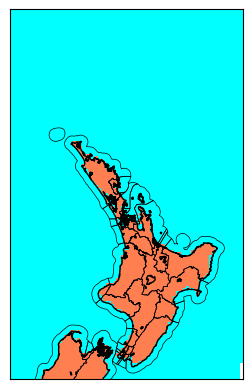

In [41]:
import salem
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
from descartes import PolygonPatch
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import random
import cmapy

m = Basemap(projection='tmerc', lat_0 = -36.848461, lon_0 = 172.763336, resolution = 'h', llcrnrlon=170,llcrnrlat=-42,urcrnrlon=179,urcrnrlat=-30)
m.readshapefile("Map Data/general-electorates-2020", "Auckland")
#m.drawmapboundary(fill_color='aqua')
m.drawcoastlines()
m.drawlsmask(land_color='coral', ocean_color='aqua', lakes=True)
plt.show()

In [42]:
!pip install geopandas


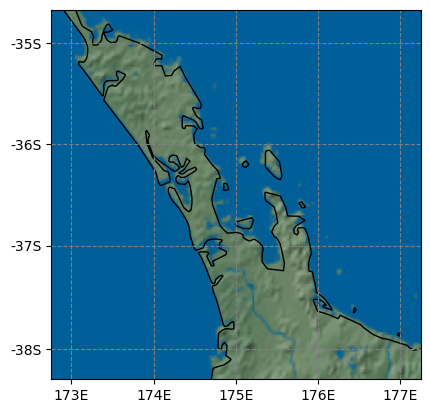

In [43]:
grid = salem.mercator_grid(transverse=False, center_ll=(175, -36.5), extent=(0.5e6, 0.5e6))

# Create a Salem Map
smap = salem.Map(grid)

# Add the Natural Earth background (other resolutions include: 'mr', 'hr')
smap.set_rgb(natural_earth='hr')

# Display the map
smap.visualize()
plt.show()

In [44]:
def is_inside(point, polygon):
    return polygon.contains_point(point)
electorate = Polygon(m.Auckland[0])
point = (Area_Coords.iloc[0,0],Area_Coords.iloc[0,1])
print(is_inside(point, electorate))

False


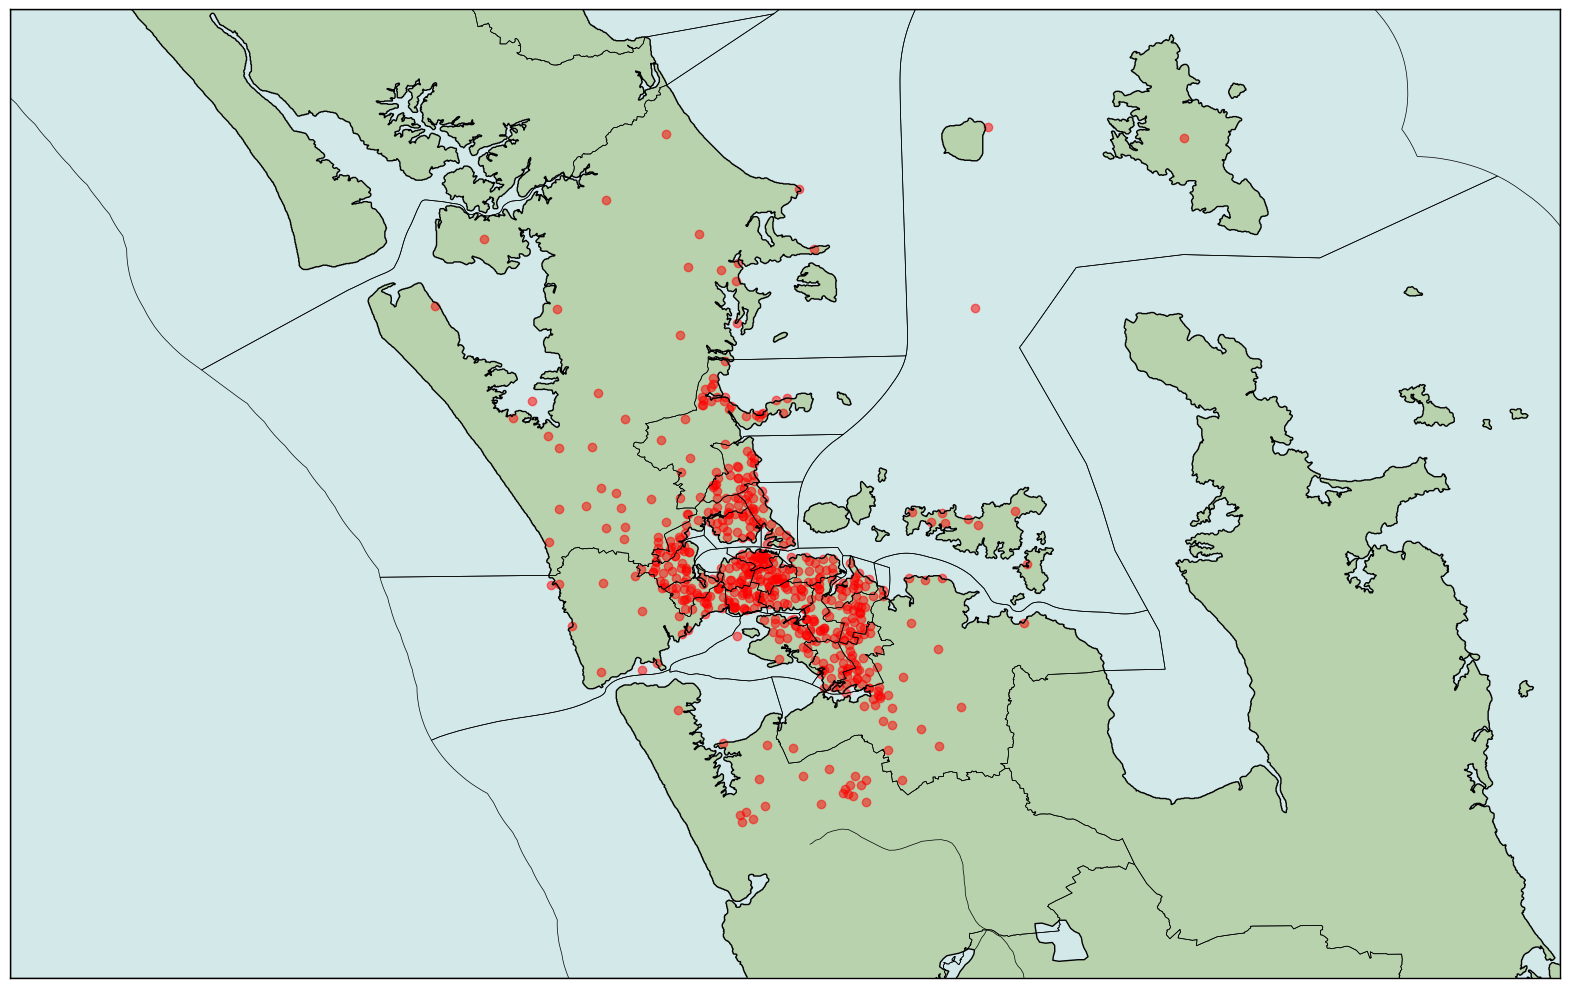

In [45]:
import salem
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Polygon
from descartes import PolygonPatch
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
import random
import cmapy
import pandas as pd
import streamlit as st
Area_Coords = pd.read_csv('Datasets/All_Areas_Lat_Lon.csv')

fig, ax = plt.subplots(figsize=(20, 40))
# Set up basemap and read in state shapefile (this will draw all state boundaries)
water_color = '#D3E8E9'
land_color = '#B7D2AD'
m = Basemap(projection='tmerc', lat_0 = -36.848461, lon_0 = 172.763336, resolution = 'f', llcrnrlon=173.6,llcrnrlat=-37.5,urcrnrlon=176,urcrnrlat=-36,epsg=4326)
m.drawmapboundary(fill_color=water_color)
m.drawcoastlines()
m.readshapefile("Map Data/general-electorates-2020", "Auckland")
m.fillcontinents(color=land_color,lake_color=water_color)
m.drawrivers()
#m.shadedrelief()
Electorate_polys = []
for electorate in m.Auckland:
    poly = Polygon(electorate)
    Electorate_polys.append(poly)
Auckland_Coords = []
for i in range(len(Area_Coords)):
    Auckland_Coords.append((Area_Coords.iloc[i,0],Area_Coords.iloc[i,1]))
lats = [x[0] for x in Auckland_Coords]
lons = [x[1] for x in Auckland_Coords]
xpt, ypt = m(lons,lats)

#xpt, ypt = m(Auckland_Coords[1],Auckland_Coords[0])
ax = plt.gca()
#for electorate in Electorate_polys:
    #for area in Auckland_Coords:
m.scatter(xpt,ypt,marker='o',color='r',alpha=0.5)
plt.show()


In [46]:
#!streamlit run C:/Users/Cole/OneDrive/Desktop/Streamlit_app.py

In [47]:
Area_Coords2020 = pd.read_csv('Datasets/All_Areas_Lat_Lon.csv')
Area_Coords2020['Electorate'] = ""
df = pd.DataFrame(m.Auckland_info)
df.set_index('GED2020__1')
display(df)
#Check using is_inside
lats = [x[0] for x in Auckland_Coords]
lons = [x[1] for x in Auckland_Coords]
xpt, ypt = m(lons,lats)
coordinates = list(zip(xpt, ypt))
counter = 0
Area_Coords2020['Electorate'] = ""
for i, electorate in enumerate(Electorate_polys):
    for j, coord in enumerate(coordinates):
        if(is_inside((coord),electorate)):
            Area_Coords2020.iloc[j,2] = df.iloc[i,1]
Area_Coords2020['Area'] = Indexed_Coords.index
Area_Coords2020.set_index('Area')
Area_Coords2020.drop(columns=['Latitude','Longitude'],inplace=True)
Area_Coords2020['Electorate'].unique()

GED2020_V1        GED2020__1        GED2020__2  General_El   LAND_AREA_  \
0         001  Auckland Central  Auckland Central       62919   485.846839   
1         001  Auckland Central  Auckland Central       62919   485.846839   
2         002   Banks Peninsula   Banks Peninsula       68134  1069.146624   
3         003     Bay of Plenty     Bay of Plenty       64223   546.806068   
4         004            Botany            Botany       65124    34.747084   
..        ...               ...               ...         ...          ...   
66        062         Whanganui         Whanganui       64175  5765.642238   
67        063      Whangaparāoa      Whangaparaoa       65847   186.287085   
68        063      Whangaparāoa      Whangaparaoa       65847   186.287085   
69        064         Whangārei         Whangarei       67131  1229.435067   
70        065            Wigram            Wigram       66396    46.107067   

     AREA_SQ_KM     Shape_Leng  RINGNUM  SHAPENUM  
0   5856.934282  432569.618479        1         1  
1   5856.934282  432569.618479        2         1  
2   4310.407294  292496.175420        1         2  
3   1588.404285  339725.237087        1         3  
4     44.559407   48914.239450        1         4  
..          ...            ...      ...       ...  
66  8644.943018  619868.567671        1        62  
67   448.117023  128405.132668        1        63  
68   448.117023  128405.132668        2        63  
69  3373.245383  304402.210907        1        64  
70    46.107267   38295.146597        1        65  

[71 rows x 9 columns]

array(['Port Waikato', 'Papakura', 'Kaipara ki Mahurangi', 'Takanini',
       'Auckland Central', 'Manurewa', 'Whangaparāoa', 'Botany',
       'Māngere', 'Panmure-Ōtāhuhu', 'Maungakiekie', 'Epsom',
       'Mt Roskill', 'Tāmaki', 'New Lynn', 'Mt Albert', 'North Shore',
       'Kelston', 'Upper Harbour', 'Te Atatū', 'Northcote',
       'East Coast Bays', 'Pakuranga'], dtype=object)

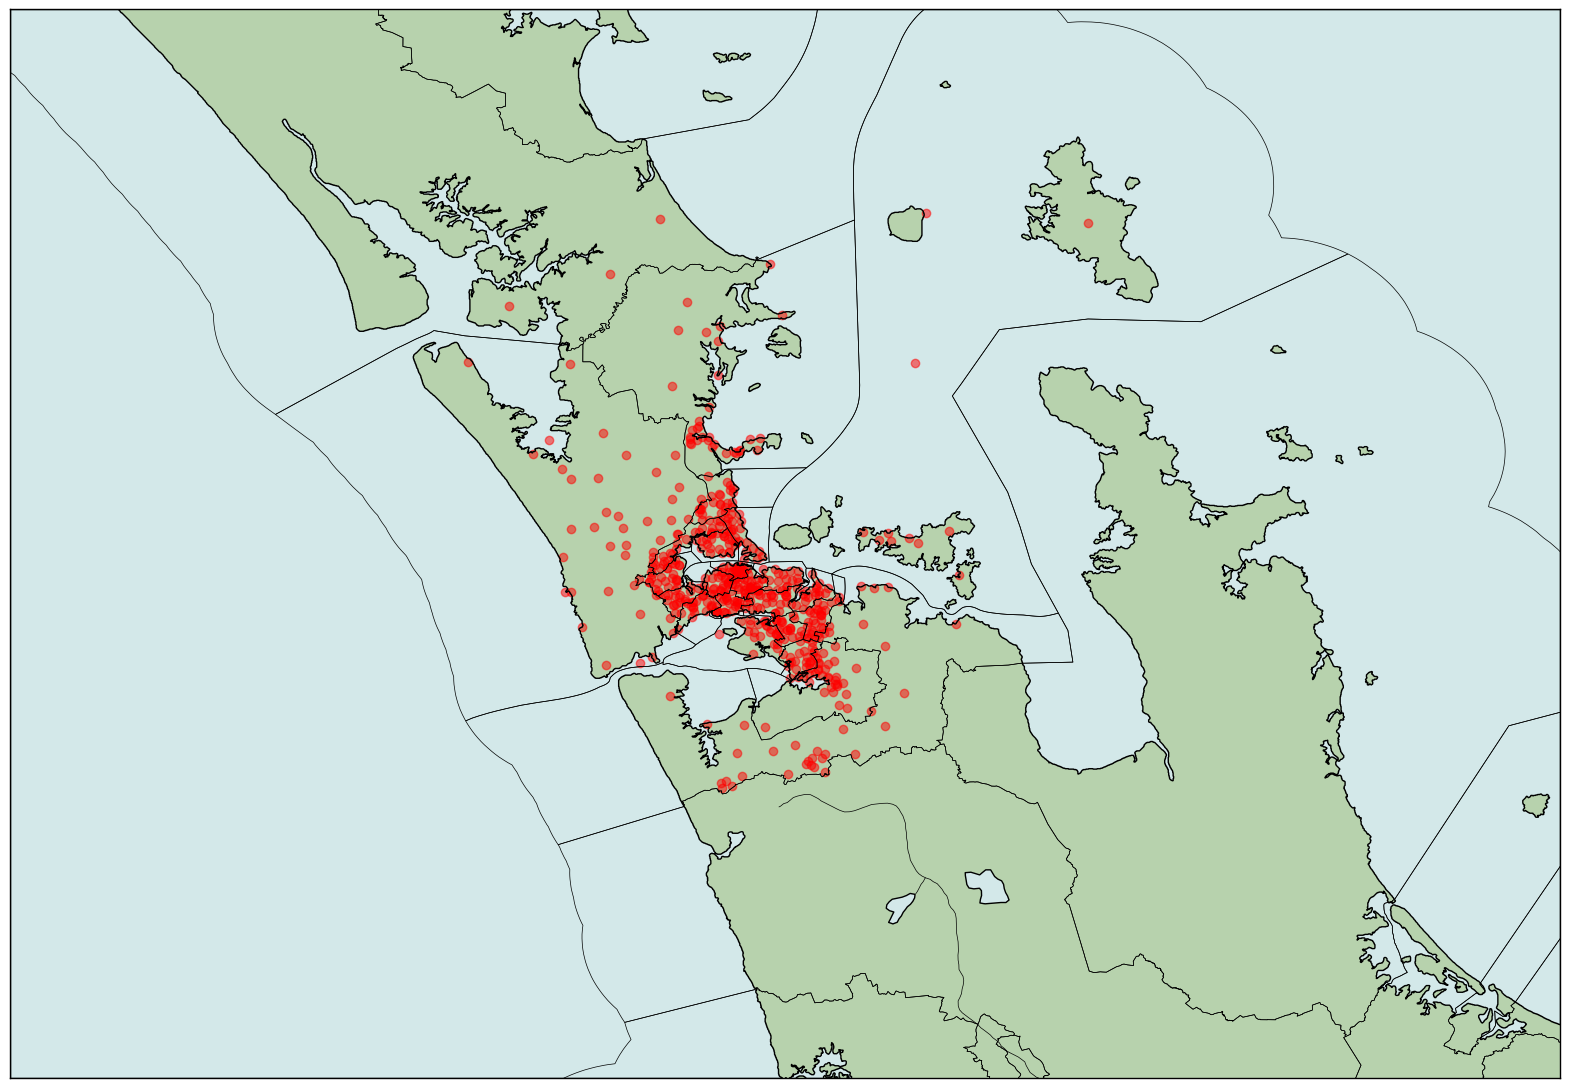

GED2014_V1          GED2014__1    AREA_SQ_KM    LAND_AREA_    Shape_STAr  \
0         003              Botany     44.562179     34.746743  4.456190e+07   
1         009       Dunedin South   4321.653563   2678.488838  4.321655e+09   
2         010          East Coast  25132.833554  13813.556414  2.513284e+10   
3         011     East Coast Bays    119.295675     46.780277  1.192983e+08   
4         013       Hamilton East     40.376007     40.376007  4.037629e+07   
..        ...                 ...           ...           ...           ...   
66        057         Waimakariri   1997.855216   1750.658748  1.997855e+09   
67        058           Wairarapa  18498.310320  11858.886256  1.849831e+10   
68        059             Waitaki  35505.336411  32542.409869  3.550534e+10   
69        060  Wellington Central    853.552648    144.149598  8.535509e+08   
70        064              Wigram     36.962712     36.962712  3.696213e+07   

      Shape_STLe    Shape_Leng  RINGNUM  SHAPENUM  
0   4.891113e+04  4.891113e+04        1         1  
1   4.652477e+05  4.652477e+05        1         2  
2   1.030485e+06  1.030485e+06        1         3  
3   6.026274e+04  6.026274e+04        1         4  
4   3.432751e+04  3.432751e+04        1         5  
..           ...           ...      ...       ...  
66  3.315775e+05  3.315775e+05        1        60  
67  6.896769e+05  6.896769e+05        1        61  
68  1.159842e+06  1.159842e+06        1        62  
69  1.340845e+05  1.340845e+05        1        63  
70  3.620523e+04  3.620523e+04        1        64  

[71 rows x 9 columns]

In [48]:
Area_Coords = pd.read_csv('Datasets/All_Areas_Lat_Lon.csv')

fig, ax = plt.subplots(figsize=(20, 40))
# Set up basemap and read in state shapefile (this will draw all state boundaries)
water_color = '#D3E8E9'
land_color = '#B7D2AD'
m14 = Basemap(projection='tmerc', lat_0 = -36.848461, lon_0 = 172.763336, resolution = 'f', llcrnrlon=173.4,llcrnrlat=-37.8,urcrnrlon=176.3,urcrnrlat=-35.8,epsg=4326)
m14.drawmapboundary(fill_color=water_color)
m14.drawcoastlines()
m14.readshapefile("Map Data/general-electoral-district-2014", "Auckland")
m14.fillcontinents(color=land_color,lake_color=water_color)
m14.drawrivers()
#m.shadedrelief()
Electorate_polys = []
for electorate in m14.Auckland:
    poly = Polygon(electorate)
    Electorate_polys.append(poly)
Auckland_Coords = []
for i in range(len(Area_Coords)):
    Auckland_Coords.append((Area_Coords.iloc[i,0],Area_Coords.iloc[i,1]))
lats = [x[0] for x in Auckland_Coords]
lons = [x[1] for x in Auckland_Coords]
xpt, ypt = m14(lons,lats)

#xpt, ypt = m(Auckland_Coords[1],Auckland_Coords[0])
ax = plt.gca()
#for electorate in Electorate_polys:
    #for area in Auckland_Coords:
m14.scatter(xpt,ypt,marker='o',color='r',alpha=0.5)
plt.show()

Area_Coords2014 = pd.read_csv('Datasets/All_Areas_Lat_Lon.csv')
Area_Coords2014['Electorate'] = ""
df = pd.DataFrame(m14.Auckland_info)
df.set_index('GED2014__1')
display(df)
#Check using is_inside
lats = [x[0] for x in Auckland_Coords]
lons = [x[1] for x in Auckland_Coords]
xpt, ypt = m14(lons,lats)
coordinates = list(zip(xpt, ypt))
counter = 0
Area_Coords2014['Electorate'] = ""
for i, electorate in enumerate(Electorate_polys):
    for j, coord in enumerate(coordinates):
        if(is_inside((coord),electorate)):
            Area_Coords2014.iloc[j,2] = df.iloc[i,1]
Area_Coords2014['Area'] = Indexed_Coords.index
Area_Coords2014.set_index('Area')
Area_Coords2014.drop(columns=['Latitude','Longitude'],inplace=True)

In [49]:
Area_Coords2020['Electorate'].unique()

array(['Port Waikato', 'Papakura', 'Kaipara ki Mahurangi', 'Takanini',
       'Auckland Central', 'Manurewa', 'Whangaparāoa', 'Botany',
       'Māngere', 'Panmure-Ōtāhuhu', 'Maungakiekie', 'Epsom',
       'Mt Roskill', 'Tāmaki', 'New Lynn', 'Mt Albert', 'North Shore',
       'Kelston', 'Upper Harbour', 'Te Atatū', 'Northcote',
       'East Coast Bays', 'Pakuranga'], dtype=object)

In [50]:
Area_Coords2014['Electorate'].unique()

array(['Hunua', 'Papakura', 'Northland', 'Auckland Central', 'Manurewa',
       'Botany', 'Rodney', 'Mangere', 'Maungakiekie', 'Epsom',
       'Mt Roskill', 'Tamaki', 'Helensville', 'Manukau East', 'New Lynn',
       'Mt Albert', 'North Shore', 'Kelston', 'Upper Harbour', 'Te Atatu',
       'Northcote', 'East Coast Bays', 'Pakuranga'], dtype=object)

In [51]:
PopbyArea_df = pd.merge(Area_Coords2020, df11, on='Area')
#PopbyArea_df['Electorate'].unique()
df1 = PopbyArea_df.drop(columns=['Area']).groupby('Electorate').sum()
df1

Total people - main means of travel to work  \
Electorate                                                          
Auckland Central                                          83328.0   
Botany                                                    77328.0   
East Coast Bays                                           74688.0   
Epsom                                                     92604.0   
Kaipara ki Mahurangi                                      78102.0   
Kelston                                                   61362.0   
Manurewa                                                  55098.0   
Maungakiekie                                              63456.0   
Mt Albert                                                 78870.0   
Mt Roskill                                                77988.0   
Māngere                                                   68958.0   
New Lynn                                                  79398.0   
North Shore                                               65766.0   
Northcote                                                 79710.0   
Pakuranga                                                 60126.0   
Panmure-Ōtāhuhu                                           69684.0   
Papakura                                                  70956.0   
Port Waikato                                              46296.0   
Takanini                                                  76116.0   
Te Atatū                                                  76326.0   
Tāmaki                                                    59604.0   
Upper Harbour                                             73248.0   
Whangaparāoa                                              79770.0   

                        Work at home    Drive a private car, truck or van  \
Electorate                                                                  
Auckland Central              8616.0                              28644.0   
Botany                        6114.0                              52392.0   
East Coast Bays               7554.0                              45528.0   
Epsom                         9336.0                              44964.0   
Kaipara ki Mahurangi         11820.0                              45744.0   
Kelston                       3684.0                              38712.0   
Manurewa                      2472.0                              38100.0   
Maungakiekie                  4302.0                              38028.0   
Mt Albert                     6882.0                              40050.0   
Mt Roskill                    5262.0                              48246.0   
Māngere                       3276.0                              47598.0   
New Lynn                      6732.0                              47424.0   
North Shore                   7428.0                              34632.0   
Northcote                     6744.0                              46152.0   
Pakuranga                     5154.0                              39168.0   
Panmure-Ōtāhuhu               3738.0                              43536.0   
Papakura                      7920.0                              43236.0   
Port Waikato                  5082.0                              29022.0   
Takanini                      4686.0                              52704.0   
Te Atatū                      4938.0                              49242.0   
Tāmaki                        6588.0                              34632.0   
Upper Harbour                 5634.0                              46920.0   
Whangaparāoa                 10026.0                              46896.0   

                        Drive a company car, truck or van  \
Electorate                                                  
Auckland Central                                   5112.0   
Botany                                             9060.0   
East Coast Bays                                    8520.0   
Epsom                                              6828.0   
Kaip

In [52]:
PopbyArea_df1 = pd.merge(Area_Coords2014, df11, on='Area')
#PopbyArea_df['Electorate'].unique()
df2 = PopbyArea_df1.drop(columns=['Area']).groupby('Electorate').sum()
df2

Total people - main means of travel to work    Work at home  \
Electorate                                                                      
Auckland Central                                      83328.0          8616.0   
Botany                                                78204.0          6204.0   
East Coast Bays                                       74688.0          7554.0   
Epsom                                                 92604.0          9336.0   
Helensville                                           89202.0         12126.0   
Hunua                                                 86544.0         10122.0   
Kelston                                               61362.0          3684.0   
Mangere                                               68958.0          3276.0   
Manukau East                                          55884.0          3012.0   
Manurewa                                              67524.0          3132.0   
Maungakiekie                                          65664.0          4140.0   
Mt Albert                                             78870.0          6882.0   
Mt Roskill                                            80148.0          5520.0   
New Lynn                                              69828.0          4680.0   
North Shore                                           65766.0          7428.0   
Northcote                                             79710.0          6744.0   
Northland                                              6066.0           714.0   
Pakuranga                                             60126.0          5154.0   
Papakura                                              88734.0          6576.0   
Rodney                                                86394.0         11928.0   
Tamaki                                                59604.0          6588.0   
Te Atatu                                              76326.0          4938.0   
Upper Harbour                                         73248.0          5634.0   

                    Drive a private car, truck or van  \
Electorate                                              
Auckland Central                              28644.0   
Botany                                        52962.0   
East Coast Bays                               45528.0   
Epsom                                         44964.0   
Helensville                                   51798.0   
Hunua                                         53838.0   
Kelston                                       38712.0   
Mangere                                       47598.0   
Manukau East                                  35064.0   
Manurewa                                      47160.0   
Maungakiekie                                  39666.0   
Mt Albert                                     40050.0   
Mt Roskill                                    49002.0   
New Lynn                                      43320.0   
North Shore                                   34632.0   
Northcote                                     46152.0   
Northland                                      3690.0   
Pakuranga                                     39168.0   
Papakura                                      58338.0   
Rodney                                        50490.0   
Tamaki                                        34632.0   
Te Atatu                                      49242.0   
Upper Harbour                                 46920.0   

                    Drive a company car, truck or van  \
Electorate                                              
Auckland Central                               5112.0   
Botany                                         9174.0   
East Coast Bays                                8520.0   
Epsom                                          6828.0   
Helensville                                   13038.0   
Hunua                                         13836.0   
Kelston                                        6270.0   
Mangere                                        5304.0

In [53]:
#Area_Coords2020.groupby('Electorate').sum()

PopbyArea_df = pd.merge(Area_Coords2014, df11, on='Area')
df2 = PopbyArea_df.drop(columns=['Area']).groupby('Electorate').sum()

### Merge all the area datasets by year

In [54]:
twolevels = [df6,df8,df9,df12,df13,df16,df17,df21]
list_of_year_names = ["2006","2013","2018"]
df_2006_list = []
df_2013_list = []
df_2018_list = []
list_of_year_lists = [df_2006_list,df_2013_list,df_2018_list]
#df3_2006 = df3.loc[:, (slice(None),slice(None), "2006")]
Auckland_crime_df = df3 + df4 + df5
#display(Auckland_crime_df)
#display(df6) #Population Age 2006, 2013, 2018
df6_2006 = df6.loc[:,(slice(None),"2006")]
df6_2006 = df6_2006.droplevel('Year', axis=1)
#df_2006_list.append(df6_2006)
df6_2013 = df6.loc[:,(slice(None),"2013")]
df6_2013 = df6_2013.droplevel('Year', axis=1)
#df_2013_list.append(df6_2013)
df6_2018 = df6.loc[:,(slice(None),"2018")]
df6_2018 = df6_2018.droplevel('Year', axis=1)
#df_2018_list.append(df6_2018)

for df in twolevels:
    for i, year_list in enumerate(list_of_year_lists):
        year_list.append(df.loc[:,(slice(None),list_of_year_names[i])].droplevel(1, axis=1))
        
#for i, year_list in enumerate(list_of_year_lists):
    #display(list_of_year_names[i])
    #for df in year_list:
        #display(df)
merged_dfs = []
area_df = pd.DataFrame(df_2006_list[0].index)
area_df.set_index('Area')

for year_list in list_of_year_lists:
    area_df = pd.DataFrame(df_2006_list[0].index)
    area_df.set_index('Area')
    for df in year_list:
        area_df = pd.merge(area_df,df, on='Area')
    merged_dfs.append(area_df)
    
for df in merged_dfs:
    df.drop_duplicates(subset='Area', keep='first',inplace=True)
    display(df)
#display(df7) #Qualification by race and year
#display(df8) #Qualification by year
#display(df9)

#display(df10) # mode of transport 2001, 2006, 2013 Auckland wide
#display(df11) # Mode of transport 2018 Auckland wide

#display(df12) #Ethnicity
#display(df13) #smokers

#display(df15) #Family income No 2006
#display(df16) #Number of kids
#display(df17) #binary religious affiliation

Area  15-29 years  30-64 years  65 years and over  \
0     Okahukura Peninsula        204.0        690.0              132.0   
2             Cape Rodney        369.0       1440.0              327.0   
4               Wellsford        309.0        708.0              252.0   
6              South Head        258.0        987.0              189.0   
8           Kaipara Hills        222.0        771.0               99.0   
...                   ...          ...          ...                ...   
1090               Pokeno         90.0        273.0               27.0   
1092             Pukekawa        174.0        657.0              108.0   
1094            Rangiriri        135.0        510.0              108.0   
1096          Te Kauwhata        144.0        363.0              228.0   
1097             Waerenga        132.0        435.0               75.0   

      No qualification  Level 1 certificate  Level 2 certificate  \
0                309.0                180.0                105.0   
2                483.0                327.0                246.0   
4                405.0                213.0                132.0   
6                378.0                228.0                144.0   
8                258.0                159.0                126.0   
...                ...                  ...                  ...   
1090             135.0                 51.0                 33.0   
1092             222.0                156.0                114.0   
1094             186.0                123.0                 84.0   
1096             246.0                 93.0                 69.0   
1097             153.0                108.0                 78.0   

      Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  \
0                    51.0                117.0             21.0  ...   
2                   108.0                270.0             75.0  ...   
4                    48.0                117.0             24.0  ...   
6                    96.0                159.0             51.0  ...   
8                    63.0                114.0             39.0  ...   
...                   ...                  ...              ...  ...   
1090                 18.0                 42.0             12.0  ...   
1092                 51.0                 90.0             45.0  ...   
1094                 36.0                 72.0             30.0  ...   
1096                 36.0                 81.0             15.0  ...   
1097                 30.0                 54.0             42.0  ...   

      Ex-smoker  Never smoked regularly  No dependent children  \
0         231.0                   495.0                   21.0   
2         471.0                  1077.0                   57.0   
4         243.0                   585.0                   18.0   
6         336.0                   678.0                   42.0   
8         246.0                   489.0                   27.0   
...         ...                     ...                    ...   
1090       81.0                   189.0                   12.0   
1092      210.0                   483.0                   36.0   
1094      159.0                   366.0                   15.0   
1096      180.0                   345.0                    9.0   
1097      111.0                   324.0                   15.0   

      One dependent child  Two dependent children  Three dependent children  \
0                    51.0                    57.0                      30.0   
2                    87.0                   105.0                      45.0   
4                    48.0                    51.0                      24.0   
6                    60.0                    84.0                      24.0   
8                    60.0                    72.0                      24.0   
...                   ...                     ...                       ...   
1090                 18.0                    24.0                       9.0   
1092                 54.0

Area  15-29 years  30-64 years  65 years and over  \
0     Okahukura Peninsula        207.0        654.0              195.0   
2             Cape Rodney        456.0       1515.0              549.0   
4               Wellsford        276.0        720.0              321.0   
6              South Head        276.0       1053.0              306.0   
8           Kaipara Hills        234.0        870.0              168.0   
...                   ...          ...          ...                ...   
1090               Pokeno         84.0        321.0               54.0   
1092             Pukekawa        171.0        654.0              138.0   
1094            Rangiriri        567.0       1089.0              180.0   
1096          Te Kauwhata        180.0        414.0              297.0   
1097             Waerenga        138.0        405.0              102.0   

      No qualification  Level 1 certificate  Level 2 certificate  \
0                243.0                177.0                117.0   
2                495.0                351.0                267.0   
4                384.0                195.0                132.0   
6                345.0                249.0                186.0   
8                237.0                156.0                141.0   
...                ...                  ...                  ...   
1090             129.0                 69.0                 33.0   
1092             180.0                132.0                126.0   
1094             351.0                159.0                129.0   
1096             264.0                 99.0                 90.0   
1097             120.0                114.0                 78.0   

      Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  \
0                    72.0                108.0             42.0  ...   
2                   165.0                267.0             84.0  ...   
4                    78.0                120.0             54.0  ...   
6                   111.0                150.0             60.0  ...   
8                    93.0                144.0             45.0  ...   
...                   ...                  ...              ...  ...   
1090                 30.0                 57.0             18.0  ...   
1092                 57.0                135.0             42.0  ...   
1094                 60.0                102.0             36.0  ...   
1096                 54.0                 84.0             30.0  ...   
1097                 42.0                 72.0             36.0  ...   

      Ex-smoker  Never smoked regularly  No dependent children  \
0         273.0                   501.0                   30.0   
2         606.0                  1218.0                   57.0   
4         300.0                   642.0                   18.0   
6         390.0                   837.0                   57.0   
8         324.0                   630.0                   27.0   
...         ...                     ...                    ...   
1090       84.0                   222.0                    9.0   
1092      234.0                   540.0                   36.0   
1094      273.0                   645.0                   21.0   
1096      228.0                   432.0                   18.0   
1097      126.0                   345.0                   18.0   

      One dependent child  Two dependent children  Three dependent children  \
0                    42.0                    48.0                      27.0   
2                    84.0                   123.0                      48.0   
4                    48.0                    48.0                      30.0   
6                    84.0                    69.0                      30.0   
8                    66.0                    90.0                      27.0   
...                   ...                     ...                       ...   
1090                 21.0                    24.0                      12.0   
1092                 42.0

Area  15-29 years  30-64 years  65 years and over  \
0     Okahukura Peninsula        237.0        723.0              213.0   
2             Cape Rodney        501.0       1686.0              681.0   
4               Wellsford        375.0        780.0              324.0   
6              South Head        381.0       1269.0              378.0   
8           Kaipara Hills        324.0       1047.0              210.0   
...                   ...          ...          ...                ...   
1090               Pokeno        474.0       1266.0              216.0   
1092             Pukekawa        231.0        753.0              162.0   
1094            Rangiriri        501.0       1212.0              231.0   
1096          Te Kauwhata        246.0        651.0              435.0   
1097             Waerenga        144.0        447.0              117.0   

      No qualification  Level 1 certificate  Level 2 certificate  \
0                225.0                198.0                156.0   
2                495.0                357.0                321.0   
4                381.0                219.0                186.0   
6                375.0                285.0                246.0   
8                252.0                186.0                171.0   
...                ...                  ...                  ...   
1090             273.0                171.0                165.0   
1092             213.0                186.0                165.0   
1094             327.0                216.0                162.0   
1096             315.0                171.0                132.0   
1097             156.0                114.0                 72.0   

      Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  \
0                   135.0                120.0             54.0  ...   
2                   249.0                315.0            129.0  ...   
4                   141.0                132.0             57.0  ...   
6                   180.0                210.0             96.0  ...   
8                   162.0                168.0             81.0  ...   
...                   ...                  ...              ...  ...   
1090                198.0                192.0            123.0  ...   
1092                 99.0                114.0             51.0  ...   
1094                186.0                150.0             75.0  ...   
1096                111.0                129.0             54.0  ...   
1097                 54.0                 78.0             42.0  ...   

      Ex-smoker  Never smoked regularly  No dependent children  \
0         366.0                   618.0                   39.0   
2         765.0                  1680.0                   90.0   
4         381.0                   816.0                   33.0   
6         543.0                  1191.0                   66.0   
8         417.0                   867.0                   39.0   
...         ...                     ...                    ...   
1090      417.0                  1332.0                   72.0   
1092      306.0                   723.0                   42.0   
1094      420.0                   834.0                   27.0   
1096      351.0                   690.0                   36.0   
1097      174.0                   420.0                   21.0   

      One dependent child  Two dependent children  Three dependent children  \
0                    54.0                    45.0                      27.0   
2                   111.0                   126.0                      48.0   
4                    51.0                    60.0                      36.0   
6                    93.0                   105.0                      42.0   
8                    87.0                    87.0                      30.0   
...                   ...                     ...                       ...   
1090                132.0                   132.0                      33.0   
1092                 48.0

In [55]:
#merged_dfs[0].info()
merged_dfs[0].astype('int64',errors='ignore')

Area  15-29 years  30-64 years  65 years and over  \
0     Okahukura Peninsula          204          690                132   
2             Cape Rodney          369         1440                327   
4               Wellsford          309          708                252   
6              South Head          258          987                189   
8           Kaipara Hills          222          771                 99   
...                   ...          ...          ...                ...   
1090               Pokeno           90          273                 27   
1092             Pukekawa          174          657                108   
1094            Rangiriri          135          510                108   
1096          Te Kauwhata          144          363                228   
1097             Waerenga          132          435                 75   

      No qualification  Level 1 certificate  Level 2 certificate  \
0                  309                  180                  105   
2                  483                  327                  246   
4                  405                  213                  132   
6                  378                  228                  144   
8                  258                  159                  126   
...                ...                  ...                  ...   
1090               135                   51                   33   
1092               222                  156                  114   
1094               186                  123                   84   
1096               246                   93                   69   
1097               153                  108                   78   

      Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  \
0                      51                  117               21  ...   
2                     108                  270               75  ...   
4                      48                  117               24  ...   
6                      96                  159               51  ...   
8                      63                  114               39  ...   
...                   ...                  ...              ...  ...   
1090                   18                   42               12  ...   
1092                   51                   90               45  ...   
1094                   36                   72               30  ...   
1096                   36                   81               15  ...   
1097                   30                   54               42  ...   

      Ex-smoker  Never smoked regularly  No dependent children  \
0           231                     495                   21.0   
2           471                    1077                   57.0   
4           243                     585                   18.0   
6           336                     678                   42.0   
8           246                     489                   27.0   
...         ...                     ...                    ...   
1090         81                     189                   12.0   
1092        210                     483                   36.0   
1094        159                     366                   15.0   
1096        180                     345                    9.0   
1097        111                     324                   15.0   

      One dependent child  Two dependent children  Three dependent children  \
0                    51.0                    57.0                      30.0   
2                    87.0                   105.0                      45.0   
4                    48.0                    51.0                      24.0   
6                    60.0                    84.0                      24.0   
8                    60.0                    72.0                      24.0   
...                   ...                     ...                       ...   
1090                 18.0                    24.0                       9.0   
1092                 54.0

In [56]:
#merged_dfs[0].info()
merged_dfs[0].select_dtypes(exclude=['object','int64']).astype('int64',errors='ignore')

15-29 years  30-64 years  65 years and over  No qualification  \
0           204.0        690.0              132.0             309.0   
2           369.0       1440.0              327.0             483.0   
4           309.0        708.0              252.0             405.0   
6           258.0        987.0              189.0             378.0   
8           222.0        771.0               99.0             258.0   
...           ...          ...                ...               ...   
1090         90.0        273.0               27.0             135.0   
1092        174.0        657.0              108.0             222.0   
1094        135.0        510.0              108.0             186.0   
1096        144.0        363.0              228.0             246.0   
1097        132.0        435.0               75.0             153.0   

      Level 1 certificate  Level 2 certificate  Level 3 certificate  \
0                   180.0                105.0                 51.0   
2                   327.0                246.0                108.0   
4                   213.0                132.0                 48.0   
6                   228.0                144.0                 96.0   
8                   159.0                126.0                 63.0   
...                   ...                  ...                  ...   
1090                 51.0                 33.0                 18.0   
1092                156.0                114.0                 51.0   
1094                123.0                 84.0                 36.0   
1096                 93.0                 69.0                 36.0   
1097                108.0                 78.0                 30.0   

      Level 4 certificate  Level 5 diploma  Level 6 diploma  ...  \
0                   117.0             21.0             51.0  ...   
2                   270.0             75.0            108.0  ...   
4                   117.0             24.0             48.0  ...   
6                   159.0             51.0             63.0  ...   
8                   114.0             39.0             42.0  ...   
...                   ...              ...              ...  ...   
1090                 42.0             12.0             15.0  ...   
1092                 90.0             45.0             42.0  ...   
1094                 72.0             30.0             30.0  ...   
1096                 81.0             15.0             30.0  ...   
1097                 54.0             42.0             36.0  ...   

      Regular smoker  Ex-smoker  Never smoked regularly  \
0              222.0      231.0                   495.0   
2              411.0      471.0                  1077.0   
4              333.0      243.0                   585.0   
6              258.0      336.0                   678.0   
8              210.0      246.0                   489.0   
...              ...        ...                     ...   
1090            81.0       81.0                   189.0   
1092           162.0      210.0                   483.0   
1094           132.0      159.0                   366.0   
1096           156.0      180.0                   345.0   
1097           132.0      111.0                   324.0   

      No dependent children  One dependent child  Two dependent children  \
0                      21.0                 51.0                    57.0   
2                      57.0                 87.0                   105.0   
4                      18.0                 48.0                    51.0   
6                      42.0                 60.0                    84.0   
8                      27.0                 60.0                    72.0   
...                     ...                  ...                     ...   
1090                   12.0                 18.0                    24.0   
1092                   36.0                 54.0                    54.0   
1094                   15.0                 27.0                    42.0   
1096          

In [57]:
#https://www.macrotrends.net/global-metrics/cities/21957/auckland/population

# Change column title for each DataFrame
merged_dfs[0] = merged_dfs[0].rename(columns={'Total people - age group': 'Total number of respondents'})
merged_dfs[1] = merged_dfs[1].rename(columns={'Total people - age group': 'Total number of respondents'})
merged_dfs[2] = merged_dfs[2].rename(columns={'Total people - age group': 'Total number of respondents'})

# Set the year for each DataFrame
merged_dfs[0]['Year'] = '2006'
merged_dfs[0]['Total number of respondents'] = merged_dfs[0]['Total number of respondents'].astype('float64')
# 1273000

merged_dfs[1]['Year'] = '2013'
merged_dfs[1]['Total number of respondents'] = merged_dfs[1]['Total number of respondents'].astype('float64')
# 1407000

merged_dfs[2]['Year'] = '2018'
merged_dfs[2]['Total number of respondents'] = merged_dfs[2]['Total number of respondents'].astype('float64')
# 1557000

# Population calculations
# Population 2017 1526000 1407000 * 1.0206 * 1.0202 * 1.0205 * 1.0207
# Population 2020 1607000 1557000 * 1.0203 * 1.0161 * 1.0158
# Population 2023 1673000 1557000 * 1.0203 * 1.0161 * 1.0158 * 1.0143 * 1.0135 * 1.0127
# Population 2024 1693000 1557000 * 1.0203 * 1.0161 * 1.0158 * 1.0143 * 1.0135 * 1.0127 * 1.012

df_2017 = merged_dfs[1].select_dtypes(exclude=['object', 'int64']) * round(1.0206 * 1.0202 * 1.0205 * 1.0207, 0)
df_2020 = merged_dfs[2].select_dtypes(exclude=['object', 'int64']) * round(1.0203 * 1.0161 * 1.0158, 0)
df_2023 = merged_dfs[2].select_dtypes(exclude=['object', 'int64']) * round(1.0203 * 1.0161 * 1.0158 * 1.0143 * 1.0135 * 1.0127, 1)
df_2024 = merged_dfs[2].select_dtypes(exclude=['object', 'int64']) * round(1.0203 * 1.0161 * 1.0158 * 1.0143 * 1.0135 * 1.0127 * 1.012, 1)


In [58]:
# Perform operations and save to CSV
#Sneaky Northland
Area_Coords2014.drop(columns='Area').join(df_2017).groupby('Electorate').sum().drop('Northland').to_csv('ProjectedDatasets/df_2017_sums.csv')
Area_Coords2020.drop(columns='Area').join(df_2020).groupby('Electorate').sum().to_csv('ProjectedDatasets/df_2020_sums.csv')
Area_Coords2020.drop(columns='Area').join(df_2023).groupby('Electorate').sum().to_csv('ProjectedDatasets/df_2023_sums.csv')
Area_Coords2020.drop(columns='Area').join(df_2024).groupby('Electorate').sum().to_csv('ProjectedDatasets/df_2024_sums.csv')


In [59]:
df_2017 = pd.read_csv('ProjectedDatasets/df_2017_sums.csv')
df_2017.head(23)

Electorate  15-29 years  30-64 years  65 years and over  \
0   Auckland Central       8499.0      20064.0             5229.0   
1             Botany       9024.0      13065.0             2952.0   
2    East Coast Bays       4827.0      11097.0             3303.0   
3              Epsom       7245.0      16236.0             3726.0   
4        Helensville      14367.0      30885.0             7980.0   
5              Hunua       8436.0      20316.0             5571.0   
6            Kelston       4956.0      11430.0             3261.0   
7            Mangere      10746.0      17997.0             3459.0   
8       Manukau East       4209.0       9735.0             2271.0   
9           Manurewa       5124.0      12207.0             4728.0   
10      Maungakiekie       8739.0      13140.0             2775.0   
11         Mt Albert       5196.0      12789.0             3132.0   
12        Mt Roskill       8109.0      15360.0             3660.0   
13          New Lynn       5838.0      12765.0             3087.0   
14       North Shore       4809.0      11247.0             2868.0   
15         Northcote       6669.0      15537.0             3831.0   
16         Pakuranga      10206.0      11376.0             2292.0   
17          Papakura       7572.0      18798.0             6663.0   
18            Rodney       9789.0      21153.0             5328.0   
19            Tamaki       8148.0      12741.0             2481.0   
20          Te Atatu       6444.0      15297.0             4404.0   
21     Upper Harbour       8595.0      18630.0             4551.0   

    No qualification  Level 1 certificate  Level 2 certificate  \
0             4119.0               3129.0               3069.0   
1             3591.0               2121.0               1890.0   
2             2781.0               1974.0               1752.0   
3             3906.0               2658.0               2385.0   
4             7173.0               4941.0               4557.0   
5             5712.0               3651.0               3159.0   
6             2481.0               1728.0               1674.0   
7             3555.0               2367.0               2364.0   
8             2676.0               1956.0               1674.0   
9             3042.0               2076.0               1869.0   
10            1824.0               1437.0               1437.0   
11            2331.0               2061.0               1914.0   
12            2793.0               2025.0               2058.0   
13            3159.0               2130.0               1968.0   
14            2169.0               1749.0               1782.0   
15            2919.0               2340.0               2304.0   
16            2013.0               1278.0               1383.0   
17            4335.0               3309.0               2922.0   
18            3960.0               3045.0               3036.0   
19            1755.0               1461.0               1602.0   
20            3021.0               2568.0               2469.0   
21            4623.0               3081.0               2838.0   

    Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  Ex-smoker  \
0                3132.0               2544.0           1419.0  ...     6837.0   
1                3132.0               1605.0            846.0  ...     3660.0   
2                1764.0               1473.0            837.0  ...     3588.0   
3                2388.0               2088.0           1155.0  ...     5211.0   
4                5247.0               3582.0           2253.0  ...     9177.0   
5                2907.0               2667.0           1392.0  ...     6738.0   
6                1827.0               1401.0            846.0  ...     3795.0   
7                3354.0               2001.0           1449.0  ...     5064.0   
8                1422.0               1476.0            669.0  ...     3471.0   
9                1725.0               1593.0            831.0  ...     4896.0   
10          

In [60]:
df_2020 = pd.read_csv('ProjectedDatasets/df_2020_sums.csv')
df_2020.head(25)

Electorate  15-29 years  30-64 years  65 years and over  \
0       Auckland Central       9909.0      22506.0             6066.0   
1                 Botany       9924.0      15366.0             3495.0   
2        East Coast Bays       5355.0      11913.0             3831.0   
3                  Epsom       8406.0      18531.0             4239.0   
4   Kaipara ki Mahurangi      11676.0      25338.0             7098.0   
5                Kelston       5727.0      12408.0             3609.0   
6               Manurewa       5751.0      12102.0             4047.0   
7           Maungakiekie       7587.0      10665.0             2232.0   
8              Mt Albert       5745.0      13614.0             3816.0   
9             Mt Roskill       7209.0      14910.0             4179.0   
10               Māngere      11454.0      20655.0             4107.0   
11              New Lynn       9609.0      22371.0             5454.0   
12           North Shore       5160.0      11706.0             3750.0   
13             Northcote       7677.0      15999.0             4077.0   
14             Pakuranga      10401.0      12549.0             2595.0   
15       Panmure-Ōtāhuhu       8661.0      16197.0             3495.0   
16              Papakura       5499.0      13701.0             5280.0   
17          Port Waikato       5463.0      12939.0             4584.0   
18              Takanini       8313.0      19200.0             6753.0   
19              Te Atatū       7107.0      16374.0             4971.0   
20                Tāmaki       8220.0      13626.0             3057.0   
21         Upper Harbour       9204.0      19851.0             5016.0   
22          Whangaparāoa      12333.0      25914.0             7065.0   

    No qualification  Level 1 certificate  Level 2 certificate  \
0             3918.0               3198.0               3159.0   
1             3582.0               2115.0               1989.0   
2             2832.0               1719.0               1728.0   
3             3942.0               2658.0               2556.0   
4             5217.0               3603.0               3240.0   
5             2427.0               1686.0               1593.0   
6             2571.0               1848.0               1773.0   
7             1323.0                969.0               1074.0   
8             2409.0               1989.0               1965.0   
9             2844.0               1893.0               2070.0   
10            3483.0               2307.0               2433.0   
11            4059.0               2757.0               2946.0   
12            2247.0               1713.0               1674.0   
13            2820.0               2106.0               2181.0   
14            1962.0               1164.0               1281.0   
15            3084.0               2100.0               2073.0   
16            3477.0               2577.0               2265.0   
17            3792.0               2370.0               2163.0   
18            4218.0               2727.0               2646.0   
19            3150.0               2442.0               2352.0   
20            1767.0               1374.0               1533.0   
21            4338.0               2775.0               2694.0   
22            5019.0               3495.0               3300.0   

    Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  Ex-smoker  \
0                4008.0               2547.0           1608.0  ...     7722.0   
1                3543.0               1752.0           1185.0  ...     4506.0   
2                2259.0               1383.0            951.0  ...     3984.0   
3                3273.0               2292.0           1353.0  ...     6012.0   
4                4695.0               2817.0           1878.0  ...     7869.0   
5                2217.0               1269.0            873.0  ...     4110.0   
6                2343.0               1482.0            885.0  ...     4836.0   
7                1605.0     

In [61]:
df_2023 = pd.read_csv('ProjectedDatasets/df_2023_sums.csv')
df_2023.head(25)

Electorate  15-29 years  30-64 years  65 years and over  \
0       Auckland Central      10899.9      24756.6             6672.6   
1                 Botany      10916.4      16902.6             3844.5   
2        East Coast Bays       5890.5      13104.3             4214.1   
3                  Epsom       9246.6      20384.1             4662.9   
4   Kaipara ki Mahurangi      12843.6      27871.8             7807.8   
5                Kelston       6299.7      13648.8             3969.9   
6               Manurewa       6326.1      13312.2             4451.7   
7           Maungakiekie       8345.7      11731.5             2455.2   
8              Mt Albert       6319.5      14975.4             4197.6   
9             Mt Roskill       7929.9      16401.0             4596.9   
10               Māngere      12599.4      22720.5             4517.7   
11              New Lynn      10569.9      24608.1             5999.4   
12           North Shore       5676.0      12876.6             4125.0   
13             Northcote       8444.7      17598.9             4484.7   
14             Pakuranga      11441.1      13803.9             2854.5   
15       Panmure-Ōtāhuhu       9527.1      17816.7             3844.5   
16              Papakura       6048.9      15071.1             5808.0   
17          Port Waikato       6009.3      14232.9             5042.4   
18              Takanini       9144.3      21120.0             7428.3   
19              Te Atatū       7817.7      18011.4             5468.1   
20                Tāmaki       9042.0      14988.6             3362.7   
21         Upper Harbour      10124.4      21836.1             5517.6   
22          Whangaparāoa      13566.3      28505.4             7771.5   

    No qualification  Level 1 certificate  Level 2 certificate  \
0             4309.8               3517.8               3474.9   
1             3940.2               2326.5               2187.9   
2             3115.2               1890.9               1900.8   
3             4336.2               2923.8               2811.6   
4             5738.7               3963.3               3564.0   
5             2669.7               1854.6               1752.3   
6             2828.1               2032.8               1950.3   
7             1455.3               1065.9               1181.4   
8             2649.9               2187.9               2161.5   
9             3128.4               2082.3               2277.0   
10            3831.3               2537.7               2676.3   
11            4464.9               3032.7               3240.6   
12            2471.7               1884.3               1841.4   
13            3102.0               2316.6               2399.1   
14            2158.2               1280.4               1409.1   
15            3392.4               2310.0               2280.3   
16            3824.7               2834.7               2491.5   
17            4171.2               2607.0               2379.3   
18            4639.8               2999.7               2910.6   
19            3465.0               2686.2               2587.2   
20            1943.7               1511.4               1686.3   
21            4771.8               3052.5               2963.4   
22            5520.9               3844.5               3630.0   

    Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  Ex-smoker  \
0                4408.8               2801.7           1768.8  ...     8494.2   
1                3897.3               1927.2           1303.5  ...     4956.6   
2                2484.9               1521.3           1046.1  ...     4382.4   
3                3600.3               2521.2           1488.3  ...     6613.2   
4                5164.5               3098.7           2065.8  ...     8655.9   
5                2438.7               1395.9            960.3  ...     4521.0   
6                2577.3               1630.2            973.5  ...     5319.6   
7                1765.5     

In [62]:
df_2024 = pd.read_csv('ProjectedDatasets/df_2024_sums.csv')
df_2024.head(25)

Electorate  15-29 years  30-64 years  65 years and over  \
0       Auckland Central      10899.9      24756.6             6672.6   
1                 Botany      10916.4      16902.6             3844.5   
2        East Coast Bays       5890.5      13104.3             4214.1   
3                  Epsom       9246.6      20384.1             4662.9   
4   Kaipara ki Mahurangi      12843.6      27871.8             7807.8   
5                Kelston       6299.7      13648.8             3969.9   
6               Manurewa       6326.1      13312.2             4451.7   
7           Maungakiekie       8345.7      11731.5             2455.2   
8              Mt Albert       6319.5      14975.4             4197.6   
9             Mt Roskill       7929.9      16401.0             4596.9   
10               Māngere      12599.4      22720.5             4517.7   
11              New Lynn      10569.9      24608.1             5999.4   
12           North Shore       5676.0      12876.6             4125.0   
13             Northcote       8444.7      17598.9             4484.7   
14             Pakuranga      11441.1      13803.9             2854.5   
15       Panmure-Ōtāhuhu       9527.1      17816.7             3844.5   
16              Papakura       6048.9      15071.1             5808.0   
17          Port Waikato       6009.3      14232.9             5042.4   
18              Takanini       9144.3      21120.0             7428.3   
19              Te Atatū       7817.7      18011.4             5468.1   
20                Tāmaki       9042.0      14988.6             3362.7   
21         Upper Harbour      10124.4      21836.1             5517.6   
22          Whangaparāoa      13566.3      28505.4             7771.5   

    No qualification  Level 1 certificate  Level 2 certificate  \
0             4309.8               3517.8               3474.9   
1             3940.2               2326.5               2187.9   
2             3115.2               1890.9               1900.8   
3             4336.2               2923.8               2811.6   
4             5738.7               3963.3               3564.0   
5             2669.7               1854.6               1752.3   
6             2828.1               2032.8               1950.3   
7             1455.3               1065.9               1181.4   
8             2649.9               2187.9               2161.5   
9             3128.4               2082.3               2277.0   
10            3831.3               2537.7               2676.3   
11            4464.9               3032.7               3240.6   
12            2471.7               1884.3               1841.4   
13            3102.0               2316.6               2399.1   
14            2158.2               1280.4               1409.1   
15            3392.4               2310.0               2280.3   
16            3824.7               2834.7               2491.5   
17            4171.2               2607.0               2379.3   
18            4639.8               2999.7               2910.6   
19            3465.0               2686.2               2587.2   
20            1943.7               1511.4               1686.3   
21            4771.8               3052.5               2963.4   
22            5520.9               3844.5               3630.0   

    Level 3 certificate  Level 4 certificate  Level 5 diploma  ...  Ex-smoker  \
0                4408.8               2801.7           1768.8  ...     8494.2   
1                3897.3               1927.2           1303.5  ...     4956.6   
2                2484.9               1521.3           1046.1  ...     4382.4   
3                3600.3               2521.2           1488.3  ...     6613.2   
4                5164.5               3098.7           2065.8  ...     8655.9   
5                2438.7               1395.9            960.3  ...     4521.0   
6                2577.3               1630.2            973.5  ...     5319.6   
7                1765.5     

## 1.3 Polling data from 2017 - 2024

In [63]:
# imports
import requests                 
from bs4 import BeautifulSoup   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from sklearn.impute import KNNImputer

In [64]:
from pylab import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

%matplotlib inline

In [65]:
wikiurl="https://en.wikipedia.org/wiki/Opinion_polling_for_the_2017_New_Zealand_general_election"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl)
print(response.status_code)

200


In [66]:
soup = BeautifulSoup(response.text, 'html.parser')
indiatable=soup.find('table',{'class':"sortable"})

In [67]:
election_poll_2017 = pd.read_html(str(indiatable))
election_poll_2017 = pd.DataFrame(election_poll_2017[0])
election_poll_2017 = election_poll_2017.dropna(how='all')
election_poll_2017.fillna(0, inplace=True)
election_poll_2017.replace("–", 0, inplace=True)
election_poll_2017 = election_poll_2017.drop(election_poll_2017.index[0])
election_poll_2017.rename(columns={'Date[nb 1]': 'Date'}, inplace=True)
election_poll_2017['Date'] = election_poll_2017['Date'].str.extract(r'(\d{1,2}\s\w+\s\d{4})')
election_poll_2017['Date'] = pd.to_datetime(election_poll_2017['Date'], errors='coerce')
election_poll_2017 = election_poll_2017.set_index(['Date'])
election_poll_2017 = election_poll_2017.iloc[:-1]
election_poll_2017 = election_poll_2017.replace(to_replace=r'\[.*?\]', value='', regex=True)
election_poll_2017.index = election_poll_2017.index.to_series().ffill().bfill()
event_rows_2017 = election_poll_2017[election_poll_2017.iloc[:, 1:-1].eq(election_poll_2017.iloc[:, 1], axis=0).all(axis=1)]
key_events_2017 = event_rows_2017.copy()
election_poll_2017.drop(event_rows_2017.index, inplace=True)

election_poll_2017.rename(columns={'NAT': 'National Party',
                                   'LAB': 'Labour Party',
                                   'GRN': 'Green Party',
                                   'NZF': 'New Zealand First Party',
                                   'MRI': 'Te Pāti Māori',
                                   'ACT': 'ACT New Zealand',
                                   'UNF': 'United Future',
                                   'CON': 'New Conservatives Party',
                                   'MNA': 'Mana Movement',
                                   'TOP': 'The Opportunities Party'}, inplace=True)

other_party_2017 = ['Te Pāti Māori', 'United Future', 'New Conservatives Party', 'Mana Movement', 'The Opportunities Party']
election_poll_2017[other_party_2017] = election_poll_2017[other_party_2017].apply(pd.to_numeric, errors='coerce').fillna(0)
election_poll_2017['Other'] = election_poll_2017[other_party_2017].sum(axis=1)
election_poll_2017['Election Year'] = '2017'
election_poll_2017.drop(columns=other_party_2017, inplace=True)
election_poll_2017.to_csv('election_poll_2017.csv', index=True)
election_poll_2017

Poll National Party Labour Party Green Party  \
Date                                                                          
2014-10-12      Roy Morgan Research           43.5         22.5        17.5   
2014-11-09      Roy Morgan Research           49.5           24        14.5   
2014-12-07      Roy Morgan Research             46           27          12   
2014-12-21          Herald–DigiPoll           50.4         28.9         9.5   
2015-01-18      Roy Morgan Research             52           26          11   
...                             ...            ...          ...         ...   
2017-09-06             Newsroom-SSI             30           45           6   
2017-09-10      Roy Morgan Research             40         39.5           9   
2017-09-13  One News–Colmar Brunton             40           44           7   
2017-09-20    Newshub Reid Research           45.8         37.3         7.1   
2017-09-19  One News–Colmar Brunton             46           37           8   

           New Zealand First Party ACT New Zealand  Other Election Year  
Date                                                                     
2014-10-12                       7             0.5    8.5          2017  
2014-11-09                     6.5             0.5    3.5          2017  
2014-12-07                       7             1.5    5.5          2017  
2014-12-21                     5.6             0.4    4.6          2017  
2015-01-18                       6               1    3.5          2017  
...                            ...             ...    ...           ...  
2017-09-06                      11               1    4.0          2017  
2017-09-10                       6             0.5    4.5          2017  
2017-09-13                       6             0.6    2.5          2017  
2017-09-20                     7.1             0.6    2.0          2017  
2017-09-19                     4.9             0.3    2.8          2017  

[78 rows x 8 columns]

In [68]:
wikiurl1="https://en.wikipedia.org/wiki/Opinion_polling_for_the_2020_New_Zealand_general_election"
table_class1="wikitable sortable jquery-tablesorter"
response1=requests.get(wikiurl1)
print(response1.status_code)

200


In [69]:
soup1 = BeautifulSoup(response1.text, 'html.parser')
indiatable1=soup1.find('table',{'class':"sortable"})

In [70]:
election_poll_2020 = pd.read_html(str(indiatable1))
election_poll_2020 = pd.DataFrame(election_poll_2020[0])
election_poll_2020 = election_poll_2020.dropna(how='all')
election_poll_2020.fillna(0, inplace=True)
election_poll_2020.replace("–", 0, inplace=True)
election_poll_2020 = election_poll_2020.drop(election_poll_2020.index[0])
election_poll_2020 = election_poll_2020.drop(election_poll_2020.index[-1])

election_poll_2020.rename(columns={'Date[nb 1]': 'Date', 'Polling organisation': 'Poll'}, inplace=True)
election_poll_2020['Date'] = election_poll_2020['Date'].str.extract(r'(\d{1,2}\s\w+\s\d{4})')
election_poll_2020['Date'] = pd.to_datetime(election_poll_2020['Date'], errors='coerce')
election_poll_2020 = election_poll_2020.set_index(['Date'])
election_poll_2020 = election_poll_2020.iloc[:-1]
election_poll_2020 = election_poll_2020.replace(to_replace=r'\[.*?\]', value='', regex=True)
election_poll_2020.index = election_poll_2020.index.to_series().ffill().bfill()
event_rows_2020 = election_poll_2020[election_poll_2020.iloc[:, 1:-1].eq(election_poll_2020.iloc[:, 1], axis=0).all(axis=1)]
key_events_2020 = event_rows_2020.copy()
election_poll_2020.drop(event_rows_2020.index, inplace=True)
election_poll_2020.rename(columns={'NAT': 'National Party',
                                   'LAB': 'Labour Party',
                                   'GRN': 'Green Party',
                                   'NZF': 'New Zealand First Party',
                                   'MRI': 'Te Pāti Māori',
                                   'ACT': 'ACT New Zealand',
#                                   'UNF': 'United Future',
#                                   'CON': 'New Conservatives Party',
#                                   'MNA': 'Mana Movement',
                                   'TOP': 'The Opportunities Party',
                                  'NCP': 'New Conservatives Party',
                                  'ANZ': 'Advance New Zealand'}, inplace=True)
election_poll_2020.drop(columns=['Sample size', 'Lead'], inplace=True)
other_party_2020 = ['Te Pāti Māori', 'The Opportunities Party', 'New Conservatives Party', 'Advance New Zealand' ]
election_poll_2020[other_party_2020] = election_poll_2020[other_party_2020].apply(pd.to_numeric, errors='coerce').fillna(0)
election_poll_2020['Other'] = election_poll_2020[other_party_2020].sum(axis=1)
election_poll_2020['Election Year'] = '2020'
election_poll_2020.drop(columns=other_party_2020, inplace=True)
election_poll_2020.to_csv('election_poll_2020.csv', index=True)
election_poll_2020

Poll National Party Labour Party  \
Date                                                                
2020-10-15      Newshub–Reid Research           31.1         45.8   
2020-10-14      1 News–Colmar Brunton             31           46   
2020-10-07      1 News–Colmar Brunton             32           47   
2020-09-27      1 News–Colmar Brunton             33           47   
2020-09-23      Newshub–Reid Research           29.6         50.1   
2020-09-21      1 News–Colmar Brunton             31           48   
2020-09-21        Roy Morgan Research           28.5         48.0   
2020-07-29      1 News–Colmar Brunton             32           53   
2020-07-24      Newshub–Reid Research           25.1         60.9   
2020-06-24      1 News–Colmar Brunton             38           50   
2020-05-24        Roy Morgan Research           26.5         56.5   
2020-05-20      1 News–Colmar Brunton             29           59   
2020-05-16      Newshub–Reid Research           30.6         56.5   
2020-02-12      1 News–Colmar Brunton             46           41   
2020-02-01      Newshub–Reid Research           43.3         42.5   
2020-02-01        Roy Morgan Research             40           40   
2019-11-27      1 News–Colmar Brunton             46           39   
2019-11-11               Stuff–YouGov             38           41   
2019-10-09      1 News–Colmar Brunton             47           40   
2019-10-09      Newshub–Reid Research           43.9         41.6   
2019-07-24      1 News–Colmar Brunton             45           43   
2019-06-08      1 News–Colmar Brunton             44           42   
2019-06-07      Newshub–Reid Research           37.4         50.8   
2019-04-10      1 News–Colmar Brunton             40           48   
2019-03-23  Business NZ–Reid Research           41.3         49.6   
2019-02-13      1 News–Colmar Brunton             42           45   
2019-02-02      Newshub–Reid Research           41.6         47.5   
2018-11-28      1 News–Colmar Brunton             46           43   
2018-10-19      1 News–Colmar Brunton             43           45   
2018-08-01      1 News–Colmar Brunton             45           42   
2018-05-24      Newshub–Reid Research           45.1         42.6   
2018-05-23      1 News–Colmar Brunton             45           43   
2018-04-11      1 News–Colmar Brunton             44           43   
2018-02-14      1 News–Colmar Brunton             43           48   
2018-01-28      Newshub–Reid Research           44.5         42.3   
2018-01-28        Roy Morgan Research             39         42.5   
2017-12-10        Roy Morgan Research           40.5           37   
2017-12-05      1 News–Colmar Brunton             46           39   
2017-11-12        Roy Morgan Research           40.5         39.5   
2017-10-15        Roy Morgan Research             46           31   

           New Zealand First Party Green Party ACT New Zealand  Other  \
Date                                                                    
2020-10-15                     3.5         6.3             7.4    3.9   
2020-10-14                     2.6           8               8    4.1   
2020-10-07                     2.4           6               8    4.2   
2020-09-27                     1.4           7               8    3.8   
2020-09-23                     1.9         6.5             6.3    4.5   
2020-09-21                     2.4           6               7    4.4   
2020-09-21                     2.5        11.5             6.0    1.5   
2020-07-29                       2           5             4.8    2.3   
2020-07-24                     2.0         5.7             3.3    1.7   
2020-06-24                     1.8           6             3.1    2.1   
2020-05-24                     2.5           7             3.5    2.5   
2020-05-20                     2.9         4.7             2.2    2.1   
2020-05-16                     2.7         5.5             1.8    2.0   
2020-02-12                     3.3     

In [71]:
wikiurl2="https://en.wikipedia.org/wiki/Opinion_polling_for_the_2023_New_Zealand_general_election"
table_class2="wikitable sortable jquery-tablesorter"
response2=requests.get(wikiurl2)
print(response2.status_code)

200


In [72]:
soup2 = BeautifulSoup(response2.text, 'html.parser')
indiatable2=soup2.find('table',{'class':"sortable"})

In [73]:
election_poll_2023 = pd.read_html(str(indiatable2))
election_poll_2023 = pd.DataFrame(election_poll_2023[0])
election_poll_2023 = election_poll_2023.dropna(how='all')
election_poll_2023.fillna(0, inplace=True)
election_poll_2023.replace("–", 0, inplace=True)
election_poll_2023 = election_poll_2023.drop(election_poll_2023.index[0])
election_poll_2023 = election_poll_2023.drop(election_poll_2023.index[-1])

election_poll_2023.rename(columns={'Date[a]': 'Date', 'Polling organisation': 'Poll'}, inplace=True)
election_poll_2023['Date'] = election_poll_2023['Date'].str.extract(r'(\d{1,2}\s\w+\s\d{4})')
election_poll_2023['Date'] = pd.to_datetime(election_poll_2023['Date'], errors='coerce')
election_poll_2023 = election_poll_2023.set_index(['Date'])
election_poll_2023 = election_poll_2023.iloc[:-1]
election_poll_2023 = election_poll_2023.replace(to_replace=r'\[.*?\]', value='', regex=True)
election_poll_2023.index = election_poll_2023.index.to_series().ffill().bfill()
event_rows_2023 = election_poll_2023[election_poll_2023.iloc[:, 1:-1].eq(election_poll_2023.iloc[:, 1], axis=0).all(axis=1)]
key_events_2023 = event_rows_2023.copy()
election_poll_2023.drop(event_rows_2023.index, inplace=True)
election_poll_2023.rename(columns={'NAT': 'National Party',
                                   'LAB': 'Labour Party',
                                   'GRN': 'Green Party',
                                   'NZF': 'New Zealand First Party',
#                                   'MRI': 'Te Pāti Māori',
                                   'ACT': 'ACT New Zealand',
#                                   'UNF': 'United Future',
#                                   'CON': 'New Conservatives Party',
#                                   'MNA': 'Mana Movement',
                                   'TOP': 'The Opportunities Party',
                                  'NCP': 'New Conservatives Party',
#                                  'ANZ': 'Advance New Zealand',
                                  'TPM': 'Te Pāti Māori'}, inplace=True)
election_poll_2023.drop(columns=['Sample size', 'Lead'], inplace=True)
other_party_2023 = ['Te Pāti Māori', 'The Opportunities Party', 'New Conservatives Party']
election_poll_2023[other_party_2023] = election_poll_2023[other_party_2023].apply(pd.to_numeric, errors='coerce').fillna(0)
election_poll_2023['Other'] = election_poll_2023[other_party_2023].sum(axis=1)
election_poll_2023['Election Year'] = '2023'
election_poll_2023.drop(columns=other_party_2023, inplace=True)
election_poll_2023.to_csv('election_poll_2023.csv', index=True)
election_poll_2023

Poll Labour Party National Party Green Party  \
Date                                                                         
2023-10-10           1 News–Verian           28             37          14   
2023-10-10   Newshub–Reid Research         27.5           34.5        14.9   
2023-10-08              Roy Morgan           26           30.5          15   
2023-10-08      Guardian Essential         30.3             34        10.6   
2023-10-04  Taxpayers' Union-Curia         27.9           35.9        10.6   
...                            ...          ...            ...         ...   
2021-02-21              Roy Morgan           45             29        13.5   
2021-01-24              Roy Morgan           47             25        11.5   
2020-12-13              Roy Morgan           44             28        10.5   
2020-12-02    1 News–Kantar Public           53             25           8   
2020-11-22              Roy Morgan           44           25.5        12.5   

           ACT New Zealand New Zealand First Party  Other Election Year  
Date                                                                     
2023-10-10               9                       6    4.0          2023  
2023-10-10             8.8                     6.8    4.9          2023  
2023-10-08            11.5                     7.5    6.5          2023  
2023-10-08             7.9                     8.2    1.9          2023  
2023-10-04             9.1                     6.9    7.3          2023  
...                    ...                     ...    ...           ...  
2021-02-21             7.5                     1.5    2.0          2023  
2021-01-24               9                       2    3.5          2023  
2020-12-13              10                       2    4.0          2023  
2020-12-02               8                     1.6    3.1          2023  
2020-11-22            10.5                       1    3.5          2023  

[121 rows x 8 columns]

In [74]:
wikiurl3="https://en.wikipedia.org/wiki/Opinion_polling_for_the_next_New_Zealand_general_election"
table_class3="wikitable sortable jquery-tablesorter"
response3=requests.get(wikiurl3)
print(response3.status_code)

200


In [75]:
soup3 = BeautifulSoup(response3.text, 'html.parser')
indiatable3=soup3.find('table',{'class':"sortable"})

In [76]:
if indiatable3:
    print("Table found")
    
    # Collect data with the desired date
    rows = indiatable3.find_all('tr')
    data = []
    for row in rows:
        date_cell = row.find('td', {'data-sort-value': True})
        if date_cell and date_cell['data-sort-value'] <= '2024-05-07':
            data.append([cell.get_text(strip=True) for cell in row.find_all('td')])
    
    # Create DataFrame
    election_poll_2024 = pd.DataFrame(data)
    
    if not election_poll_2024.empty:
        election_poll_2024.columns = ['Date', 'Poll', 'Sample size', 'National Party', 'Labour Party', 'Green Party', 
                                      'ACT New Zealand', 'New Zealand First Party', 'Te Pāti Māori', 
                                      'The Opportunities Party', 'Margin of error', 'Lead']
    
        # Cleaning the DataFrame
        election_poll_2024 = election_poll_2024.dropna(how='all')
        election_poll_2024.fillna(0, inplace=True)
        election_poll_2024.replace("–", 0, inplace=True)
        election_poll_2024 = election_poll_2024.drop(election_poll_2024.index[0])
        election_poll_2024 = election_poll_2024.drop(election_poll_2024.index[-1])

        election_poll_2024.rename(columns={'Date[a]': 'Date', 'Polling organisation': 'Poll'}, inplace=True)
        election_poll_2024['Date'] = pd.to_datetime(election_poll_2024['Date'], errors='coerce')
        election_poll_2024 = election_poll_2024.set_index(['Date'])
        election_poll_2024 = election_poll_2024.iloc[:-1]
        election_poll_2024 = election_poll_2024.replace(to_replace=r'\[.*?\]', value='', regex=True)
        election_poll_2024.index = election_poll_2024.index.to_series().ffill().bfill()

        event_rows_2024 = election_poll_2024[election_poll_2024.iloc[:, 1:-1].eq(election_poll_2024.iloc[:, 1], axis=0).all(axis=1)]
        key_events_2024 = event_rows_2024.copy()
        election_poll_2024.drop(event_rows_2024.index, inplace=True)
        election_poll_2024.rename(columns={
            'NAT': 'National Party',
            'LAB': 'Labour Party',
            'GRN': 'Green Party',
            'NZF': 'New Zealand First Party',
            'ACT': 'ACT New Zealand',
            'TOP': 'The Opportunities Party',
            'TPM': 'Te Pāti Māori'}, inplace=True)
        election_poll_2024.drop(columns=['Sample size', 'Margin of error', 'Lead'], inplace=True)
        other_party_2024 = ['Te Pāti Māori', 'The Opportunities Party']
        election_poll_2024[other_party_2024] = election_poll_2024[other_party_2024].apply(pd.to_numeric, errors='coerce').fillna(0)

        election_poll_2024['Other'] = election_poll_2024[other_party_2024].sum(axis=1)
        election_poll_2024['Election Year'] = '2024'
        election_poll_2024.drop(columns=other_party_2024, inplace=True)
        election_poll_2024.to_csv('election_poll_2024.csv', index=True)
        print(election_poll_2024)
    else:
        print("No data available up to the specific date")
else:
    print("Table with specified class not found")

 


Table found
                              Poll National Party Labour Party Green Party  \
Date                                                                         
2024-04-30     Labour–Talbot Mills             34           33          12   
2024-04-30           1 News–Verian             36           30          14   
2024-04-30              Roy Morgan           36.5         24.5          13   
2024-04-30  Taxpayers' Union-Curia           37.1         25.7        14.6   
2024-04-30              Roy Morgan             38           23        13.5   
2024-04-30            Talbot Mills             38           28          14   
2024-04-30  Taxpayers' Union-Curia           37.4         25.3        11.3   
2024-04-30              Roy Morgan           35.5         21.5        15.5   
2024-04-30           1 News–Verian             38           28          12   
2024-04-30            Talbot Mills             38           29          12   
2024-04-30  Taxpayers' Union-Curia           39.6   

In [77]:
election_poll_2024

Poll National Party Labour Party Green Party  \
Date                                                                         
2024-04-30     Labour–Talbot Mills             34           33          12   
2024-04-30           1 News–Verian             36           30          14   
2024-04-30              Roy Morgan           36.5         24.5          13   
2024-04-30  Taxpayers' Union-Curia           37.1         25.7        14.6   
2024-04-30              Roy Morgan             38           23        13.5   
2024-04-30            Talbot Mills             38           28          14   
2024-04-30  Taxpayers' Union-Curia           37.4         25.3        11.3   
2024-04-30              Roy Morgan           35.5         21.5        15.5   
2024-04-30           1 News–Verian             38           28          12   
2024-04-30            Talbot Mills             38           29          12   
2024-04-30  Taxpayers' Union-Curia           39.6         27.9           9   
2024-04-30              Roy Morgan             38           22        15.5   
2024-04-30                   Curia             41         28.4         9.5   
2024-04-30              Roy Morgan             36           22        15.5   
2024-04-30                   Curia           36.5         28.8        10.8   
2024-04-30              Roy Morgan           37.5           21        12.5   

           ACT New Zealand New Zealand First Party  Other Election Year  
Date                                                                     
2024-04-30               7                       6    4.0          2024  
2024-04-30               7                     4.2    4.9          2024  
2024-04-30              11                     5.5    7.5          2024  
2024-04-30             7.2                     6.3    6.2          2024  
2024-04-30            11.5                     6.5    6.0          2024  
2024-04-30               8                       6    0.0          2024  
2024-04-30              10                     7.4    4.6          2024  
2024-04-30              12                     7.5    6.5          2024  
2024-04-30               8                       6    5.6          2024  
2024-04-30               7                     6.2    6.3          2024  
2024-04-30            13.7                       5    2.3          2024  
2024-04-30             7.5                       6    9.0          2024  
2024-04-30             7.8                     5.6    3.6          2024  
2024-04-30             9.5                       6    9.0          2024  
2024-04-30             6.2                     8.1    5.0          2024  
2024-04-30            12.5                       8    6.0          2024

In [78]:
#combine all in one
election_poll_2017_2024 = pd.concat([election_poll_2017, election_poll_2020, 
                                     election_poll_2023, election_poll_2024])

election_poll_2017_2024.to_csv('election_poll_2017_2024.csv', index=True)
election_poll_2017_2024

Poll National Party Labour Party Green Party  \
Date                                                                      
2014-10-12  Roy Morgan Research           43.5         22.5        17.5   
2014-11-09  Roy Morgan Research           49.5           24        14.5   
2014-12-07  Roy Morgan Research             46           27          12   
2014-12-21      Herald–DigiPoll           50.4         28.9         9.5   
2015-01-18  Roy Morgan Research             52           26          11   
...                         ...            ...          ...         ...   
2024-04-30           Roy Morgan             38           22        15.5   
2024-04-30                Curia             41         28.4         9.5   
2024-04-30           Roy Morgan             36           22        15.5   
2024-04-30                Curia           36.5         28.8        10.8   
2024-04-30           Roy Morgan           37.5           21        12.5   

           New Zealand First Party ACT New Zealand  Other Election Year  
Date                                                                     
2014-10-12                       7             0.5    8.5          2017  
2014-11-09                     6.5             0.5    3.5          2017  
2014-12-07                       7             1.5    5.5          2017  
2014-12-21                     5.6             0.4    4.6          2017  
2015-01-18                       6               1    3.5          2017  
...                            ...             ...    ...           ...  
2024-04-30                       6             7.5    9.0          2024  
2024-04-30                     5.6             7.8    3.6          2024  
2024-04-30                       6             9.5    9.0          2024  
2024-04-30                     8.1             6.2    5.0          2024  
2024-04-30                       8            12.5    6.0          2024  

[255 rows x 8 columns]

## 1.4 Check on each dataset, combine three datasets together 

##### Checking the data of Election Results

In [79]:
# Read the Election results
Results_Lists = pd.read_csv("combined_result_list.csv")
Results_Lists.index = range(1, len(Results_Lists) + 1)
Results_Lists.head(10)

Election Year        Electorate  ACT New Zealand Vote  Green Party Vote  \
1            2017  auckland central                  1.06             13.90   
2            2017            botany                  0.60              2.39   
3            2017   east coast bays                  0.99              4.74   
4            2017             epsom                  1.78              8.36   
5            2017       helensville                  0.81              7.57   
6            2017             hunua                  0.72              2.99   
7            2017           kelston                  0.35              6.72   
8            2017           mangere                  0.12              2.71   
9            2017      manukau east                  0.26              2.23   
10           2017          manurewa                  0.27              2.48   

    Labour Party Vote  National Party Vote  New Zealand First Party Vote  \
1               37.79                39.23                          3.88   
2               29.27                61.02                          4.59   
3               23.23                62.88                          5.39   
4               24.54                58.63                          3.15   
5               25.50                55.92                          7.12   
6               22.27                62.95                          8.57   
7               50.37                32.95                          6.58   
8               71.04                17.34                          5.16   
9               65.68                22.95                          5.74   
10              58.85                28.76                          6.63   

    Others Vote  
1          4.14  
2          2.14  
3          2.76  
4          3.55  
5          3.08  
6          2.50  
7          3.02  
8          3.63  
9          3.15  
10         3.01

In [80]:
Results_Lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 1 to 68
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Election Year                 68 non-null     int64  
 1   Electorate                    68 non-null     object 
 2   ACT New Zealand Vote          68 non-null     float64
 3   Green Party Vote              68 non-null     float64
 4   Labour Party Vote             68 non-null     float64
 5   National Party Vote           68 non-null     float64
 6   New Zealand First Party Vote  68 non-null     float64
 7   Others Vote                   68 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.4+ KB


In [81]:
#Checking missing value
Results_Lists.isnull().sum()

Election Year                   0
Electorate                      0
ACT New Zealand Vote            0
Green Party Vote                0
Labour Party Vote               0
National Party Vote             0
New Zealand First Party Vote    0
Others Vote                     0
dtype: int64

Comment: This function checks each column for missing values. The output indicates that there are no missing values in any column, which is crucial for ensuring the quality of subsequent analyses.

In [82]:
# Checking duplicate
Results_Lists.duplicated().sum()

0

Comment: This function checks for duplicate rows in the DataFrame. The output 0 confirms that there are no duplicate rows, ensuring data integrity.

In [83]:
Results_Lists.describe()

Election Year  ACT New Zealand Vote  Green Party Vote  \
count      68.000000             68.000000         68.000000   
mean     2020.044118              5.445882          8.144853   
std         2.458211              4.147989          4.974623   
min      2017.000000              0.120000          2.230000   
25%      2017.000000              0.912500          4.715000   
50%      2020.000000              5.975000          6.675000   
75%      2023.000000              8.810000          9.947500   
max      2023.000000             12.440000         25.280000   

       Labour Party Vote  National Party Vote  New Zealand First Party Vote  \
count          68.000000            68.000000                     68.000000   
mean           38.290882            39.623088                      4.013529   
std            16.166262            14.232490                      1.897549   
min            14.670000             9.110000                      1.440000   
25%            24.520000            29.912500                      2.570000   
50%            38.200000            38.100000                      3.675000   
75%            49.065000            51.755000                      5.270000   
max            77.370000            62.950000                      8.790000   

       Others Vote  
count    68.000000  
mean      4.483971  
std       1.240394  
min       2.140000  
25%       3.465000  
50%       4.515000  
75%       5.382500  
max       6.900000

Comment: 
- Election Year: The data ranges from 2017 to 2023, indicating multiple election years.
- ACT New Zealand (Party Vote %): Party vote percentages range from 0.12% to 12.44%, with a mean of 5.45%.
- Green Party (Party Vote %): Party vote percentages range from 2.23% to 25.28%, with a mean of 8.14%.
- Labour Party (Party Vote %): Party vote percentages range from 14.67% to 77.37%, with a mean of 38.29%.
- National Party (Party Vote %): Party vote percentages range from 9.11% to 62.95%, with a mean of 39.62%.
- New Zealand First Party (Party Vote %): Party vote percentages range from 1.44% to 8.79%, with a mean of 4.01%.
- Others (Party Vote %): Party vote percentages range from 2.14% to 6.90%, with a mean of 4.48%

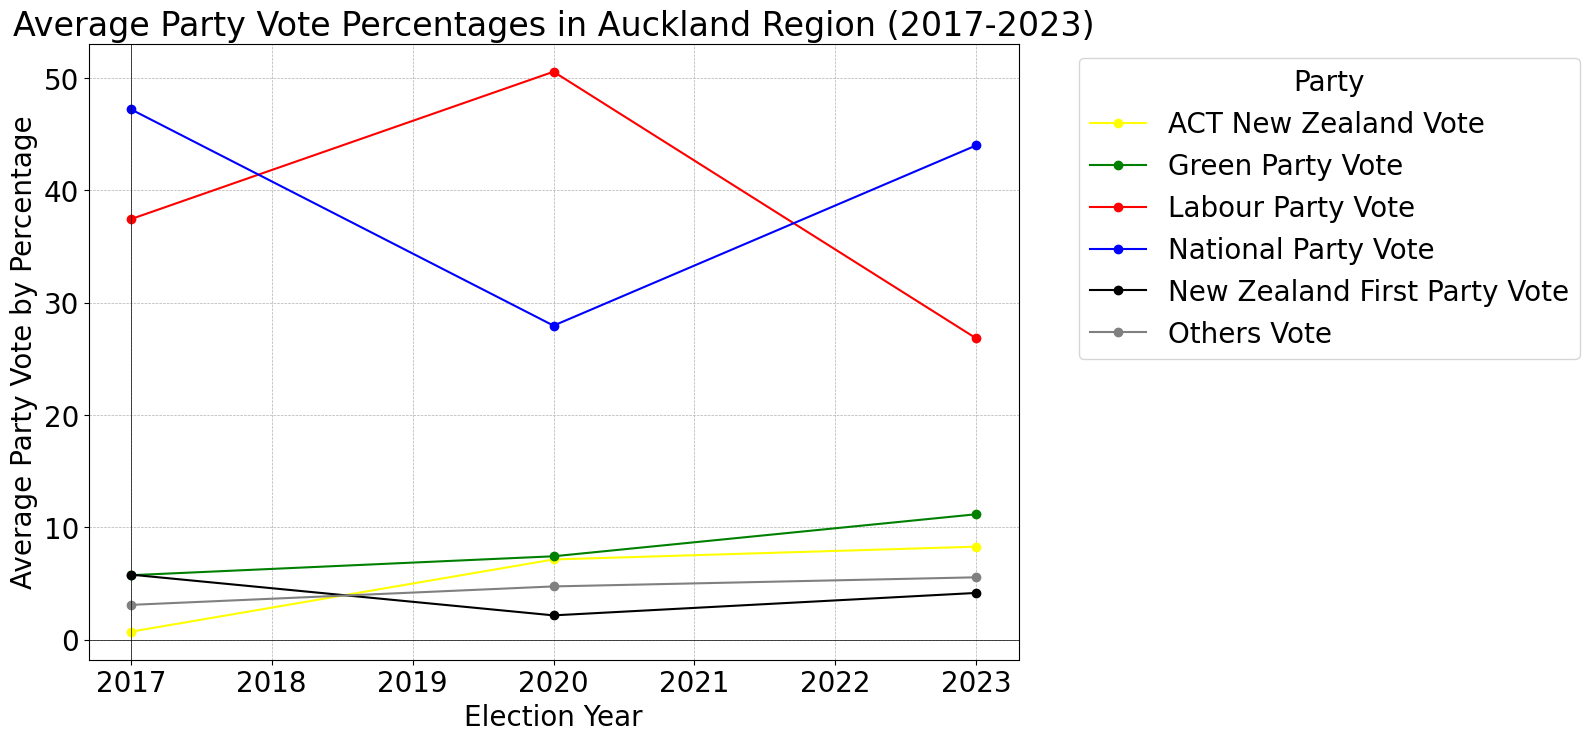

In [84]:
# Plot to see the general trend of past 3 years elections of lists in Auckland Region

# Defining party colors again to ensure they are available for the plot
party_colors = {
    'ACT New Zealand Vote': 'yellow',
    'Green Party Vote': 'green',
    'Labour Party Vote': 'red',
    'National Party Vote': 'blue',
    'New Zealand First Party Vote': 'black',
    'Others Vote': 'grey'
}

# Aggregating data by party across all electorates for each year
party_votes_corrected = Results_Lists.groupby('Election Year').mean(numeric_only=True)

# Setting up the figure and axis
plt.figure(figsize=(12, 8))

# Plotting each party's average vote percentage over the election years with specified colors
for column in party_votes_corrected.columns:
    plt.plot(party_votes_corrected.index, party_votes_corrected[column], marker='o', label=column, color=party_colors.get(column))

# Adding titles and labels
plt.title('Average Party Vote Percentages in Auckland Region (2017-2023)')
plt.xlabel('Election Year')
plt.ylabel('Average Party Vote by Percentage')
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adding gridlines and axis lines
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(party_votes_corrected.index.min(), color='black', linewidth=0.5)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Displaying the plot
plt.show()



Comment: 
This plot illustrates the average party vote percentages in the Auckland region from 2017 to 2023 for six political groups: ACT New Zealand, Green Party, Labour Party, National Party, New Zealand First Party, and Others. 

- The Labour Party (red line) experienced a significant increase in vote percentage from 2017 to 2020, peaking around 50%, before declining sharply by 2023.
- The National Party (blue line) showed a strong performance in 2017, then declined in 2020 but recovered by 2023.
- The Green Party (green line) shows a gradual but steady increase in vote percentage over the years.
- ACT New Zealand (yellow line) and the New Zealand First Party (black line) show minimal fluctuations, maintaining relatively low vote percentages throughout the period.
- The 'Others' category (grey line) also shows minimal change over the years, maintaining a low vote percentage.

This demonstrates the plot effectively visualizes the trends and changes in voter preferences in Auckland, highlighting the dynamic shifts between the major political parties over the specified years.

###### Check the Poll Data

In [85]:
# Read the Election results
Polls = pd.read_csv('election_poll_2017_2024.csv')
Polls.head(10)

Date                     Poll  National Party  Labour Party  \
0  2014-10-12      Roy Morgan Research            43.5          22.5   
1  2014-11-09      Roy Morgan Research            49.5          24.0   
2  2014-12-07      Roy Morgan Research            46.0          27.0   
3  2014-12-21          Herald–DigiPoll            50.4          28.9   
4  2015-01-18      Roy Morgan Research            52.0          26.0   
5  2015-01-28     3 News–Reid Research            49.8          29.1   
6  2015-02-15      Roy Morgan Research            49.0          30.0   
7  2015-02-18  One News–Colmar Brunton            49.0          31.0   
8  2015-03-15      Roy Morgan Research            46.5          31.0   
9  2015-04-15  One News–Colmar Brunton            49.0          31.0   

   Green Party  New Zealand First Party  ACT New Zealand  Other  Election Year  
0         17.5                      7.0              0.5    8.5           2017  
1         14.5                      6.5              0.5    3.5           2017  
2         12.0                      7.0              1.5    5.5           2017  
3          9.5                      5.6              0.4    4.6           2017  
4         11.0                      6.0              1.0    3.5           2017  
5          9.3                      6.9              0.4    4.6           2017  
6         12.0                      6.0              0.0    2.5           2017  
7         10.0                      6.0              0.3    3.3           2017  
8         11.0                      6.0              1.0    3.5           2017  
9          9.0                      7.0              0.5    3.4           2017

In [86]:
Polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     255 non-null    object 
 1   Poll                     255 non-null    object 
 2   National Party           255 non-null    float64
 3   Labour Party             255 non-null    float64
 4   Green Party              255 non-null    float64
 5   New Zealand First Party  255 non-null    float64
 6   ACT New Zealand          255 non-null    float64
 7   Other                    255 non-null    float64
 8   Election Year            255 non-null    int64  
dtypes: float64(6), int64(1), object(2)
memory usage: 18.1+ KB


In [87]:
Polls.isnull().sum()

Date                       0
Poll                       0
National Party             0
Labour Party               0
Green Party                0
New Zealand First Party    0
ACT New Zealand            0
Other                      0
Election Year              0
dtype: int64

In [88]:
Polls.describe()

National Party  Labour Party  Green Party  New Zealand First Party  \
count      255.000000    255.000000   255.000000               255.000000   
mean        38.366157     34.739765    10.063647                 5.013804   
std          7.357858      7.846211     2.797151                 2.715364   
min         21.300000     21.000000     3.900000                 0.000000   
25%         34.000000     28.750000     8.000000                 2.650000   
50%         38.000000     33.000000    10.000000                 4.500000   
75%         45.000000     40.500000    12.000000                 7.000000   
max         54.000000     60.900000    17.500000                13.000000   

       ACT New Zealand       Other  Election Year  
count       255.000000  255.000000     255.000000  
mean          6.490667    3.630510    2020.756863  
std           5.396860    1.885813       2.735682  
min           0.000000    0.000000    2017.000000  
25%           0.650000    2.200000    2017.000000  
50%           7.800000    3.500000    2023.000000  
75%          11.000000    4.650000    2023.000000  
max          18.500000   10.000000    2024.000000

##### Dataset Overview
- Total entries: 255
- Columns: 9 (Date, Poll, National Party, Labour Party, Green Party, New Zealand First Party, ACT New Zealand, Other, Election Year)
- No missing values in the dataset.

##### Descriptive Statistics
###### National Party
- **Mean:** 38.37%
- **Standard Deviation:** 7.36%
- **Min:** 21.3%
- **Max:** 54.0%
- **Median (50%):** 38.0%
- **Interquartile Range (IQR):** 34.0% (25%) to 45.0% (75%)

######  Labour Party
- **Mean:** 34.74%
- **Standard Deviation:** 7.85%
- **Min:** 21.0%
- **Max:** 60.9%
- **Median (50%):** 33.0%
- **Interquartile Range (IQR):** 28.75% (25%) to 40.5% (75%)

######  Green Party
- **Mean:** 10.06%
- **Standard Deviation:** 2.80%
- **Min:** 3.9%
- **Max:** 17.5%
- **Median (50%):** 10.0%
- **Interquartile Range (IQR):** 8.0% (25%) to 12.0% (75%)

###### New Zealand First Party
- **Mean:** 5.01%
- **Standard Deviation:** 2.72%
- **Min:** 0.0%
- **Max:** 13.0%
- **Median (50%):** 4.5%
- **Interquartile Range (IQR):** 2.65% (25%) to 7.0% (75%)

######  ACT New Zealand
- **Mean:** 6.49%
- **Standard Deviation:** 5.40%
- **Min:** 0.0%
- **Max:** 18.5%
- **Median (50%):** 7.8%
- **Interquartile Range (IQR):** 0.65% (25%) to 11.0% (75%)

######  Other
- **Mean:** 3.63%
- **Standard Deviation:** 1.89%
- **Min:** 0.0%
- **Max:** 10.0%
- **Median (50%):** 3.5%
- **Interquartile Range (IQR):** 2.2% (25%) to 4.65% (75%)

###### Election Year
- **Mean:** 2020.76
- **Standard Deviation:** 2.74
- **Min:** 2017
- **Max:** 2024
- **Median (50%):** 2023
- **Interquartile Range (IQR):** 2017 (25%) to 2023 (75%)

###### Observations
- The National Party and Labour Party are the major players with the highest mean percentages.
- The Labour Party has a notable peak at 60.9%, indicating a significant spike in at least one poll.
- ACT New Zealand shows the largest standard deviation, indicating the highest variability in polling percentages over the years.
- The Green Party and New Zealand First Party have relatively low mean percentages, with smaller ranges and lower variability.
- The 'Other' category consistently remains low, reflecting minimal support or dispersed votes among minor parties.
  
These statistics provide a comprehensive view of the polling trends and the variability in party support over the years.

### Working Poll data

Given the observed standard deviations (e.g., Labour Party's standard deviation of 7.85% and ACT New Zealand's 5.40%), the data exhibits considerable variability. The maximum values, particularly for the Labour Party (60.9%), indicate potential outliers or skewed distributions.

Therefore, using the median in the poll data by election year before merging it with the election results and demographic data is a strategic step. It smooths out short-term fluctuations and noise, captures overall trends, aligns with final election results and demographic data, enhances model stability and accuracy, and simplifies data integration. Considering the variability and potential outliers in our poll data, the median is likely a more robust measure. It will give us a central value that is not skewed by extreme poll results, providing a more stable and representative metric for merging with election results. Thus, using the median poll percentages for each party by Election Year ensures more reliable input data for predictive modeling.

In [89]:
# Dropping the 'Date' and 'Poll' columns as they are unnecessary for the averaging process
if 'Date' in Polls.columns:
    Polls = Polls.drop(columns=['Date'])

if 'Poll' in Polls.columns:
    Polls = Polls.drop(columns=['Poll'])

# Calculating the median poll percentages for each party by Election Year
median_polls = Polls.groupby('Election Year').median().reset_index()

median_polls.index = range(1, len(median_polls) + 1)


median_polls


Election Year  National Party  Labour Party  Green Party  \
1           2017           46.85          29.5        11.50   
2           2020           40.90          44.0         6.00   
3           2023           35.00          34.4         9.90   
4           2024           37.45          26.8        12.75   

   New Zealand First Party  ACT New Zealand  Other  
1                      8.0             0.50    2.5  
2                      3.3             1.05    2.1  
3                      3.0            11.00    4.3  
4                      6.0             8.00    5.8

In [90]:
# Save to CSV if needed
median_polls.to_csv('median_polls.csv', index=False, encoding='utf-8')

#### Working on Demographic Data

As the process of data collection is not total population but it just as valuable as it can be assumed that it is still proportional to the total population. Therefore, we going to group the demographic columns by categories and calculate the porportion base on total population on respondant of each electorate. 

In [91]:
# Function to read the dataset and calculate proportions
def calculate_proportions(file_path):
    df = pd.read_csv(file_path)
    
    # List of demographic columns grouped by categories
    age_columns = ['15-29 years', '30-64 years', '65 years and over']
    qualification_columns = [
        'No qualification', 'Level 1 certificate', 'Level 2 certificate', 
        'Level 3 certificate', 'Level 4 certificate', 'Level 5 diploma', 
        'Level 6 diploma', 'Bachelor degree and level 7 qualification', 
        'Post-graduate and honours degrees', 'Masters degree', 'Doctorate degree', 
        'Overseas secondary school qualification'
    ]
    religion_columns = [
        'Total people - religious affiliation', '  Adventist', '  Anglican', 
        '  Baptist', '  Catholicism', '  Evangelical, Born Again and Fundamentalist', 
        '  Jehovah\'s Witnesses', '  Latter-day Saints', '  Methodist', '  Pentecostal', 
        '  Presbyterian, Congregational and Reformed', '  Maori Religions, Beliefs and Philosophies', 
        '  Buddhism', '  Hinduism', '  Islam', '  Judaism', '  Spiritualism and New Age religions', 
        '  Sikhism', '  Jedi', '  Other religions'
    ]
    ethnicity_columns = [
        'European', 'Maori', 'Pacific Peoples', 'Asian', 'Middle Eastern/Latin American/African', 'Other ethnicity'
    ]
    smoking_columns = ['Regular smoker', 'Ex-smoker', 'Never smoked regularly']
    children_columns = [
        'No dependent children', 'One dependent child', 'Two dependent children', 
        'Three dependent children', 'Four or more dependent children'
    ]

    # Verify that all columns exist in the dataframe
    all_columns = age_columns + qualification_columns + religion_columns + ethnicity_columns + smoking_columns + children_columns
    missing_columns = [col for col in all_columns if col not in df.columns]

    if missing_columns:
        print(f"The following columns are missing in the dataframe: {missing_columns}")
        return None
    else:
        # Calculate the percentages based on the 'Total number of respondents'
        proportions_df = pd.DataFrame()
        proportions_df['Electorate'] = df['Electorate']
        
        for col in all_columns:
            proportions_df[col + ' (%)'] = (df[col] / df['Total number of respondents']) * 100

        return proportions_df

# Calculate proportions for 2017, 2020, 2023, and 2024
proportions2017_df = calculate_proportions('ProjectedDatasets/df_2017_sums.csv')
proportions2020_df = calculate_proportions('ProjectedDatasets/df_2020_sums.csv')
proportions2023_df = calculate_proportions('ProjectedDatasets/df_2023_sums.csv')
proportions2024_df = calculate_proportions('ProjectedDatasets/df_2024_sums.csv')

# Display the first few rows of the dataframes with only proportions
print("Proportions for 2020:")
print(proportions2020_df.head(25))

print("\nProportions for 2023:")
print(proportions2023_df.head(25))

print("\nProportions for 2024:")
print(proportions2024_df.head(25))



Proportions for 2020:
              Electorate  15-29 years (%)  30-64 years (%)  \
0       Auckland Central        20.713659        47.046281   
1                 Botany        27.723768        42.926584   
2        East Coast Bays        20.578741        45.780493   
3                  Epsom        21.575422        47.562948   
4   Kaipara ki Mahurangi        21.277061        46.173190   
5                Kelston        21.473566        46.524184   
6               Manurewa        21.813837        45.903505   
7           Maungakiekie        32.577612        45.794152   
8              Mt Albert        20.232435        47.945061   
9             Mt Roskill        22.764305        47.082228   
10               Māngere        25.905822        46.715972   
11              New Lynn        20.730050        48.262248   
12           North Shore        20.413007        46.309043   
13             Northcote        22.455247        46.797122   
14             Pakuranga        35.478919       

In [92]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [93]:
import pandas as pd
import unidecode

# Assuming your dataframes are already defined as proportions2017_df, proportions2020_df, proportions2023_df, proportions2024_df

# Add Year Column
proportions2017_df['Year'] = 2017
proportions2020_df['Year'] = 2020
proportions2023_df['Year'] = 2023
proportions2024_df['Year'] = 2024

# Normalize special characters to ASCII equivalents in the 'Electorate' column
proportions2017_df['Electorate'] = proportions2017_df['Electorate'].apply(lambda x: unidecode.unidecode(x))
proportions2020_df['Electorate'] = proportions2020_df['Electorate'].apply(lambda x: unidecode.unidecode(x))
proportions2023_df['Electorate'] = proportions2023_df['Electorate'].apply(lambda x: unidecode.unidecode(x))
proportions2024_df['Electorate'] = proportions2024_df['Electorate'].apply(lambda x: unidecode.unidecode(x))


In [94]:
proportions2017_df['Electorate'] = proportions2017_df['Electorate'].str.strip().str.lower()
proportions2017_df = proportions2017_df.sort_values(by='Electorate')
proportions2017_df.index = range(1, len(proportions2017_df) + 1)
proportions2017_df

Electorate  15-29 years (%)  30-64 years (%)  65 years and over (%)  \
1   auckland central        20.068003        47.375505              12.346816   
2             botany        29.006750        41.996143               9.488910   
3    east coast bays        19.960303        45.887607              13.658355   
4              epsom        21.102761        47.291157              10.852849   
5        helensville        21.504266        46.228110              11.944320   
6              hunua        19.341083        46.578169              12.772543   
7            kelston        20.309811        46.840423              13.363659   
8            mangere        27.297668        45.717116               8.786770   
9       manukau east        20.037132        46.343902              10.811197   
10          manurewa        19.356301        46.112874              17.860381   
11      maungakiekie        31.231907        46.960437               9.917444   
12         mt albert        19.801075        48.736710              11.935521   
13        mt roskill        25.524079        48.347498              11.520302   
14          new lynn        21.365832        46.717172              11.297760   
15       north shore        20.651894        48.299407              12.316413   
16         northcote        20.413223        47.557392              11.726354   
17         pakuranga        37.066899        41.316191               8.324254   
18          papakura        18.802145        46.677592              16.544994   
19            rodney        21.984908        47.507075              11.966042   
20            tamaki        29.589280        46.268657               9.009696   
21          te atatu        19.578890        46.477076              13.380731   
22     upper harbour        21.377406        46.336368              11.319206   

    No qualification (%)  Level 1 certificate (%)  Level 2 certificate (%)  \
1               9.725862                 7.388255                 7.246582   
2              11.542912                 6.817743                 6.075217   
3              11.499814                 8.162759                 7.244759   
4              11.377141                 7.742048                 6.946872   
5              10.736417                 7.395599                 6.820835   
6              13.095811                 8.370589                 7.242589   
7              10.167199                 7.081387                 6.860093   
8               9.030636                 6.012803                 6.005182   
9              12.739217                 9.311625                 7.969152   
10             11.491387                 7.842248                 7.060290   
11              6.518709                 5.135628                 5.135628   
12              8.883046                 7.854121                 7.293929   
13              8.791313                 6.373938                 6.477809   
14             11.561265                 7.795345                 7.202459   
15              9.314610                 7.510951                 7.652667   
16              8.934803                 7.162534                 7.052342   
17              7.310961                 4.641534                 5.022881   
18             10.764303                 8.216627                 7.255662   
19              8.893680                 6.838701                 6.818488   
20              6.373243                 5.305589                 5.817627   
21              9.178744                 7.802388                 7.501595   
22             11.498284                 7.663035                 7.058648   

    Level 3 certificate (%)  Level 4 certificate (%)  Level 5 diploma (%)  \
1                  7.395339                 6.006942             3.350570   
2                 10.067502                 5.159113             2.719383   
3                  7.294380                 6.091056             3.461109   
4                  6.955610                

In [95]:
proportions2020_df['Electorate'] = proportions2020_df['Electorate'].str.strip().str.lower()
proportions2020_df = proportions2020_df.sort_values(by='Electorate')
proportions2020_df.index = range(1, len(proportions2020_df) + 1)
proportions2020_df

Electorate  15-29 years (%)  30-64 years (%)  \
1       auckland central        20.713659        47.046281   
2                 botany        27.723768        42.926584   
3        east coast bays        20.578741        45.780493   
4                  epsom        21.575422        47.562948   
5   kaipara ki mahurangi        21.277061        46.173190   
6                kelston        21.473566        46.524184   
7                mangere        25.905822        46.715972   
8               manurewa        21.813837        45.903505   
9           maungakiekie        32.577612        45.794152   
10             mt albert        20.232435        47.945061   
11            mt roskill        22.764305        47.082228   
12              new lynn        20.730050        48.262248   
13           north shore        20.413007        46.309043   
14             northcote        22.455247        46.797122   
15             pakuranga        35.478919        42.805976   
16       panmure-otahuhu        25.335674        47.380430   
17              papakura        18.472236        46.024388   
18          port waikato        18.962824        44.913048   
19              takanini        19.920920        46.010065   
20                tamaki        28.346783        46.989448   
21              te atatu        20.055875        46.207247   
22         upper harbour        21.563115        46.506888   
23          whangaparaoa        22.315709        46.889589   

    65 years and over (%)  No qualification (%)  Level 1 certificate (%)  \
1               12.680296              8.190142                 6.685062   
2                9.763661             10.006705                 5.908481   
3               14.722158             10.883099                 6.605949   
4               10.880111             10.117810                 6.822207   
5               12.934616              9.506888                 6.565712   
6               13.532058              9.100112                 6.321710   
7                9.288913              7.877595                 5.217804   
8               15.350478              9.751934                 7.009558   
9                9.583924              5.680794                 4.160763   
10              13.438986              8.483888                 7.004754   
11              13.196286              8.980674                 5.977643   
12              11.766229              8.756715                 5.947835   
13              14.835034              8.889153                 6.776644   
14              11.925237              8.248508                 6.160056   
15               8.851822              6.692591                 3.970528   
16              10.223782              9.021501                 6.143045   
17              17.736572             11.679936                 8.656656   
18              15.911694             13.162553                 8.226596   
19              16.182602             10.107836                 6.534867   
20              10.542106              6.093524                 4.738258   
21              14.028107              8.889265                 6.891297   
22              11.751476             10.163059                 6.501265   
23              12.783628              9.081533                 6.323960   

    Level 2 certificate (%)  Level 3 certificate (%)  Level 4 certificate (%)  \
1                  6.603537                 8.378277                 5.324219   
2                  5.556487                 9.897754                 4.894402   
3                  6.640535                 8.681116                 5.314734   
4                  6.560407                 8.400708                 5.882806   
5                  5.904220                 8.555653                 5.133392   
6                  5.973003                 8.312711                 4.758155   
7                  5.502782                 8.393269                 4.417153   
8                  6.725080                 8.887119

In [96]:
proportions2023_df['Electorate'] = proportions2023_df['Electorate'].str.strip().str.lower()
proportions2023_df = proportions2023_df.sort_values(by='Electorate')
proportions2023_df.index = range(1, len(proportions2023_df) + 1)
proportions2023_df

Electorate  15-29 years (%)  30-64 years (%)  \
1       auckland central        20.713659        47.046281   
2                 botany        27.723768        42.926584   
3        east coast bays        20.578741        45.780493   
4                  epsom        21.575422        47.562948   
5   kaipara ki mahurangi        21.277061        46.173190   
6                kelston        21.473566        46.524184   
7                mangere        25.905822        46.715972   
8               manurewa        21.813837        45.903505   
9           maungakiekie        32.577612        45.794152   
10             mt albert        20.232435        47.945061   
11            mt roskill        22.764305        47.082228   
12              new lynn        20.730050        48.262248   
13           north shore        20.413007        46.309043   
14             northcote        22.455247        46.797122   
15             pakuranga        35.478919        42.805976   
16       panmure-otahuhu        25.335674        47.380430   
17              papakura        18.472236        46.024388   
18          port waikato        18.962824        44.913048   
19              takanini        19.920920        46.010065   
20                tamaki        28.346783        46.989448   
21              te atatu        20.055875        46.207247   
22         upper harbour        21.563115        46.506888   
23          whangaparaoa        22.315709        46.889589   

    65 years and over (%)  No qualification (%)  Level 1 certificate (%)  \
1               12.680296              8.190142                 6.685062   
2                9.763661             10.006705                 5.908481   
3               14.722158             10.883099                 6.605949   
4               10.880111             10.117810                 6.822207   
5               12.934616              9.506888                 6.565712   
6               13.532058              9.100112                 6.321710   
7                9.288913              7.877595                 5.217804   
8               15.350478              9.751934                 7.009558   
9                9.583924              5.680794                 4.160763   
10              13.438986              8.483888                 7.004754   
11              13.196286              8.980674                 5.977643   
12              11.766229              8.756715                 5.947835   
13              14.835034              8.889153                 6.776644   
14              11.925237              8.248508                 6.160056   
15               8.851822              6.692591                 3.970528   
16              10.223782              9.021501                 6.143045   
17              17.736572             11.679936                 8.656656   
18              15.911694             13.162553                 8.226596   
19              16.182602             10.107836                 6.534867   
20              10.542106              6.093524                 4.738258   
21              14.028107              8.889265                 6.891297   
22              11.751476             10.163059                 6.501265   
23              12.783628              9.081533                 6.323960   

    Level 2 certificate (%)  Level 3 certificate (%)  Level 4 certificate (%)  \
1                  6.603537                 8.378277                 5.324219   
2                  5.556487                 9.897754                 4.894402   
3                  6.640535                 8.681116                 5.314734   
4                  6.560407                 8.400708                 5.882806   
5                  5.904220                 8.555653                 5.133392   
6                  5.973003                 8.312711                 4.758155   
7                  5.502782                 8.393269                 4.417153   
8                  6.725080                 8.887119

In [97]:
proportions2024_df['Electorate'] = proportions2024_df['Electorate'].str.strip().str.lower()
proportions2024_df = proportions2024_df.sort_values(by='Electorate')
proportions2024_df.index = range(1, len(proportions2024_df) + 1)
proportions2024_df

Electorate  15-29 years (%)  30-64 years (%)  \
1       auckland central        20.713659        47.046281   
2                 botany        27.723768        42.926584   
3        east coast bays        20.578741        45.780493   
4                  epsom        21.575422        47.562948   
5   kaipara ki mahurangi        21.277061        46.173190   
6                kelston        21.473566        46.524184   
7                mangere        25.905822        46.715972   
8               manurewa        21.813837        45.903505   
9           maungakiekie        32.577612        45.794152   
10             mt albert        20.232435        47.945061   
11            mt roskill        22.764305        47.082228   
12              new lynn        20.730050        48.262248   
13           north shore        20.413007        46.309043   
14             northcote        22.455247        46.797122   
15             pakuranga        35.478919        42.805976   
16       panmure-otahuhu        25.335674        47.380430   
17              papakura        18.472236        46.024388   
18          port waikato        18.962824        44.913048   
19              takanini        19.920920        46.010065   
20                tamaki        28.346783        46.989448   
21              te atatu        20.055875        46.207247   
22         upper harbour        21.563115        46.506888   
23          whangaparaoa        22.315709        46.889589   

    65 years and over (%)  No qualification (%)  Level 1 certificate (%)  \
1               12.680296              8.190142                 6.685062   
2                9.763661             10.006705                 5.908481   
3               14.722158             10.883099                 6.605949   
4               10.880111             10.117810                 6.822207   
5               12.934616              9.506888                 6.565712   
6               13.532058              9.100112                 6.321710   
7                9.288913              7.877595                 5.217804   
8               15.350478              9.751934                 7.009558   
9                9.583924              5.680794                 4.160763   
10              13.438986              8.483888                 7.004754   
11              13.196286              8.980674                 5.977643   
12              11.766229              8.756715                 5.947835   
13              14.835034              8.889153                 6.776644   
14              11.925237              8.248508                 6.160056   
15               8.851822              6.692591                 3.970528   
16              10.223782              9.021501                 6.143045   
17              17.736572             11.679936                 8.656656   
18              15.911694             13.162553                 8.226596   
19              16.182602             10.107836                 6.534867   
20              10.542106              6.093524                 4.738258   
21              14.028107              8.889265                 6.891297   
22              11.751476             10.163059                 6.501265   
23              12.783628              9.081533                 6.323960   

    Level 2 certificate (%)  Level 3 certificate (%)  Level 4 certificate (%)  \
1                  6.603537                 8.378277                 5.324219   
2                  5.556487                 9.897754                 4.894402   
3                  6.640535                 8.681116                 5.314734   
4                  6.560407                 8.400708                 5.882806   
5                  5.904220                 8.555653                 5.133392   
6                  5.973003                 8.312711                 4.758155   
7                  5.502782                 8.393269                 4.417153   
8                  6.725080                 8.887119

In [98]:
# Combine 4 years of demographic info
combined_demo = pd.concat([proportions2017_df, proportions2020_df, proportions2023_df, proportions2024_df]).reset_index(drop=True)

# Correct the index range setting
combined_demo.index = range(1, len(combined_demo) + 1)

combined_demo

# Save to CSV if needed
# combined_demo.to_csv('combined_all_demo.csv', index=False, encoding='utf-8')

Electorate  15-29 years (%)  30-64 years (%)  65 years and over (%)  \
1   auckland central        20.068003        47.375505              12.346816   
2             botany        29.006750        41.996143               9.488910   
3    east coast bays        19.960303        45.887607              13.658355   
4              epsom        21.102761        47.291157              10.852849   
5        helensville        21.504266        46.228110              11.944320   
..               ...              ...              ...                    ...   
87          takanini        19.920920        46.010065              16.182602   
88            tamaki        28.346783        46.989448              10.542106   
89          te atatu        20.055875        46.207247              14.028107   
90     upper harbour        21.563115        46.506888              11.751476   
91      whangaparaoa        22.315709        46.889589              12.783628   

    No qualification (%)  Level 1 certificate (%)  Level 2 certificate (%)  \
1               9.725862                 7.388255                 7.246582   
2              11.542912                 6.817743                 6.075217   
3              11.499814                 8.162759                 7.244759   
4              11.377141                 7.742048                 6.946872   
5              10.736417                 7.395599                 6.820835   
..                   ...                      ...                      ...   
87             10.107836                 6.534867                 6.340762   
88              6.093524                 4.738258                 5.286571   
89              8.889265                 6.891297                 6.637318   
90             10.163059                 6.501265                 6.311498   
91              9.081533                 6.323960                 5.971121   

    Level 3 certificate (%)  Level 4 certificate (%)  Level 5 diploma (%)  \
1                  7.395339                 6.006942             3.350570   
2                 10.067502                 5.159113             2.719383   
3                  7.294380                 6.091056             3.461109   
4                  6.955610                 6.081790             3.364208   
5                  7.853615                 5.361473             3.372250   
..                      ...                      ...                  ...   
87                 7.785766                 5.161754             3.378864   
88                 8.131595                 3.993379             3.476102   
89                 8.355909                 5.545208             3.310193   
90                 8.441102                 5.229126             3.633680   
91                 8.592987                 5.129736             3.408968   

    ...  Other ethnicity (%)  Regular smoker (%)  Ex-smoker (%)  \
1   ...             1.303393            7.515761      16.143657   
2   ...             0.964320           10.115718      11.764706   
3   ...             1.327379            8.646570      14.836869   
4   ...             1.275778            9.472213      15.178259   
5   ...             1.212393            8.536147      13.735968   
..  ...                  ...                 ...            ...   
87  ...             0.941769            7.325665      16.534867   
88  ...             1.055245            7.624664      15.156218   
89  ...             1.125974            6.874365      16.280054   
90  ...             1.342423            8.567613      14.520663   
91  ...             1.139941            7.501900      14.640104   

    Never smoked regularly (%)  No dependent children (%)  \
1                    47.998867                   2.684706   
2                    46.316297                   2.227580   
3                    48.654013                   2.865649   
4                    45.954212                   2.586508   
5                    49.362371                   2.860350   
..  

In [99]:
# Save to CSV if needed
combined_demo.to_csv('combined_all_demo.csv', index=False, encoding='utf-8')

## 1.5 Merge 3 datasets

First, we'll manually add the 'Electorate' column for the polling data for each year, ensuring each party's median value is assigned to all corresponding electorates.

In [100]:
# Merge the datasets on the 'Year' and 'Election Year' columns
merged_demo_polls = pd.merge(combined_demo, median_polls, left_on='Year', right_on='Election Year', how='left')

# Drop the redundant 'Year' column
merged_demo_polls = merged_demo_polls.drop(columns=['Year'])

# Rename the poll columns to include 'Poll' in their names
merged_demo_polls = merged_demo_polls.rename(columns={
    'National Party': 'National Party Poll',
    'Labour Party': 'Labour Party Poll',
    'Green Party': 'Green Party Poll',
    'New Zealand First Party': 'New Zealand First Party Poll',
    'ACT New Zealand': 'ACT New Zealand Poll',
    'Other': 'Other Poll'
})

# Rearrange 'Election Year' to be the first column
cols = ['Election Year'] + [col for col in merged_demo_polls if col != 'Election Year']
merged_demo_polls = merged_demo_polls[cols]

# Correct the index range setting
merged_demo_polls.index = range(1, len(merged_demo_polls) + 1)
    
merged_demo_polls


Election Year        Electorate  15-29 years (%)  30-64 years (%)  \
1            2017  auckland central        20.068003        47.375505   
2            2017            botany        29.006750        41.996143   
3            2017   east coast bays        19.960303        45.887607   
4            2017             epsom        21.102761        47.291157   
5            2017       helensville        21.504266        46.228110   
..            ...               ...              ...              ...   
87           2024          takanini        19.920920        46.010065   
88           2024            tamaki        28.346783        46.989448   
89           2024          te atatu        20.055875        46.207247   
90           2024     upper harbour        21.563115        46.506888   
91           2024      whangaparaoa        22.315709        46.889589   

    65 years and over (%)  No qualification (%)  Level 1 certificate (%)  \
1               12.346816              9.725862                 7.388255   
2                9.488910             11.542912                 6.817743   
3               13.658355             11.499814                 8.162759   
4               10.852849             11.377141                 7.742048   
5               11.944320             10.736417                 7.395599   
..                    ...                   ...                      ...   
87              16.182602             10.107836                 6.534867   
88              10.542106              6.093524                 4.738258   
89              14.028107              8.889265                 6.891297   
90              11.751476             10.163059                 6.501265   
91              12.783628              9.081533                 6.323960   

    Level 2 certificate (%)  Level 3 certificate (%)  Level 4 certificate (%)  \
1                  7.246582                 7.395339                 6.006942   
2                  6.075217                10.067502                 5.159113   
3                  7.244759                 7.294380                 6.091056   
4                  6.946872                 6.955610                 6.081790   
5                  6.820835                 7.853615                 5.361473   
..                      ...                      ...                      ...   
87                 6.340762                 7.785766                 5.161754   
88                 5.286571                 8.131595                 3.993379   
89                 6.637318                 8.355909                 5.545208   
90                 6.311498                 8.441102                 5.229126   
91                 5.971121                 8.592987                 5.129736   

    ...  One dependent child (%)  Two dependent children (%)  \
1   ...                 3.860594                    4.476872   
2   ...                 3.616201                    3.288332   
3   ...                 4.056569                    4.304677   
4   ...                 4.141908                    4.028312   
5   ...                 4.063763                    4.211944   
..  ...                      ...                         ...   
87  ...                 3.788641                    3.853343   
88  ...                 3.258845                    3.351955   
89  ...                 3.953607                    4.343041   
90  ...                 4.139724                    4.062412   
91  ...                 3.848659                    4.011508   

    Three dependent children (%)  Four or more dependent children (%)  \
1                       1.494652                             0.425019   
2                       1.022179                             0.530376   
3                       1.377000                             0.372162   
4                       1.170919                             0.480601   
5                       1.140548                             0.475977   
..                           ...  

In [101]:
# Save the merged and updated dataframe to a CSV file with the specified parameters
output_path = 'merged_demo_polls.csv'
merged_demo_polls.to_csv(output_path, index=False, encoding='utf-8')

output_path


'merged_demo_polls.csv'

In [102]:
merged_demo_polls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 1 to 91
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Election Year                                     91 non-null     int64  
 1   Electorate                                        91 non-null     object 
 2   15-29 years (%)                                   91 non-null     float64
 3   30-64 years (%)                                   91 non-null     float64
 4   65 years and over (%)                             91 non-null     float64
 5   No qualification (%)                              91 non-null     float64
 6   Level 1 certificate (%)                           91 non-null     float64
 7   Level 2 certificate (%)                           91 non-null     float64
 8   Level 3 certificate (%)                           91 non-null     float64
 9   Level 4 certificate (%)

In [103]:
merged_demo_polls.describe()

Election Year  15-29 years (%)  30-64 years (%)  65 years and over (%)  \
count      91.000000        91.000000        91.000000              91.000000   
mean     2021.043956        23.048696        46.321130              12.493119   
std         2.736226         4.374765         1.410059               2.368224   
min      2017.000000        18.472236        41.316191               8.324254   
25%      2020.000000        20.271123        46.010065              10.676652   
50%      2023.000000        21.473566        46.506888              12.346816   
75%      2023.500000        25.335674        47.046281              13.843231   
max      2024.000000        37.066899        48.736710              17.860381   

       No qualification (%)  Level 1 certificate (%)  Level 2 certificate (%)  \
count             91.000000                91.000000                91.000000   
mean               9.313481                 6.526125                 6.359667   
std                1.723666                 1.138749                 0.803202   
min                5.680794                 3.970528                 4.369628   
25%                8.483888                 5.977643                 5.971121   
50%                9.081533                 6.565712                 6.536567   
75%               10.140434                 7.009558                 6.840464   
max               13.162553                 9.311625                 7.969152   

       Level 3 certificate (%)  Level 4 certificate (%)  Level 5 diploma (%)  \
count                91.000000                91.000000            91.000000   
mean                  8.231273                 5.262367             3.429356   
std                   0.762839                 0.754031             0.177196   
min                   6.516319                 3.765862             2.719383   
25%                   7.800060                 4.894402             3.317485   
50%                   8.355909                 5.283019             3.408968   
75%                   8.537848                 5.683630             3.503800   
max                  10.568751                 7.026564             4.052729   

       ...  One dependent child (%)  Two dependent children (%)  \
count  ...                91.000000                   91.000000   
mean   ...                 3.701287                    3.811087   
std    ...                 0.379748                    0.542608   
min    ...                 2.851935                    2.337300   
25%    ...                 3.330056                    3.587625   
50%    ...                 3.831796                    3.977404   
75%    ...                 4.019157                    4.208115   
max    ...                 4.195726                    4.666849   

       Three dependent children (%)  Four or more dependent children (%)  \
count                     91.000000                            91.000000   
mean                       1.141776                             0.324918   
std                        0.201311                             0.090940   
min                        0.579673                             0.115935   
25%                        1.070716                             0.278299   
50%                        1.169854                             0.330173   
75%                        1.268158                             0.372871   
max                        1.494652                             0.530376   

       National Party Poll  Labour Party Poll  Green Party Poll  \
count            91.000000          91.000000         91.000000   
mean             39.975275          33.720879         10.021429   
std               4.441505           6.611783          2.563907   
min              35.000000          26.800000          6.000000   
25%              36.225000          28.150000          7.950000   
50%              37.450000          34.400000          9.900000   
75%              40.900000          39.200000         12.125000   
m

In [104]:
merged_demo_polls.isnull().sum()

Election Year                                       0
Electorate                                          0
15-29 years (%)                                     0
30-64 years (%)                                     0
65 years and over (%)                               0
No qualification (%)                                0
Level 1 certificate (%)                             0
Level 2 certificate (%)                             0
Level 3 certificate (%)                             0
Level 4 certificate (%)                             0
Level 5 diploma (%)                                 0
Level 6 diploma (%)                                 0
Bachelor degree and level 7 qualification (%)       0
Post-graduate and honours degrees (%)               0
Masters degree (%)                                  0
Doctorate degree (%)                                0
Overseas secondary school qualification (%)         0
Total people - religious affiliation (%)            0
  Adventist (%)             

Comment: 

The `merged_demo_polls` DataFrame contains 91 entries and 57 columns, encompassing a wide range of demographic and polling data. Here's a detailed breakdown:

1. **Basic Information:**
   - *Rows (entries):* 91
   - *Columns:* 57


2. **Data Types:**
   - *Integer Columns:* 1 (Election Year)
   - *Object Columns:* 1 (Electorate)
   - *Float Columns:* 55 (all other columns representing percentages and poll results)


3. **Non-null Count:**
   - All columns have 91 non-null values, indicating there are no missing values in the dataset.


4. **Column Categories:**
   - *Election Year:* Year of the election (2017, 2020, 2023, 2024)
   - *Electorate:* Names of the electorates
   - *Age Demographics:* Percentages of different age groups (15-29 years, 30-64 years, 65 years and over)
   - *Educational Qualifications:* Percentages of the population with different levels of educational attainment (No qualification, Level 1-6 certificates, Bachelor’s degree, Post-graduate, Master’s, Doctorate, Overseas secondary school qualification)
   - *Religious Affiliations:* Percentages of various religious groups (Adventist, Anglican, Baptist, Catholicism, Evangelical, Jehovah's Witnesses, Latter-day Saints, Methodist, Pentecostal, Presbyterian, Maori Religions, Buddhism, Hinduism, Islam, Judaism, Spiritualism, Sikhism, Jedi, Other religions)
   - *Ethnicities:* Percentages of different ethnic groups (European, Maori, Pacific Peoples, Asian, Middle Eastern/Latin American/African, Other ethnicity)
   - *Smoking Status:* Percentages of regular smokers, ex-smokers, and those who have never smoked regularly
   - *Dependent Children:* Percentages of households with no dependent children, one, two, three, and four or more dependent children
   - *Poll Results:* Poll percentages for various political parties (National Party, Labour Party, Green Party, New Zealand First Party, ACT New Zealand, Other)


5. **Summary Statistics:**
   - *Election Year:* Ranges from 2017 to 2024
   - *Age Demographics:* The percentage of 15-29 years olds ranges from 18.47% to 37.07%, 30-64 years olds from 41.32% to 48.74%, and 65 years and over from 8.32% to 17.86%
   - *Educational Qualifications:* 
     - No qualification: 5.68% to 13.16%
     - Level 1 certificate: 3.97% to 9.31%
     - Level 2 certificate: 4.37% to 7.97%
     - Level 3 certificate: 6.52% to 10.57%
     - Level 4 certificate: 3.77% to 7.03%
     - Level 5 diploma: 2.72% to 4.05%
     - Bachelor’s degree: 6.52% to 10.57%
     - Post-graduate degrees: 0.58% to 1.49%
   - *Religious Affiliations:* Various percentages reflecting diverse religious affiliations
   - *Ethnicities:* European ranges from 3.33% to 4.67%, Maori from 3.33% to 4.67%, and other ethnicities are similarly distributed
   - *Smoking Status:* Regular smoker (min: 0.12%, max: 0.53%), Ex-smoker (min: 2.85%, max: 4.20%), Never smoked regularly (min: 35%, max: 46.85%)
   - *Dependent Children:* Households with no dependent children (min: 0.12%, max: 0.53%), one (min: 2.85%, max: 4.20%), two (min: 2.34%, max: 4.67%), three (min: 0.58%, max: 1.49%), and four or more (min: 0.11%, max: 0.53%)
   - *Poll Results:* 
     - National Party: 35.00% to 46.85%
     - Labour Party: 26.80% to 44.00%
     - Green Party: 6.00% to 12.75%
     - New Zealand First Party: 3.00% to 8.00%
     - ACT New Zealand: 0.50% to 11.00%
     - Other: 2.10% to 5.80%

This dataset is robust and comprehensive, making it suitable for detailed statistical analysis, predictive modeling, and trend analysis within the context of Auckland's electoral and demographic data.

#### EDA

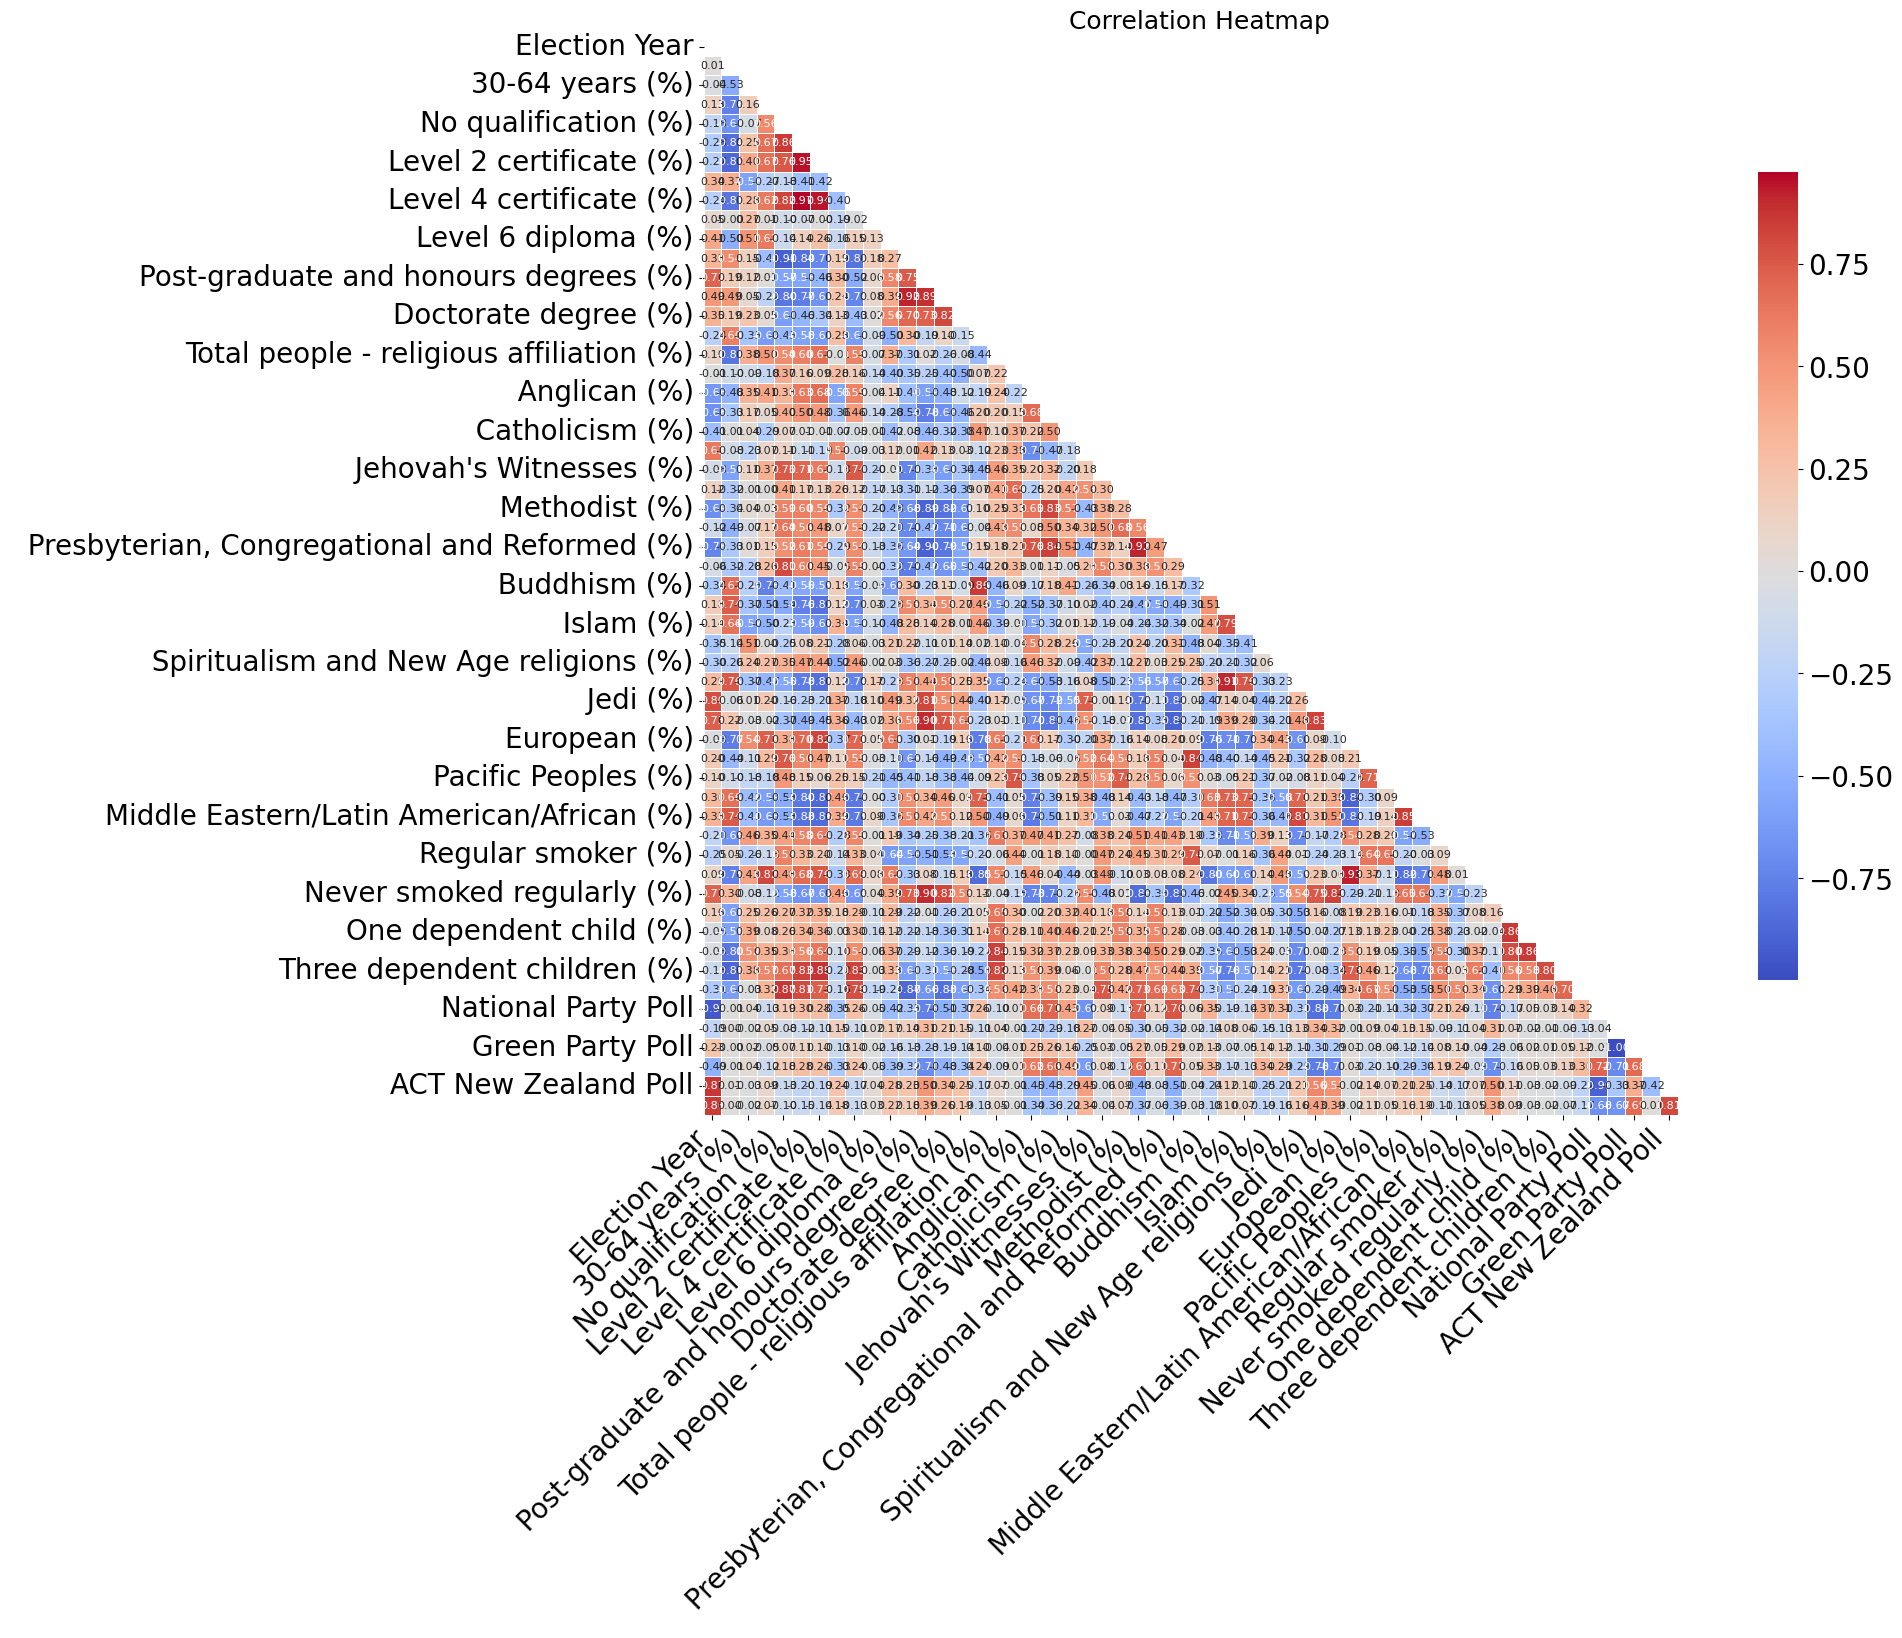

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Assuming merged_demo_polls is your DataFrame
plt.figure(figsize=(16, 14))
numeric_cols = merged_demo_polls.select_dtypes(include=[np.number]).columns
correlation_matrix = merged_demo_polls[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, 
            cbar_kws={"shrink": .75}, linewidths=.5, annot_kws={"size": 8})

plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


Comment:
 
-  *Strong Positive Correlations*:
   - There are several strong positive correlations (values close to +1), indicating a strong linear relationship between these pairs of variables. For example, certain educational qualifications (like Level 4 and Level 6 certificates) show high positive correlations with each other.

- *Strong Negative Correlations*:
   - There are also strong negative correlations (values close to -1), indicating an inverse relationship between these variables. For example, variables like "Regular smoker (%)" and "Never smoked regularly (%)" show strong negative correlations with several religious affiliations and educational qualifications.

- *Pattern of Correlations**:
   - The heatmap reveals distinct patterns in correlations. For instance, religious affiliations tend to have unique correlation patterns with demographic variables like age and smoking habits. Similarly, political polls (e.g., National Party Poll, Green Party Poll) show their own set of correlations with other variables.

In summary, the heatmap effectively highlights the relationships between different demographic and polling variables, providing insights into how these factors are interrelated. This can help in identifying significant predictors and understanding the underlying structure of the data for further analysis and model development.

## 1.5 Prepare Training and Predicting set

In [105]:
# Load the new datasets
new_merged_demo_polls_path = 'merged_demo_polls.csv'
new_combined_result_list_path = 'combined_result_list.csv'

new_merged_demo_polls = pd.read_csv(new_merged_demo_polls_path)
new_combined_result_list = pd.read_csv(new_combined_result_list_path)

# Display the first few rows of each dataset to understand their structure
new_merged_demo_polls.head(), new_combined_result_list.head()


(   Election Year        Electorate  15-29 years (%)  30-64 years (%)  \
 0           2017  auckland central        20.068003        47.375505   
 1           2017            botany        29.006750        41.996143   
 2           2017   east coast bays        19.960303        45.887607   
 3           2017             epsom        21.102761        47.291157   
 4           2017       helensville        21.504266        46.228110   
 
    65 years and over (%)  No qualification (%)  Level 1 certificate (%)  \
 0              12.346816              9.725862                 7.388255   
 1               9.488910             11.542912                 6.817743   
 2              13.658355             11.499814                 8.162759   
 3              10.852849             11.377141                 7.742048   
 4              11.944320             10.736417                 7.395599   
 
    Level 2 certificate (%)  Level 3 certificate (%)  Level 4 certificate (%)  \
 0                 7.

### Preparing the training set (2017, 2020, 2023) and the prediction set (2024)

In [106]:

# Including the 'Election Year' and 'Electorate' in the training and prediction sets
# Combine datasets for 2017, 2020, and 2023 for training
combined_data_train = pd.concat([new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2017],
                                 new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2020],
                                 new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2023]])

combined_targets_train = pd.concat([new_combined_result_list[new_combined_result_list['Election Year'] == 2017],
                                    new_combined_result_list[new_combined_result_list['Election Year'] == 2020],
                                    new_combined_result_list[new_combined_result_list['Election Year'] == 2023]])

# Prepare the feature set for 2024 prediction
prediction_data = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2024]

# Splitting the data into features (X) and targets (Y)
X_train = combined_data_train
Y_train = combined_targets_train
X_test = prediction_data

# Display the shapes of the datasets to ensure correctness
(X_train.shape, Y_train.shape, X_test.shape)


((68, 57), (68, 8), (23, 57))

In [107]:
X_train

Election Year        Electorate  15-29 years (%)  30-64 years (%)  \
0            2017  auckland central        20.068003        47.375505   
1            2017            botany        29.006750        41.996143   
2            2017   east coast bays        19.960303        45.887607   
3            2017             epsom        21.102761        47.291157   
4            2017       helensville        21.504266        46.228110   
..            ...               ...              ...              ...   
63           2023          takanini        19.920920        46.010065   
64           2023            tamaki        28.346783        46.989448   
65           2023          te atatu        20.055875        46.207247   
66           2023     upper harbour        21.563115        46.506888   
67           2023      whangaparaoa        22.315709        46.889589   

    65 years and over (%)  No qualification (%)  Level 1 certificate (%)  \
0               12.346816              9.725862                 7.388255   
1                9.488910             11.542912                 6.817743   
2               13.658355             11.499814                 8.162759   
3               10.852849             11.377141                 7.742048   
4               11.944320             10.736417                 7.395599   
..                    ...                   ...                      ...   
63              16.182602             10.107836                 6.534867   
64              10.542106              6.093524                 4.738258   
65              14.028107              8.889265                 6.891297   
66              11.751476             10.163059                 6.501265   
67              12.783628              9.081533                 6.323960   

    Level 2 certificate (%)  Level 3 certificate (%)  Level 4 certificate (%)  \
0                  7.246582                 7.395339                 6.006942   
1                  6.075217                10.067502                 5.159113   
2                  7.244759                 7.294380                 6.091056   
3                  6.946872                 6.955610                 6.081790   
4                  6.820835                 7.853615                 5.361473   
..                      ...                      ...                      ...   
63                 6.340762                 7.785766                 5.161754   
64                 5.286571                 8.131595                 3.993379   
65                 6.637318                 8.355909                 5.545208   
66                 6.311498                 8.441102                 5.229126   
67                 5.971121                 8.592987                 5.129736   

    ...  One dependent child (%)  Two dependent children (%)  \
0   ...                 3.860594                    4.476872   
1   ...                 3.616201                    3.288332   
2   ...                 4.056569                    4.304677   
3   ...                 4.141908                    4.028312   
4   ...                 4.063763                    4.211944   
..  ...                      ...                         ...   
63  ...                 3.788641                    3.853343   
64  ...                 3.258845                    3.351955   
65  ...                 3.953607                    4.343041   
66  ...                 4.139724                    4.062412   
67  ...                 3.848659                    4.011508   

    Three dependent children (%)  Four or more dependent children (%)  \
0                       1.494652                             0.425019   
1                       1.022179                             0.530376   
2                       1.377000                             0.372162   
3                       1.170919                             0.480601   
4                       1.140548                             0.475977   
..                           ...  

In [108]:
Y_train

Election Year        Electorate  ACT New Zealand Vote  Green Party Vote  \
0            2017  auckland central                  1.06             13.90   
1            2017            botany                  0.60              2.39   
2            2017   east coast bays                  0.99              4.74   
3            2017             epsom                  1.78              8.36   
4            2017       helensville                  0.81              7.57   
..            ...               ...                   ...               ...   
63           2023          takanini                  5.54              5.73   
64           2023            tamaki                 12.41             10.99   
65           2023          te atatu                  6.50             11.31   
66           2023     upper harbour                  8.46              9.40   
67           2023      whangaparaoa                 11.93              7.60   

    Labour Party Vote  National Party Vote  New Zealand First Party Vote  \
0               37.79                39.23                          3.88   
1               29.27                61.02                          4.59   
2               23.23                62.88                          5.39   
3               24.54                58.63                          3.15   
4               25.50                55.92                          7.12   
..                ...                  ...                           ...   
63              28.13                52.98                          3.19   
64              16.82                52.58                          2.87   
65              33.56                37.82                          4.53   
66              22.62                50.24                          4.06   
67              15.27                53.21                          6.26   

    Others Vote  
0          4.14  
1          2.14  
2          2.76  
3          3.55  
4          3.08  
..          ...  
63         4.43  
64         4.32  
65         6.29  
66         5.23  
67         5.73  

[68 rows x 8 columns]

In [109]:
X_test

Election Year            Electorate  15-29 years (%)  30-64 years (%)  \
68           2024      auckland central        20.713659        47.046281   
69           2024                botany        27.723768        42.926584   
70           2024       east coast bays        20.578741        45.780493   
71           2024                 epsom        21.575422        47.562948   
72           2024  kaipara ki mahurangi        21.277061        46.173190   
73           2024               kelston        21.473566        46.524184   
74           2024               mangere        25.905822        46.715972   
75           2024              manurewa        21.813837        45.903505   
76           2024          maungakiekie        32.577612        45.794152   
77           2024             mt albert        20.232435        47.945061   
78           2024            mt roskill        22.764305        47.082228   
79           2024              new lynn        20.730050        48.262248   
80           2024           north shore        20.413007        46.309043   
81           2024             northcote        22.455247        46.797122   
82           2024             pakuranga        35.478919        42.805976   
83           2024       panmure-otahuhu        25.335674        47.380430   
84           2024              papakura        18.472236        46.024388   
85           2024          port waikato        18.962824        44.913048   
86           2024              takanini        19.920920        46.010065   
87           2024                tamaki        28.346783        46.989448   
88           2024              te atatu        20.055875        46.207247   
89           2024         upper harbour        21.563115        46.506888   
90           2024          whangaparaoa        22.315709        46.889589   

    65 years and over (%)  No qualification (%)  Level 1 certificate (%)  \
68              12.680296              8.190142                 6.685062   
69               9.763661             10.006705                 5.908481   
70              14.722158             10.883099                 6.605949   
71              10.880111             10.117810                 6.822207   
72              12.934616              9.506888                 6.565712   
73              13.532058              9.100112                 6.321710   
74               9.288913              7.877595                 5.217804   
75              15.350478              9.751934                 7.009558   
76               9.583924              5.680794                 4.160763   
77              13.438986              8.483888                 7.004754   
78              13.196286              8.980674                 5.977643   
79              11.766229              8.756715                 5.947835   
80              14.835034              8.889153                 6.776644   
81              11.925237              8.248508                 6.160056   
82               8.851822              6.692591                 3.970528   
83              10.223782              9.021501                 6.143045   
84              17.736572             11.679936                 8.656656   
85              15.911694             13.162553                 8.226596   
86              16.182602             10.107836                 6.534867   
87              10.542106              6.093524                 4.738258   
88              14.028107              8.889265                 6.891297   
89              11.751476             10.163059                 6.501265   
90              12.783628              9.081533                 6.323960   

    Level 2 certificate (%)  Level 3 certificate (%)  Level 4 certificate (%)  \
68                 6.603537                 8.378277                 5.324219   
69                 5.556487                 9.897754                 4.894402   
70                 6.640535                 8.681116                 5.314734   
71    

### Training and Predicting:
Removed Election Year and Electorate from the features and target variables.
Scaled the data using StandardScaler.

In [121]:
from sklearn.linear_model import Ridge

# Remove 'Election Year' and 'Electorate' from features and target variables for modeling
X_train_model = X_train.drop(columns=['Election Year', 'Electorate'])
Y_train_model = Y_train.drop(columns=['Election Year', 'Electorate'])
X_test_model = X_test.drop(columns=['Election Year', 'Electorate'])

# the feature set for 2024 prediction
prediction_data = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2024]

**Note**: In the next steps, we will work on different models to determine the best one using the following training dataset:
- **Features**: `X_train_model`
- **Target**: `Y_train_model`

Once we identify the best model, we will use it to predict the election results for 2024. Since the purpose of this project is to predict the election outcomes if the parliament were dissolved today, we do not have actual results for 2024. Therefore, there is no `Y_test`. We'll rely on the trained model to generate these predictions.

# Modelling

## 2.1 Linear, Polynomial, Multiple Regression

## 2.2 KNN Regression

In [123]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train_model)
X_test_normalized = min_max_scaler.transform(X_test_model)

In [124]:
# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train_model)
X_test_standardized = standard_scaler.transform(X_test_model)

In [125]:
# Function to train and evaluate KNN model
def evaluate_knn(X_train, Y_train, X_test, k):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions = knn.predict(X_test)
    return predictions


In [126]:
# List of k values to try
k_values = range(1, 50)

In [129]:
# Evaluate KNN with normalized data
normalized_rmse_scores = []
for k in k_values:
    predictions = evaluate_knn(X_train_normalized, Y_train_model, X_test_normalized, k)
    rmse = sqrt(mean_squared_error(Y_train_model, evaluate_knn(X_train_normalized, Y_train_model, X_train_normalized, k)))
    normalized_rmse_scores.append(rmse)

In [130]:
# Evaluate KNN with standardized data
standardized_rmse_scores = []
for k in k_values:
    predictions = evaluate_knn(X_train_standardized, Y_train_model, X_test_standardized, k)
    rmse = sqrt(mean_squared_error(Y_train_model, evaluate_knn(X_train_standardized, Y_train_model, X_train_standardized, k)))
    standardized_rmse_scores.append(rmse)

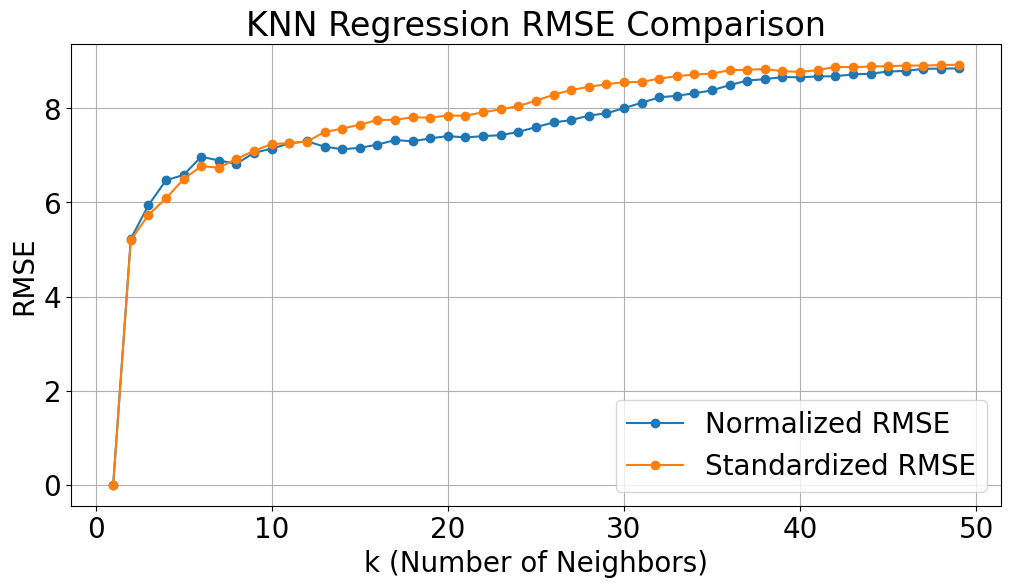

In [131]:
# Plot the RMSE values for both normalization and standardization
plt.figure(figsize=(12, 6))
plt.plot(k_values, normalized_rmse_scores, marker='o', label='Normalized RMSE')
plt.plot(k_values, standardized_rmse_scores, marker='o', label='Standardized RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE')
plt.title('KNN Regression RMSE Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [133]:
# Determine the best k for both methods
best_k_normalized = k_values[np.argmin(normalized_rmse_scores)]
best_k_standardized = k_values[np.argmin(standardized_rmse_scores)]
print(f"Best k for normalized data: {best_k_normalized} with RMSE: {min(normalized_rmse_scores)}")
print(f"Best k for standardized data: {best_k_standardized} with RMSE: {min(standardized_rmse_scores)}")

Best k for normalized data: 1 with RMSE: 0.0
Best k for standardized data: 1 with RMSE: 0.0


In [134]:
from sklearn.model_selection import cross_val_score

# Function to perform cross-validation and return the mean RMSE
def cross_val_rmse(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()


In [136]:
# Evaluate KNN with normalized data using cross-validation
normalized_rmse_cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    rmse_cv = cross_val_rmse(knn, X_train_normalized, Y_train_model)
    normalized_rmse_cv_scores.append(rmse_cv)

In [137]:
# Evaluate KNN with standardized data using cross-validation
standardized_rmse_cv_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    rmse_cv = cross_val_rmse(knn, X_train_standardized, Y_train_model)
    standardized_rmse_cv_scores.append(rmse_cv)

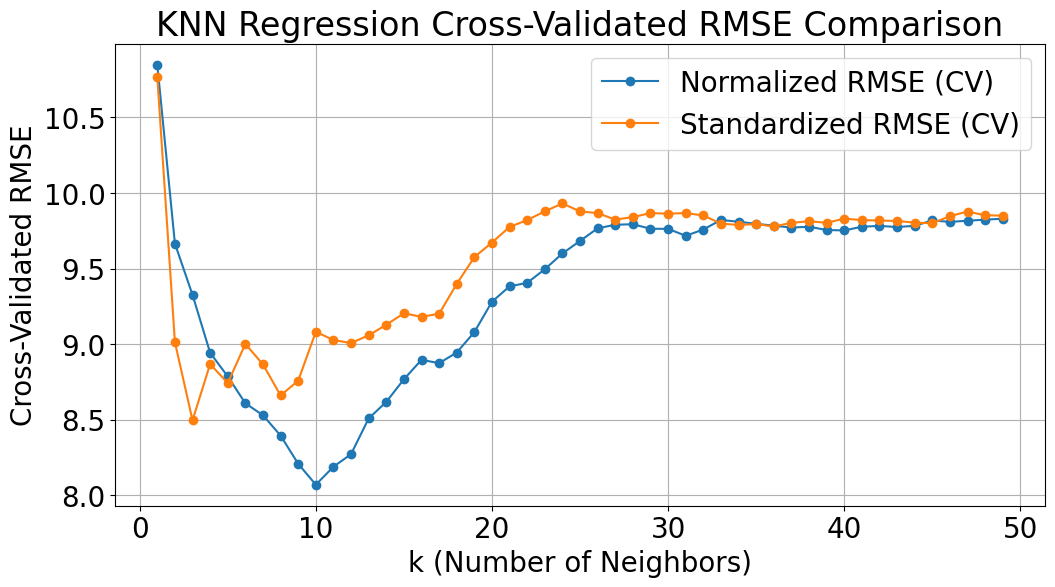

Best k for normalized data (CV): 10 with RMSE: 8.06961181259094
Best k for standardized data (CV): 3 with RMSE: 8.495451060068941


In [138]:
# Plot the cross-validated RMSE values for both normalization and standardization
plt.figure(figsize=(12, 6))
plt.plot(k_values, normalized_rmse_cv_scores, marker='o', label='Normalized RMSE (CV)')
plt.plot(k_values, standardized_rmse_cv_scores, marker='o', label='Standardized RMSE (CV)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Cross-Validated RMSE')
plt.title('KNN Regression Cross-Validated RMSE Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Determine the best k for both methods based on cross-validation
best_k_normalized_cv = k_values[np.argmin(normalized_rmse_cv_scores)]
best_k_standardized_cv = k_values[np.argmin(standardized_rmse_cv_scores)]

print(f"Best k for normalized data (CV): {best_k_normalized_cv} with RMSE: {min(normalized_rmse_cv_scores)}")
print(f"Best k for standardized data (CV): {best_k_standardized_cv} with RMSE: {min(standardized_rmse_cv_scores)}")

Comment:
Based on the cross-validated RMSE comparison, normalization seems to perform slightly better than standardization. 


To compare the performance of KNN regression with k=10 using both uniform and distance weighting, 
we'll train and evaluate the models using both weighting schemes and then compare their RMSE values.

In [139]:
from math import sqrt
# Function to perform cross-validation and return the mean RMSE
def cross_val_rmse(model, X, y, cv=5):
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv)
    rmse_scores = np.sqrt(-scores)
    return rmse_scores.mean()

# Evaluate KNN with normalized data using cross-validation
k = 10  # Best k value based on previous evaluation

In [140]:
# Normalization (Min-Max Scaling)
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train_model)
X_test_normalized = min_max_scaler.transform(X_test_model)

# Standardization (Z-score normalization)
standard_scaler = StandardScaler()
X_train_standardized = standard_scaler.fit_transform(X_train_model)
X_test_standardized = standard_scaler.transform(X_test_model)

In [141]:
# Evaluate KNN with uniform weighting
knn_uniform = KNeighborsRegressor(n_neighbors=k, weights='uniform')
rmse_cv_uniform = cross_val_rmse(knn_uniform, X_train_normalized, Y_train_model)
print(f"Cross-Validated RMSE for KNN (uniform, k={k}): {rmse_cv_uniform}")

Cross-Validated RMSE for KNN (uniform, k=10): 8.06961181259094


In [142]:
# Train and predict with uniform weighting
knn_uniform.fit(X_train_normalized, Y_train_model)
predictions_uniform = knn_uniform.predict(X_test_normalized)

In [143]:
# Evaluate KNN with distance weighting
knn_distance = KNeighborsRegressor(n_neighbors=k, weights='distance')
rmse_cv_distance = cross_val_rmse(knn_distance, X_train_normalized, Y_train_model)
print(f"Cross-Validated RMSE for KNN (distance, k={k}): {rmse_cv_distance}")

Cross-Validated RMSE for KNN (distance, k=10): 8.114745789845996


In [144]:
# Train and predict with distance weighting
knn_distance.fit(X_train_normalized, Y_train_model)
predictions_distance = knn_distance.predict(X_test_normalized)

In [145]:
# Compare the RMSE of both weighting schemes
print(f"Comparison of KNN with k={10} using different weighting schemes:")
print(f"Uniform weighting RMSE: {rmse_cv_uniform}")
print(f"Distance weighting RMSE: {rmse_cv_distance}")

Comparison of KNN with k=10 using different weighting schemes:
Uniform weighting RMSE: 8.06961181259094
Distance weighting RMSE: 8.114745789845996


Comment:
Based on the RMSE comparison, the KNN model with uniform weighting performs slightly better than the model with distance weighting.

In [146]:
# Save the better prediction
if rmse_cv_uniform < rmse_cv_distance:
    final_predictions_2024 = predictions_uniform
    best_weights = 'uniform'
else:
    final_predictions_2024 = predictions_distance
    best_weights = 'distance'

In [184]:
# Creating a DataFrame for the 2024 predictions
final_predictions_2024_df = pd.DataFrame(final_predictions_2024, columns=Y_train_model.columns)
final_predictions_2024_df['Election Year'] = 2024
final_predictions_2024_df['Electorate'] = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2024]['Electorate'].values

# Reorder columns to place 'Election Year' and 'Electorate' at the front
final_predictions_2024_df = final_predictions_2024_df[['Election Year', 'Electorate'] + list(Y_train_model.columns)]
final_predictions_2024_df.index = range(1, len(final_predictions_2024_df) + 1)
# Saving 2024 predictions to CSV file
final_predictions_2024_df.to_csv('final_knn_predictions_2024.csv', index=False)

In [201]:
# Display the first few rows of the predictions DataFrame
final_predictions_2024_df.head(26)

Election Year            Electorate  ACT New Zealand Vote  \
1            2024      auckland central                 7.615   
2            2024                botany                 8.149   
3            2024       east coast bays                 9.453   
4            2024                 epsom                 8.780   
5            2024  kaipara ki mahurangi                 9.453   
6            2024               kelston                 8.598   
7            2024               mangere                 8.259   
8            2024              manurewa                 7.443   
9            2024          maungakiekie                 5.867   
10           2024             mt albert                 7.672   
11           2024            mt roskill                 7.813   
12           2024              new lynn                 9.247   
13           2024           north shore                 8.614   
14           2024             northcote                 8.972   
15           2024             pakuranga                 7.182   
16           2024       panmure-otahuhu                 7.791   
17           2024              papakura                 8.660   
18           2024          port waikato                 8.037   
19           2024              takanini                 8.183   
20           2024                tamaki                 7.265   
21           2024              te atatu                 8.972   
22           2024         upper harbour                 9.095   
23           2024          whangaparaoa                 9.142   

    Green Party Vote  Labour Party Vote  National Party Vote  \
1             13.671             28.297               40.183   
2             10.218             28.300               43.411   
3             11.722             22.289               46.168   
4             12.380             25.739               42.686   
5             11.722             22.289               46.168   
6             12.166             24.134               44.527   
7             10.901             29.338               41.626   
8             13.353             28.143               41.273   
9              7.756             36.420               41.863   
10            14.310             28.489               39.225   
11            13.688             29.179               39.558   
12            14.824             23.436               41.891   
13            14.677             24.974               41.062   
14            14.354             23.437               42.502   
15             7.941             32.819               43.694   
16            10.541             29.837               41.971   
17            12.513             25.123               43.844   
18             9.968             28.085               44.184   
19            12.502             27.156               42.147   
20             9.869             32.054               41.491   
21            14.354             23.437               42.502   
22            11.136             22.565               46.980   
23            12.766             23.091               44.321   

    New Zealand First Party Vote  Others Vote  
1                          4.209        6.025  
2                          4.281        5.642  
3                          4.582        5.788  
4                          4.483        5.931  
5                          4.582        5.788  
6                          4.634        5.944  
7                          4.208        5.668  
8                          3.992        5.796  
9                          3.629        4.469  
10                         4.245        6.059  
11                         3.940        5.818  
12                         4.472        6.129  
13                         4.566        6.108  
14                         4.604        6.132  
15                         3.727        4.641  
16                         4.243        5.618  
17                         4.154        5.702  
18                         4.158        5.

We can also plot a graph **compare the actual predictions with the best KNN results of 2017, 2020, 2023**.

In [168]:
# Prepare Data for Each Year and Make prediction
X_2017 = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2017].drop(columns=['Election Year', 'Electorate'])
X_2020 = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2020].drop(columns=['Election Year', 'Electorate'])
X_2023 = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2023].drop(columns=['Election Year', 'Electorate'])

# Normalize the data
X_2017_normalized = min_max_scaler.transform(X_2017)
X_2020_normalized = min_max_scaler.transform(X_2020)
X_2023_normalized = min_max_scaler.transform(X_2023)


# Make predictions for each year
predictions_2017 = knn_uniform.predict(X_2017_normalized)
predictions_2020 = knn_uniform.predict(X_2020_normalized)
predictions_2023 = knn_uniform.predict(X_2023_normalized)

# Combine predictions with election year and electorates
predictions_2017_df = pd.DataFrame(predictions_2017, columns=Y_train_model.columns)
predictions_2017_df['Election Year'] = 2017
predictions_2017_df['Electorate'] = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2017]['Electorate'].values

predictions_2020_df = pd.DataFrame(predictions_2020, columns=Y_train_model.columns)
predictions_2020_df['Election Year'] = 2020
predictions_2020_df['Electorate'] = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2020]['Electorate'].values

predictions_2023_df = pd.DataFrame(predictions_2023, columns=Y_train_model.columns)
predictions_2023_df['Election Year'] = 2023
predictions_2023_df['Electorate'] = new_merged_demo_polls[new_merged_demo_polls['Election Year'] == 2023]['Electorate'].values

# Combine predictions for all years into a single DataFrame
all_predictions_df = pd.concat([predictions_2017_df, predictions_2020_df, predictions_2023_df])

# Reorder columns to place 'Election Year' and 'Electorate' at the front
all_predictions_df = all_predictions_df[['Election Year', 'Electorate'] + list(Y_train_model.columns)]

# Save combined predictions to CSV
all_predictions_df.to_csv('combined_knn_predictions.csv', index=False)



In [196]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Normalize and map electorate names
def normalize_and_map_electorate_names(df, mapping):
    df['Electorate'] = df['Electorate'].str.lower().str.strip().replace(mapping)
    return df

# Define the electorate mapping based on inspection
electorate_mapping = {
    # Add mappings here based on discrepancies found in inspection
}

# Normalize and map electorate names
new_combined_result_list = normalize_and_map_electorate_names(new_combined_result_list, electorate_mapping)
all_predictions_df = normalize_and_map_electorate_names(all_predictions_df, electorate_mapping)

# Function to create comparison DataFrame for a single year
def create_comparison_df(actual_df, predicted_df, year):
    # Ensure we are only comparing common electorates
    common_electorates = set(actual_df['Electorate']).intersection(set(predicted_df['Electorate']))
    
    if not common_electorates:
        return pd.DataFrame()  # Return an empty DataFrame if no common electorates
    
    actual_df = actual_df[actual_df['Electorate'].isin(common_electorates)]
    predicted_df = predicted_df[predicted_df['Electorate'].isin(common_electorates)]

    comparison_df = pd.DataFrame()
    for feature in subset_features:
        actual_values = actual_df[feature].values
        predicted_values = predicted_df[feature].values

        temp_df = pd.DataFrame({
            'Electorate': actual_df['Electorate'],
            'Actual': actual_values,
            'Predicted': predicted_values,
            'Feature': feature,
            'Year': year
        })
        comparison_df = pd.concat([comparison_df, temp_df], ignore_index=True)
    return comparison_df

# Prepare data for 2017
actual_2017 = new_combined_result_list[new_combined_result_list['Election Year'] == 2017].sort_values(by='Electorate')
predictions_2017 = all_predictions_df[all_predictions_df['Election Year'] == 2017].sort_values(by='Electorate')
comparison_2017 = create_comparison_df(actual_2017, predictions_2017, 2017)

# Prepare data for 2020
actual_2020 = new_combined_result_list[new_combined_result_list['Election Year'] == 2020].sort_values(by='Electorate')
predictions_2020 = all_predictions_df[all_predictions_df['Election Year'] == 2020].sort_values(by='Electorate')
comparison_2020 = create_comparison_df(actual_2020, predictions_2020, 2020)

# Prepare data for 2023
actual_2023 = new_combined_result_list[new_combined_result_list['Election Year'] == 2023].sort_values(by='Electorate')
predictions_2023 = all_predictions_df[all_predictions_df['Election Year'] == 2023].sort_values(by='Electorate')
comparison_2023 = create_comparison_df(actual_2023, predictions_2023, 2023)

# Function to plot comparison for a single year
def plot_comparison(comparison_df, year):
    if comparison_df.empty:
        print(f"No common electorates for {year}. Skipping plot.")
        return
    
    comparison_melted = pd.melt(comparison_df, id_vars=['Electorate', 'Feature'], value_vars=['Actual', 'Predicted'], var_name='Type', value_name='Votes')
    
    g = sns.FacetGrid(comparison_melted, col='Electorate', col_wrap=4, height=4, sharey=False)
    g.map_dataframe(sns.lineplot, x='Feature', y='Votes', hue='Type', marker='o')
    g.add_legend()
    
    for ax in g.axes.flatten():
        for label in ax.get_xticklabels():
            label.set_rotation(90)
    
    g.set_titles("{col_name}")
    g.set_axis_labels("Party", "Votes")
    plt.subplots_adjust(top=0.92)
    g.fig.suptitle(f'Comparison of Actual and Predicted with best KNN regression model Votes by Party for Each Electorate in {year} in Auckland Region')
    plt.show()





C:\Users\nuthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


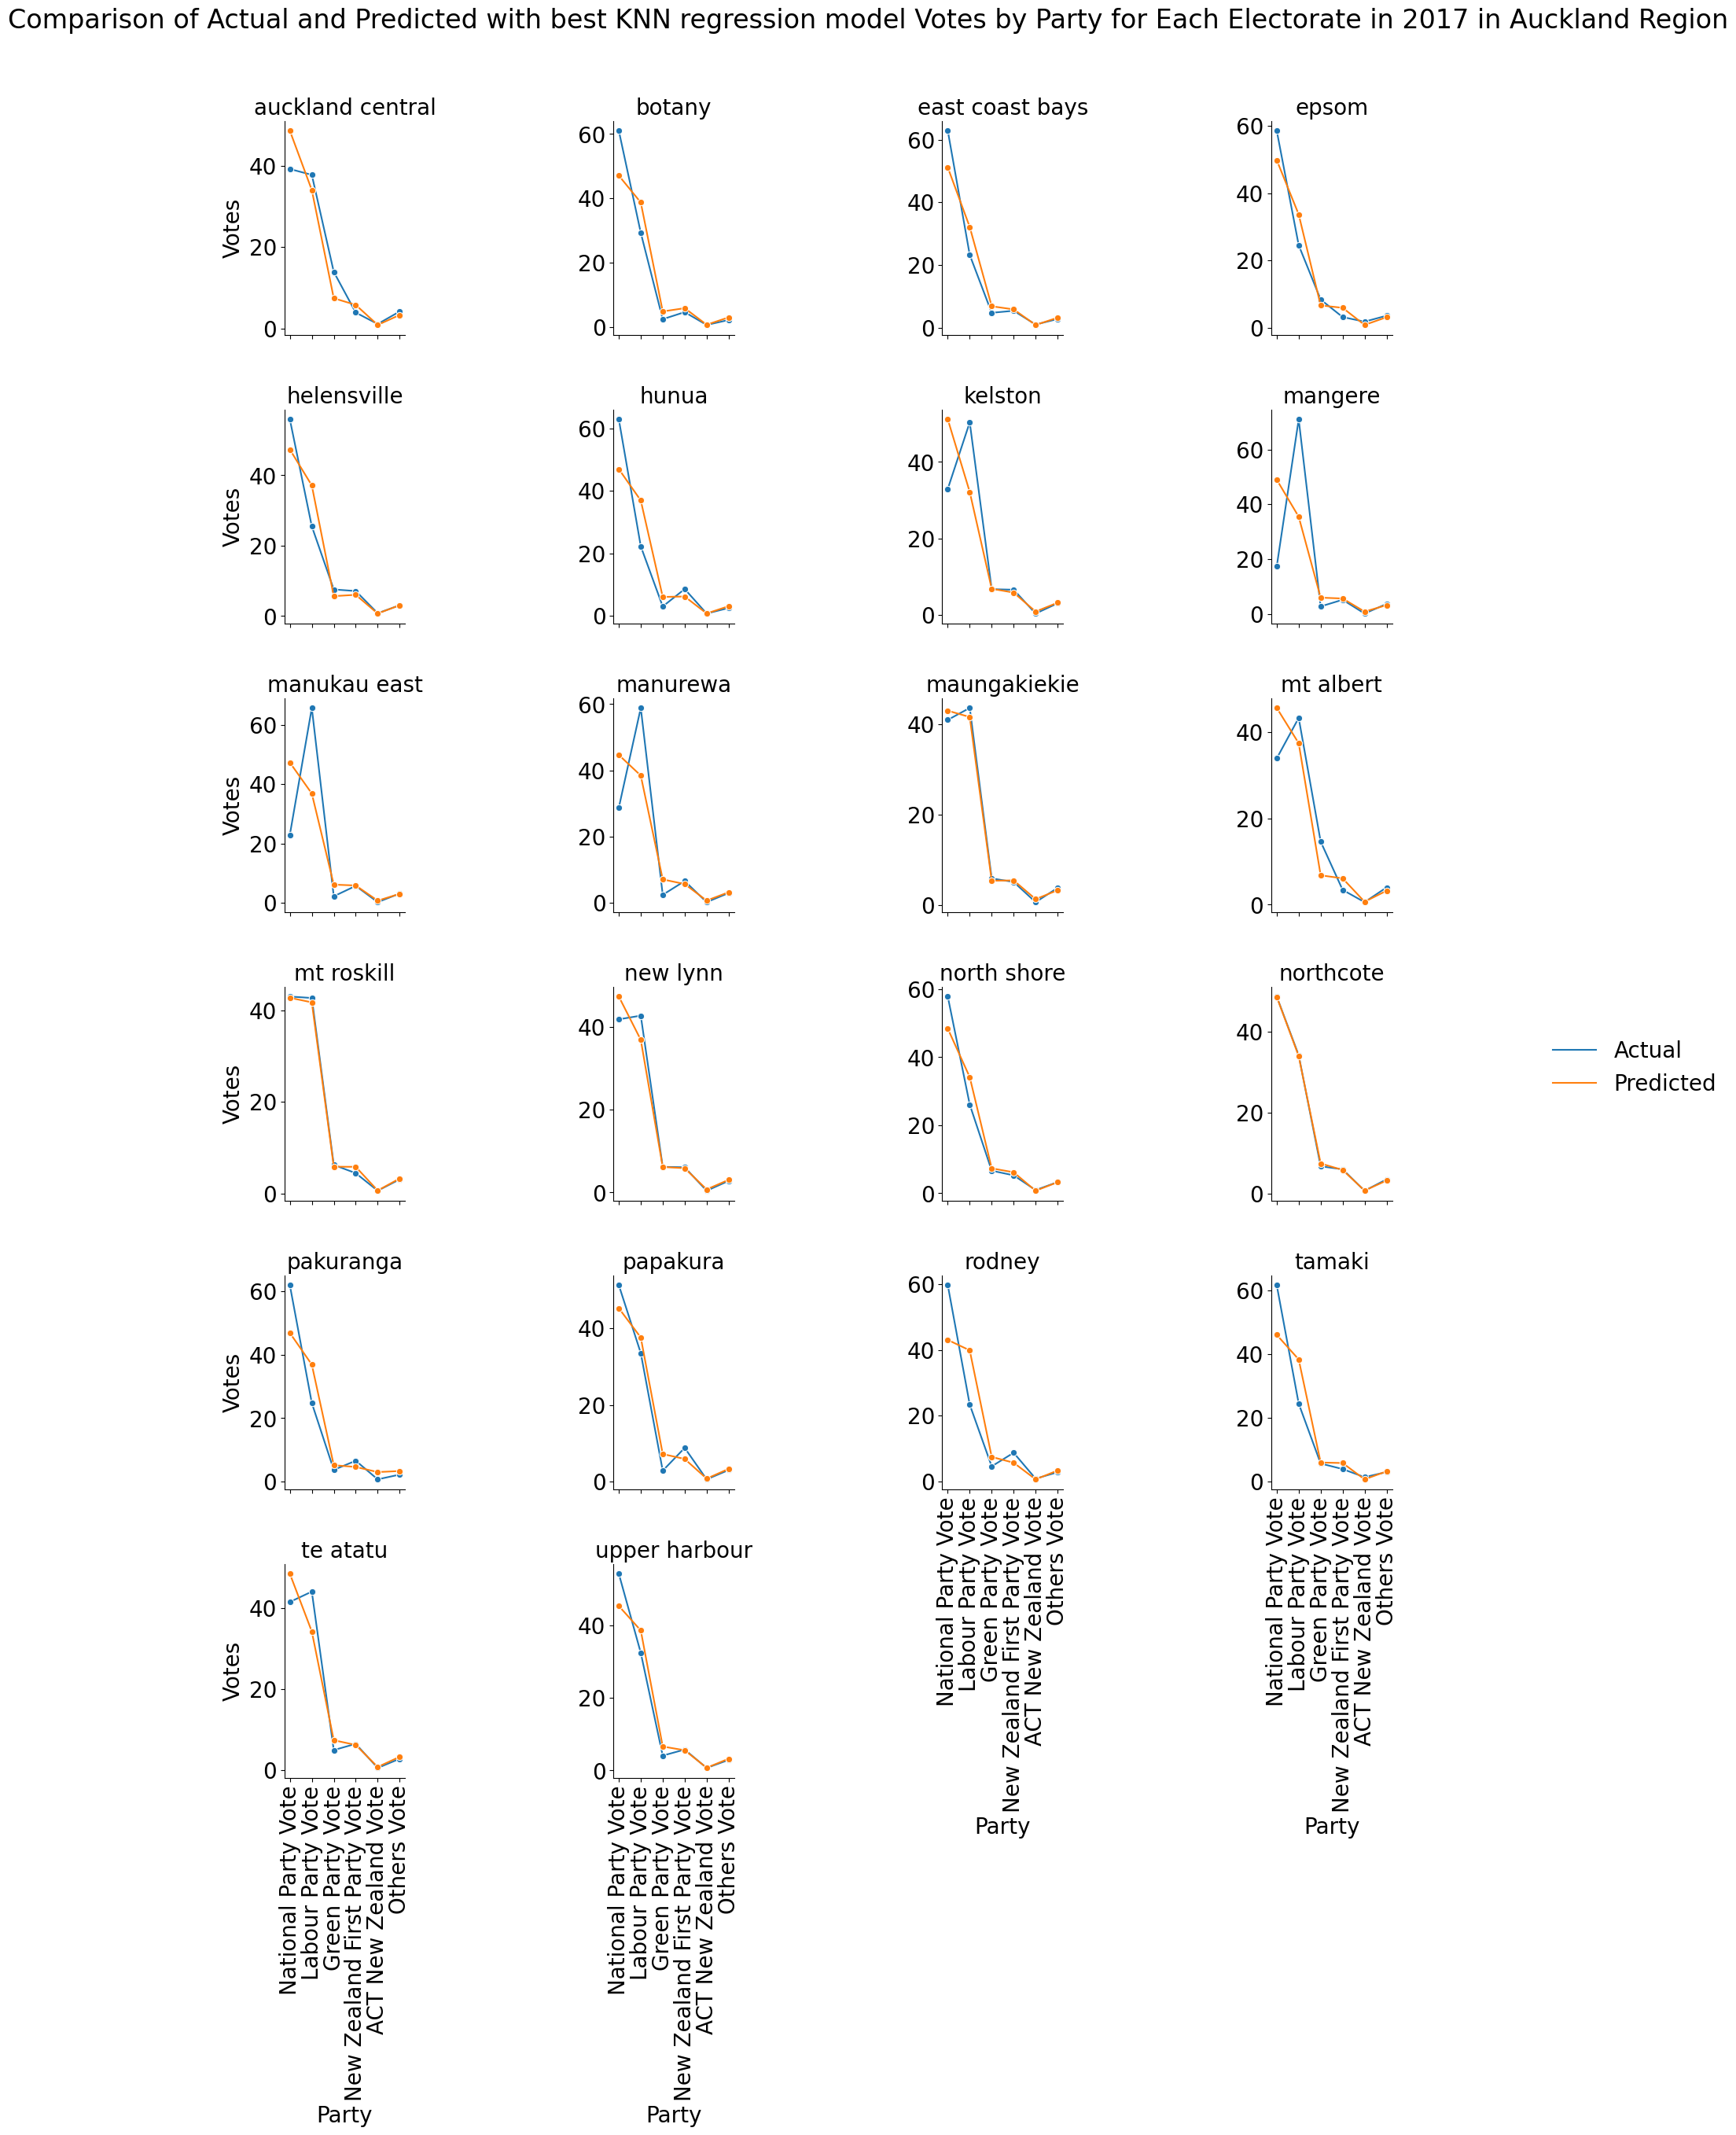

In [197]:
plot_comparison(comparison_2017, 2017)

C:\Users\nuthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


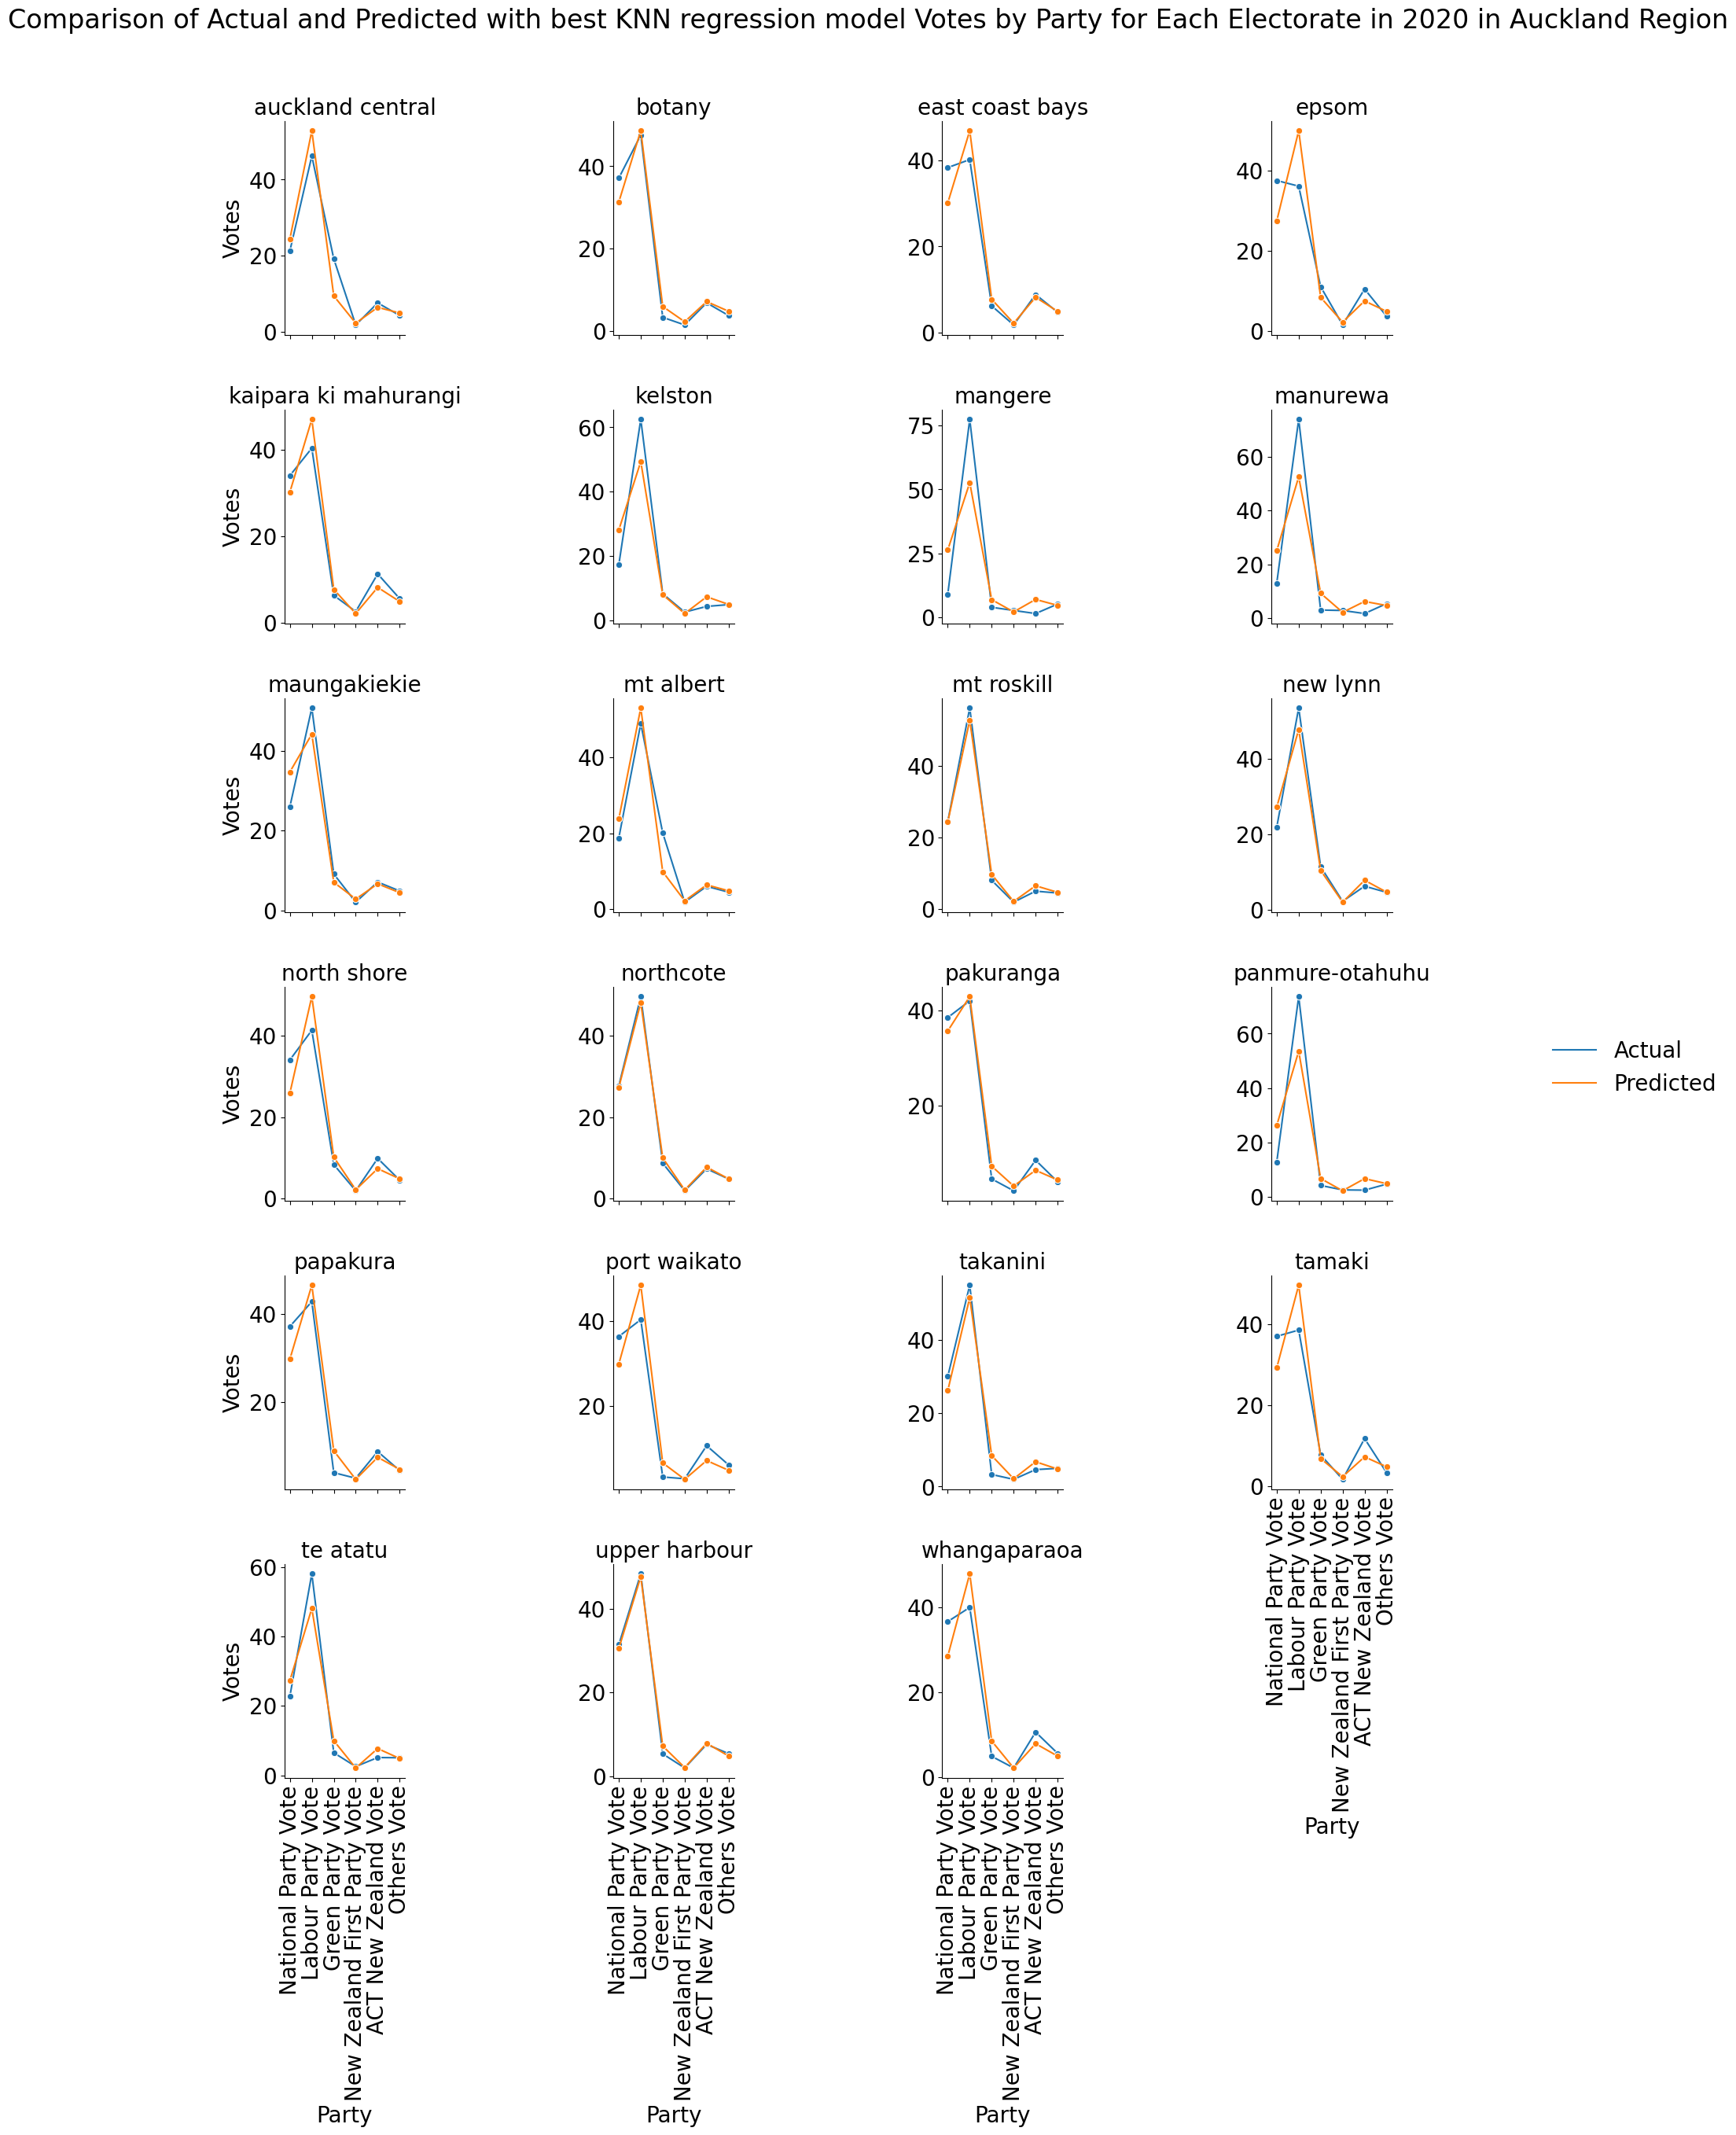

In [198]:
plot_comparison(comparison_2020, 2020)

C:\Users\nuthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


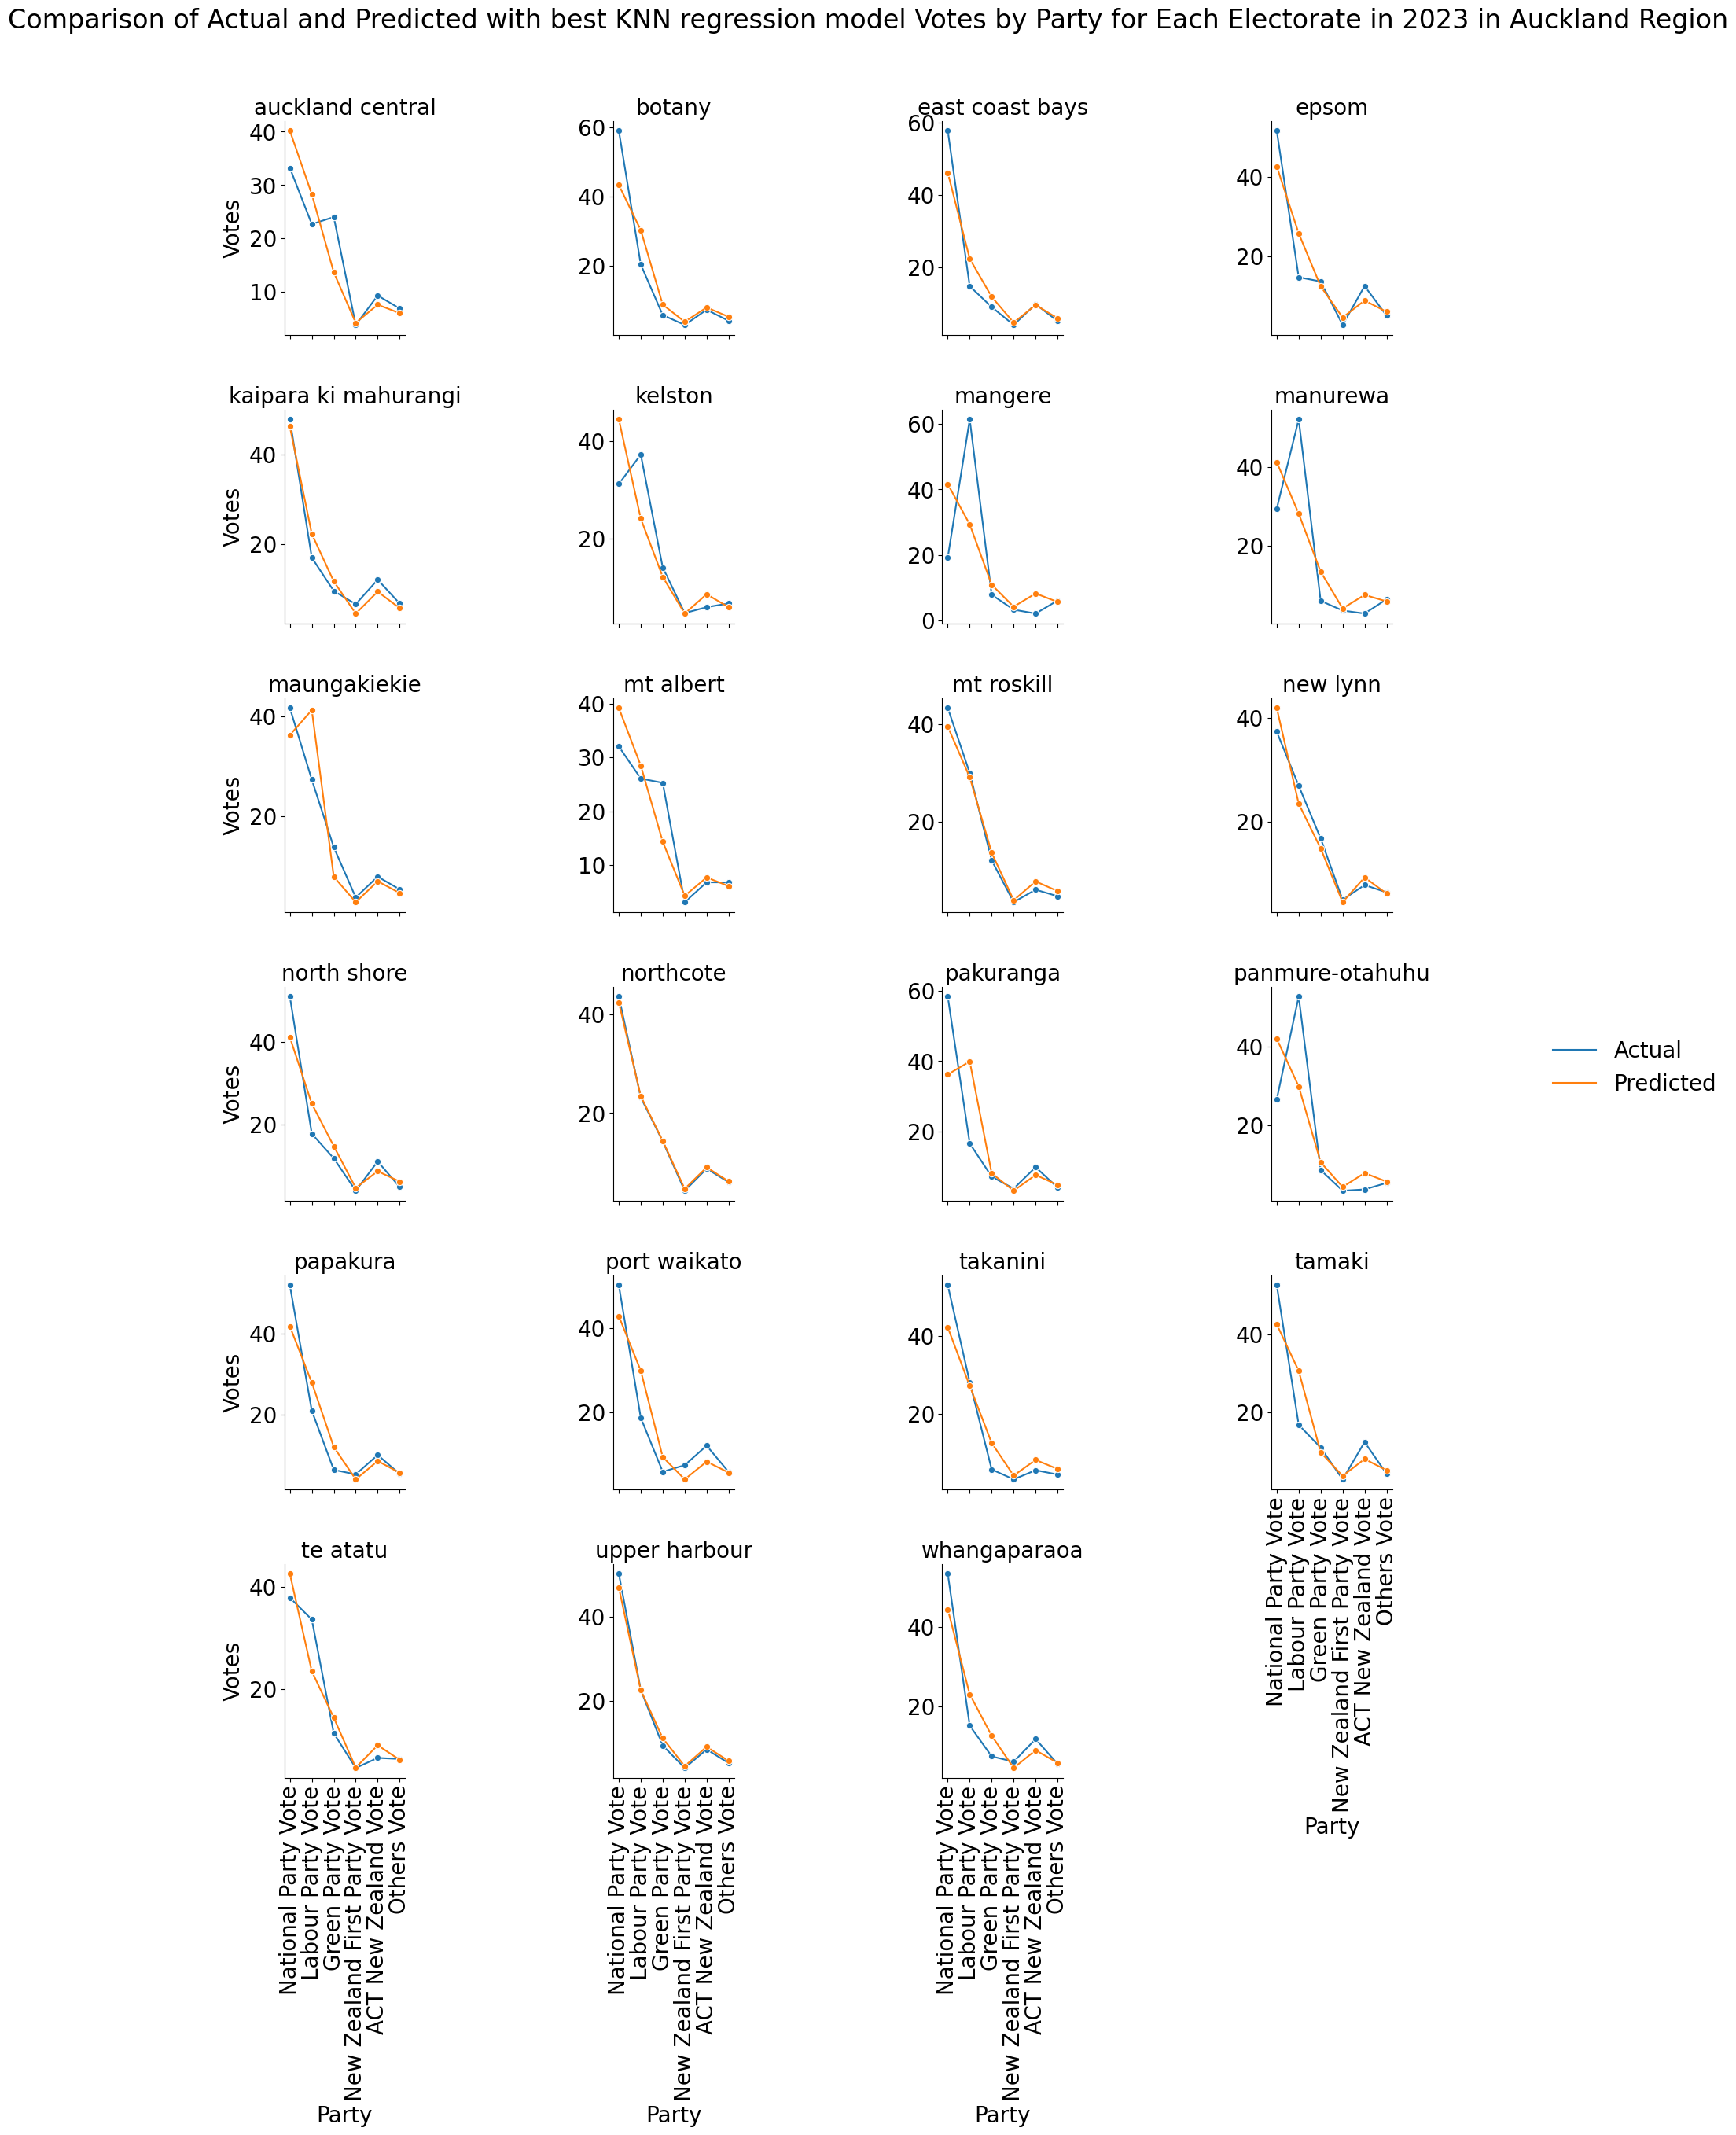

In [199]:
plot_comparison(comparison_2023, 2023)

Comment:

   - The model demonstrates a good fit across different years, with predicted values closely following the trends of actual votes. This consistency suggests that the model effectively captures the underlying patterns in the data.
   - For major parties such as the National Party, Labour Party, and Green Party, the predictions align well with the actual values, indicating that the model can accurately predict vote shares for these parties.
   - There are some discrepancies between actual and predicted values, especially for parties with smaller vote shares (e.g., New Zealand First Party, ACT New Zealand, and Others). These discrepancies could be due to the limited representation of these parties in the training data or their more volatile voting patterns.
   - In electorates such as Auckland Central, Botany, and East Coast Bays, the model's predictions are particularly accurate, as seen by the close alignment of actual and predicted values.
   - In other electorates, like Mangere and Manurewa, there are some noticeable differences between actual and predicted votes, suggesting that the model's performance may vary depending on specific local factors.
   - The KNN model is robust and performs well across a variety of electorates and parties, making it a valuable tool for predicting election results.
   - The use of uniform weighting with k=10 appears to be effective, as it balances the influence of neighboring data points well without overly fitting to specific local variations.
   - While the model performs well overall, further refinement could improve accuracy for parties with smaller vote shares. This could involve adjusting the model parameters, incorporating additional features, or using ensemble methods to combine predictions from multiple models.

Overall, the KNN regression model with k=10 and uniform weighting provides a reliable method for predicting election results, demonstrating good alignment with actual data across multiple years. The model's strengths in predicting major party votes and its consistent performance across different electorates highlight its utility in election forecasting.

C:\Users\nuthi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


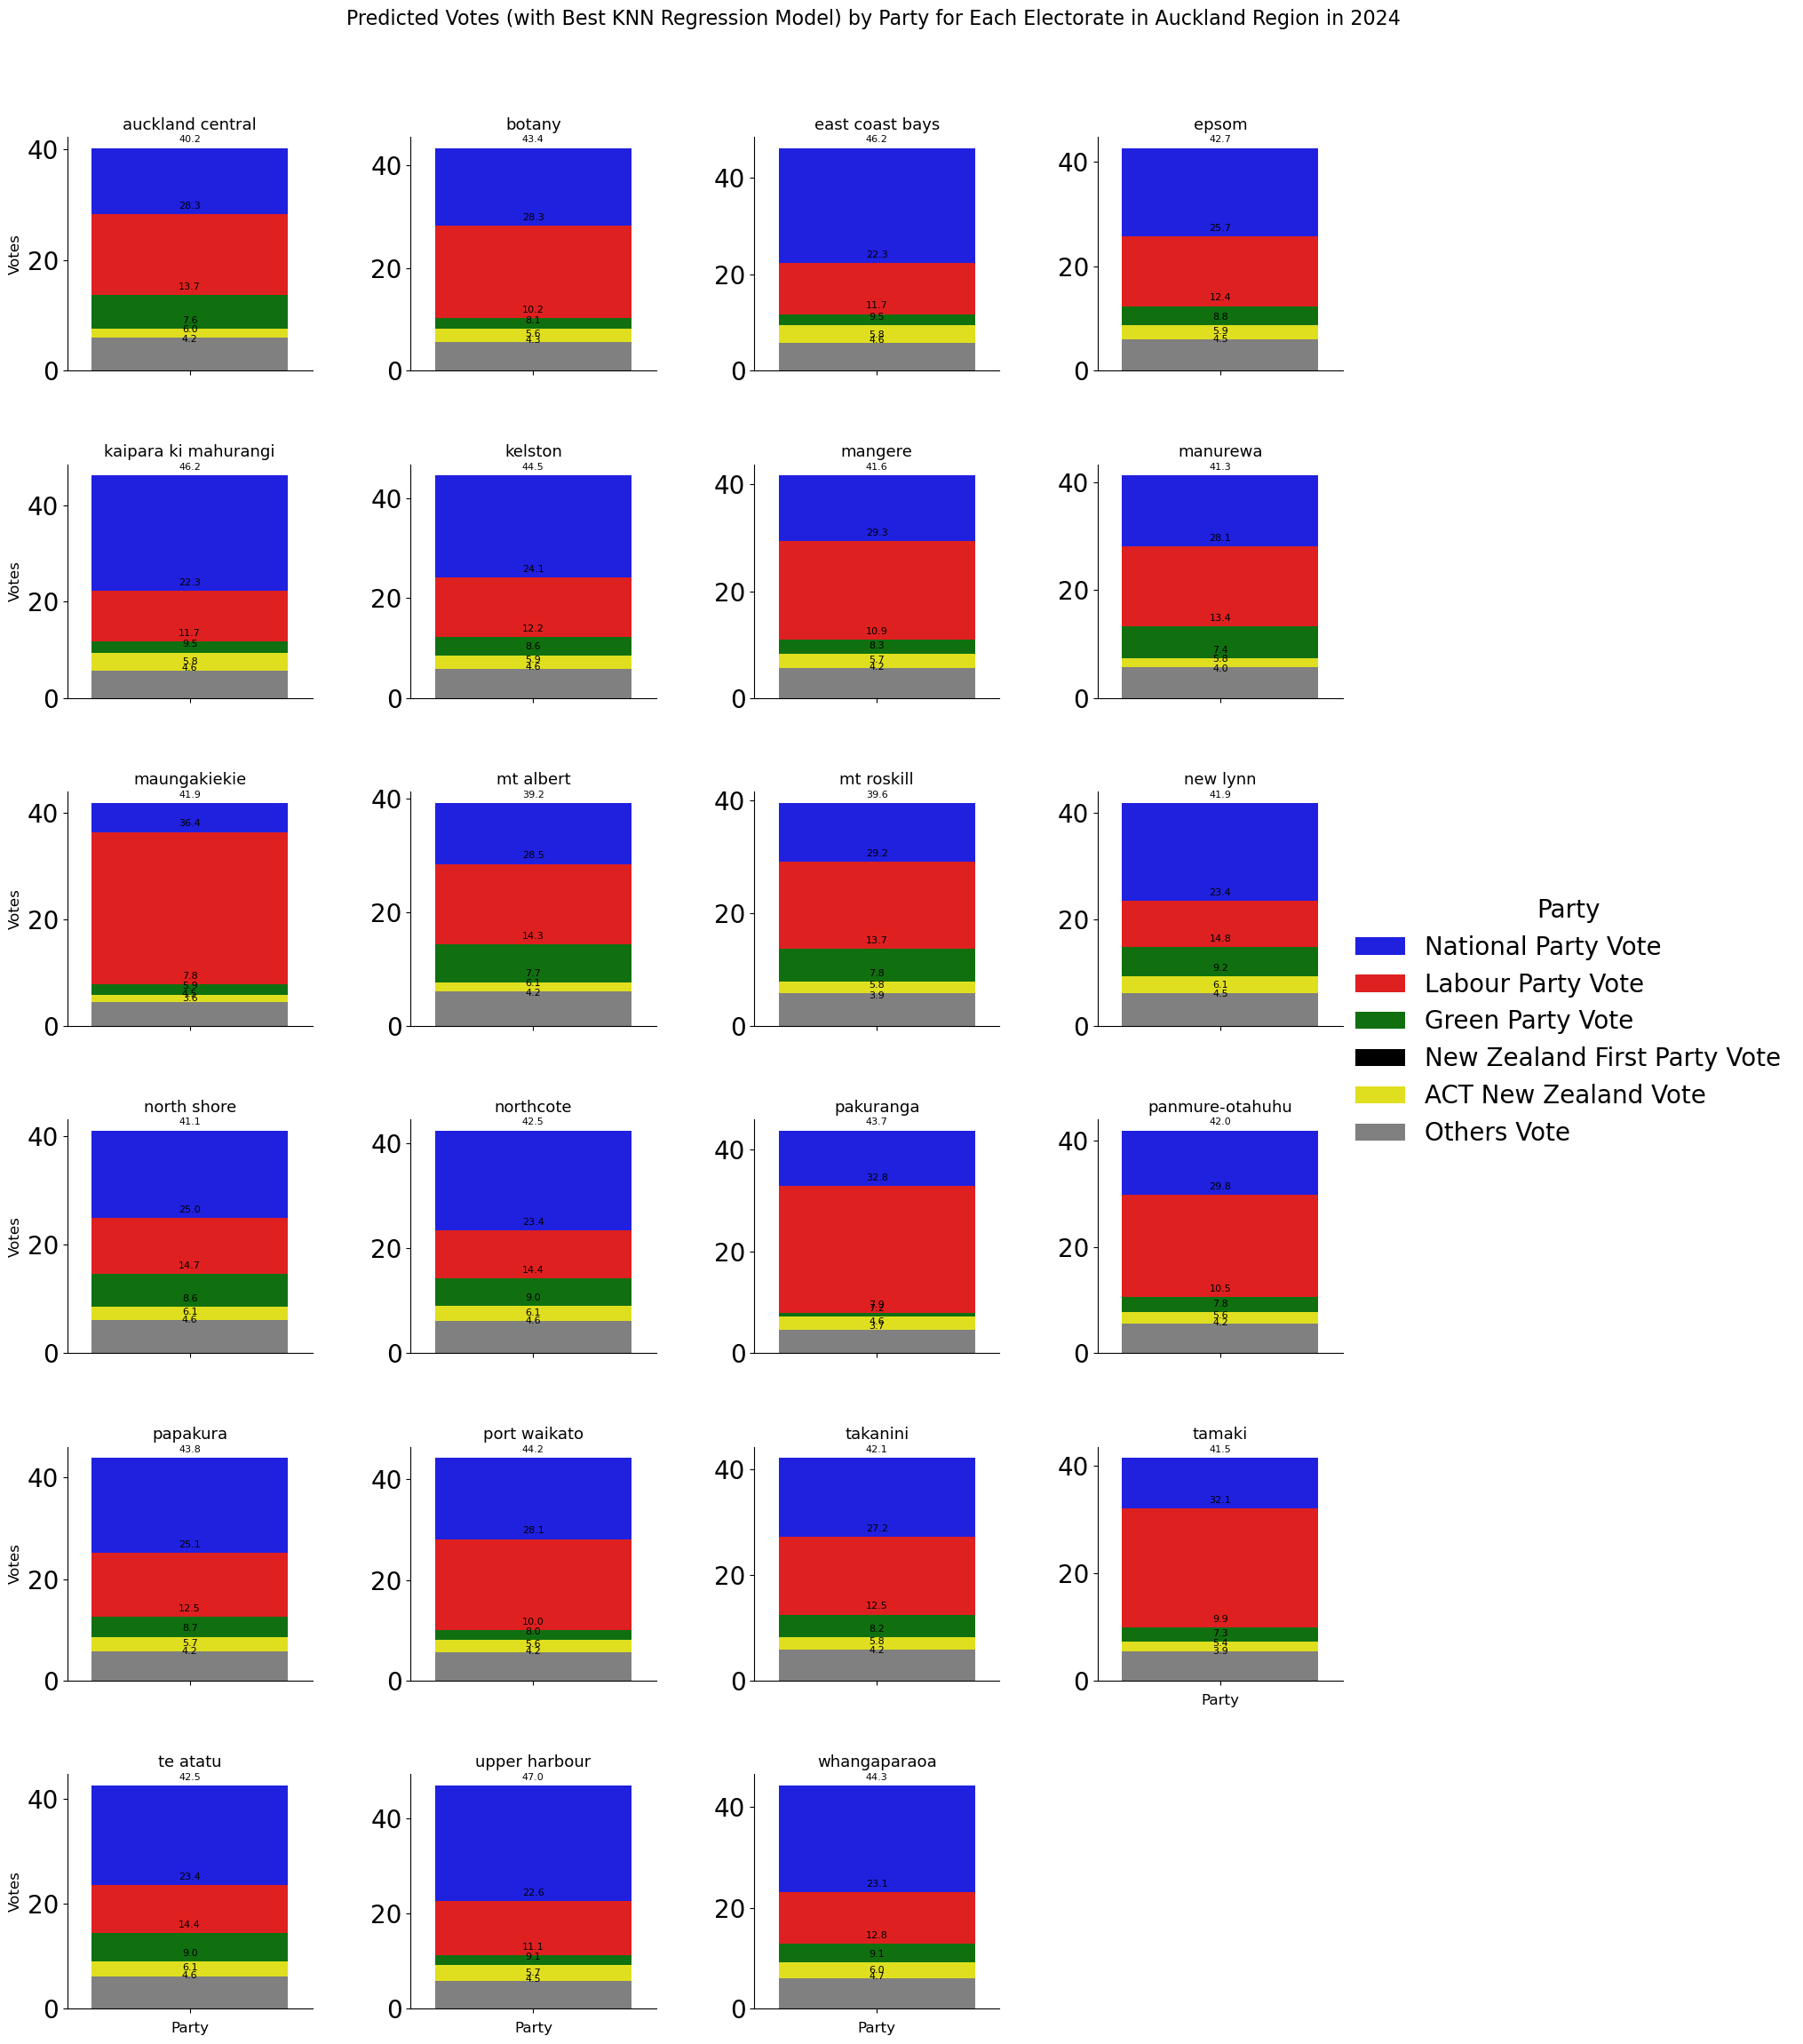

In [200]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Defining party colors
party_colors = {
    'ACT New Zealand Vote': 'yellow',
    'Green Party Vote': 'green',
    'Labour Party Vote': 'red',
    'National Party Vote': 'blue',
    'New Zealand First Party Vote': 'black',
    'Others Vote': 'grey'
}

# Function to plot 2024 predictions with color by party name as bar charts and add results number
def plot_predictions_2024(predictions_df):
    predictions_melted = pd.melt(predictions_df, id_vars=['Electorate'], value_vars=subset_features, var_name='Party', value_name='Votes')
    
    g = sns.FacetGrid(predictions_melted, col='Electorate', col_wrap=4, height=4, sharey=False, hue='Party', palette=party_colors)
    g.map_dataframe(sns.barplot, x='Party', y='Votes', palette=party_colors)
    
    # Add annotations for each bar
    for ax in g.axes.flatten():
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', label_type='edge', fontsize=8, padding=3)

    g.add_legend()

    for ax in g.axes.flatten():
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_xlabel("Party", fontsize=12)
        ax.set_ylabel("Votes", fontsize=12)

    g.set_titles("{col_name}", size=13)
    g.set_axis_labels("Party", "Votes")
    plt.subplots_adjust(top=0.92, hspace=0.4, wspace=0.4)
    g.fig.suptitle('Predicted Votes (with Best KNN Regression Model) by Party for Each Electorate in Auckland Region in 2024', fontsize=16)
    plt.show()

# Subset of features (party votes)
subset_features = ['National Party Vote', 'Labour Party Vote', 'Green Party Vote', 'New Zealand First Party Vote', 'ACT New Zealand Vote', 'Others Vote']

# Plot the predictions for 2024
plot_predictions_2024(final_predictions_2024_df)

Comment: 


The plot of predicted votes by party for each electorate in the Auckland region in 2024 reveals several key insights:

1. *Dominance of Major Parties*:
   - The National Party (blue) and Labour Party (red) are the dominant parties in most electorates, often receiving the highest predicted vote counts.
   - This suggests a strong two-party competition within the Auckland region and thus, it reflects the overall of NZ political landscape that is dominant by these two parties.


2. *Consistent Trends**:
   - The pattern of vote distribution is consistent across different electorates, with the National and Labour parties generally leading, followed by the Green Party (green), New Zealand First Party (black), and ACT New Zealand (yellow).
   - This consistency indicates stable party preferences among the voters across various electorates.


3. *Variation in Minor Party Support*:
   - While the Green Party and ACT New Zealand receive fewer votes compared to the major parties, their support varies across electorates.
   - Some electorates show higher support for these parties, reflecting localized variations in voter preferences.


4. *Others Category*:
   - The 'Others Vote' (grey) category consistently shows the lowest predicted votes, indicating that the majority of votes are expected to go to the major and minor listed parties.




###### Specific Observations for Some Electorates:

- *Auckland Central*:
  - Predicted to have a close competition between the National and Labour parties, with significant but lower support for the Green Party.

- *East Coast Bays*:
  - Strong predicted lead for the National Party, with Labour and Green Parties trailing behind.

- *Mangere*:
  - Predicted strong support for the Labour Party, significantly outpacing the National Party.

- *North Shore*:
  - Similar pattern to East Coast Bays with a clear predicted lead for the National Party.

Overall, the plot suggests that the 2024 election in the Auckland region will be primarily contested between the National and Labour parties, with varying levels of support for other parties across different electorates. This visualization highlights the key battlegrounds and areas of strong party support, providing a comprehensive overview of the predicted electoral landscape.

## 2.3 Neural Networks

## 2.4 Classification

## 2.5 Clustering 

## 2.5 Decide the Best Model

# Predict the outcome of Auckland General Election of Party List in 2024

# Conclusion

# Limitation 